In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 폰트 개수 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
df_in = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/20.세종시_전입자수.csv', encoding='utf-8')
df_in

년월  전입자수 세종전입행정동   전출시   전출시군구   전출읍면동
0       201701     1    조치원읍   강원도     강릉시     교1동
1       201701     6    조치원읍   강원도     동해시     천곡동
2       201701    14    조치원읍   강원도     속초시      교동
3       201701    21    조치원읍   강원도     양양군      서면
4       201701     2    조치원읍   강원도     원주시     원인동
...        ...   ...     ...   ...     ...     ...
108077  202101     3     다정동  충청북도  청주시흥덕구    복대1동
108078  202101    56     다정동  충청북도  청주시흥덕구     오송읍
108079  202101    32     다정동  충청북도  청주시흥덕구     옥산면
108080  202101     8     다정동  충청북도     충주시  교현·안림동
108081  202101     9     다정동  충청북도     충주시    중앙탑면

[108082 rows x 6 columns]

세종시 내부에서의 이동 수치가 커 다른 지역에서의 이동은 데이터 눌림현상이 보임

따라서, 전출시 컬럼의 '세종시' 데이터 삭제 후 진행 함

In [3]:
# df_in['전출시']==['세종특별자치시']
mask = df_in['전출시'].isin(['세종특별자치시'])
df_in = df_in[~mask]

In [4]:
df_in = df_in[~mask]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [5]:
df_in.groupby('년월').sum('전입자수')

전입자수
년월           
201701  17715
201702  23915
201703  23759
201704  18508
201705  25814
201706  22190
201707  20465
201708  24232
201709  17667
201710  19020
201711  20295
201712  22484
201801  26149
201802  30827
201803  23423
201804  26227
201805  18288
201806  19292
201807  20552
201808  22225
201809  16513
201810  19693
201811  17904
201812  20214
201901  26051
201902  28406
201903  19891
201904  16623
201905  14858
201906  15774
201907  20976
201908  17630
201909  17903
201910  22930
201911  19528
201912  21975
202001  23785
202002  25115
202003  19813
202004  13723
202005  12719
202006  15040
202007  16635
202008  17045
202009  16033
202010  25256
202011  24310
202012  26292
202101  20900

In [6]:
df_in_inplace = df_in.groupby(['년월', '세종전입행정동']).sum('전입자수')
# pd.set_option('display.max_rows',None)  # 중간 생략 행 전부 보기 
df_in.to_csv('df_in_inplace.csv')  # 엑셀파일로 내보내기 

df_in_inplace

전입자수
년월     세종전입행정동      
201701 금남면       575
       도담동      2118
       부강면       484
       소정면        93
       아름동      3529
...              ...
202101 전동면       112
       전의면       234
       조치원읍     2389
       종촌동      1264
       한솔동       820

[892 rows x 1 columns]

In [ ]:
df_in_fromplace = df_in.groupby(['년월', '전출시군구']).sum('전입자수')
# pd.set_option('display.max_rows',None)  # 중간 생략 행 전부 보기 
# df_in_fromplace.to_excel('df_in_fromplace.xlsx')  # 엑셀파일로 내보내기 

df_in_fromplace

전입자수
년월     전출시군구      
201701 강남구      35
       강동구      28
       강릉시      32
       강북구       6
       강서구      57
...            ...
202101 홍성군     370
       홍천군     140
       화성시      97
       화순군      86
       화천군      24

[9755 rows x 1 columns]

# 2017년도 전입자 추이

In [ ]:
df_in.head(20)

년월  전입자수 세종전입행정동  전출시     전출시군구 전출읍면동
0   201701     1    조치원읍  강원도       강릉시   교1동
1   201701     6    조치원읍  강원도       동해시   천곡동
2   201701    14    조치원읍  강원도       속초시    교동
3   201701    21    조치원읍  강원도       양양군    서면
4   201701     2    조치원읍  강원도       원주시   원인동
5   201701    13    조치원읍  강원도       정선군   정선읍
6   201701    16    조치원읍  강원도       태백시   삼수동
7   201701     1    조치원읍  경기도   고양시 덕양구  화정1동
8   201701     1    조치원읍  경기도  고양시 일산서구  주엽1동
9   201701     2    조치원읍  경기도  고양시 일산서구   탄현동
10  201701     8    조치원읍  경기도       광주시   오포읍
11  201701     2    조치원읍  경기도   성남시 수정구  태평1동
12  201701     1    조치원읍  경기도   성남시 중원구  금광1동
13  201701     2    조치원읍  경기도   성남시 중원구  은행2동
14  201701     2    조치원읍  경기도   수원시 권선구   서둔동
15  201701     6    조치원읍  경기도   수원시 영통구  영통2동
16  201701     2    조치원읍  경기도   수원시 팔달구   매교동
17  201701     1    조치원읍  경기도       시흥시  정왕1동
18  201701     1    조치원읍  경기도       시흥시  정왕2동
19  201701     5    조치원읍  경기도   안산시 단원구   대부동

In [ ]:
a = 201701

for i in range(1, 13):
    df_in_a = df_in['년월']==a
    df_in[a] = df_in_a
    a += 1
print(df_in)

            년월  전입자수 세종전입행정동   전출시  ... 201709 201710  201711  201712
0       201701     1    조치원읍   강원도  ...  False  False   False   False
1       201701     6    조치원읍   강원도  ...  False  False   False   False
2       201701    14    조치원읍   강원도  ...  False  False   False   False
3       201701    21    조치원읍   강원도  ...  False  False   False   False
4       201701     2    조치원읍   강원도  ...  False  False   False   False
...        ...   ...     ...   ...  ...    ...    ...     ...     ...
108077  202101     3     다정동  충청북도  ...  False  False   False   False
108078  202101    56     다정동  충청북도  ...  False  False   False   False
108079  202101    32     다정동  충청북도  ...  False  False   False   False
108080  202101     8     다정동  충청북도  ...  False  False   False   False
108081  202101     9     다정동  충청북도  ...  False  False   False   False

[98249 rows x 18 columns]


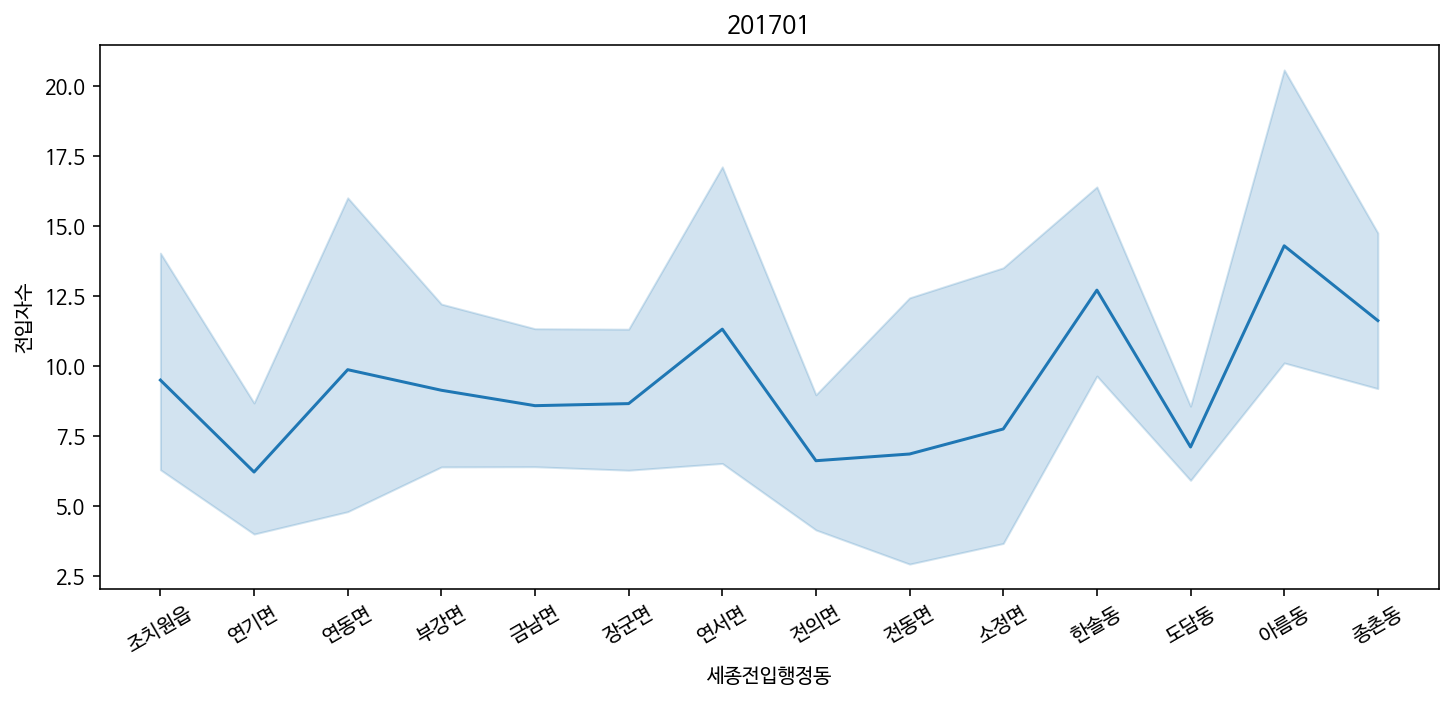

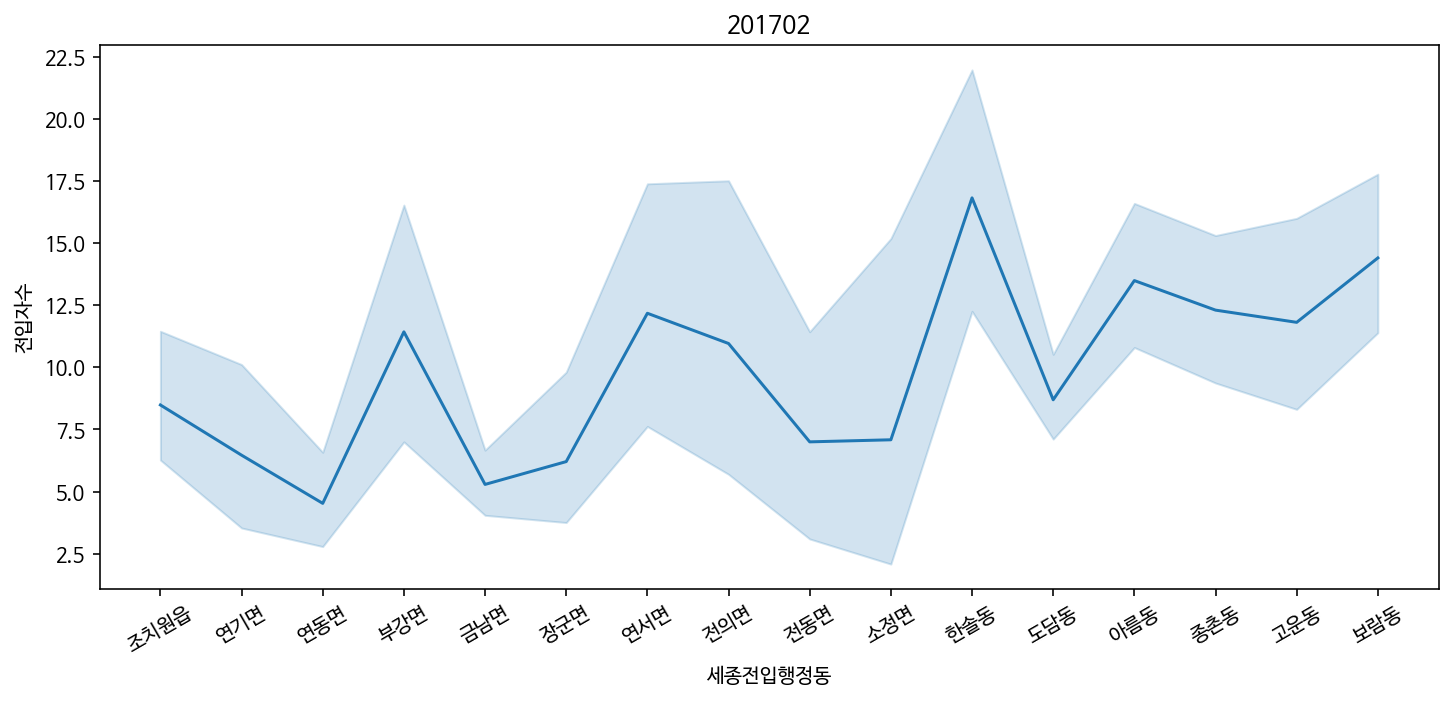

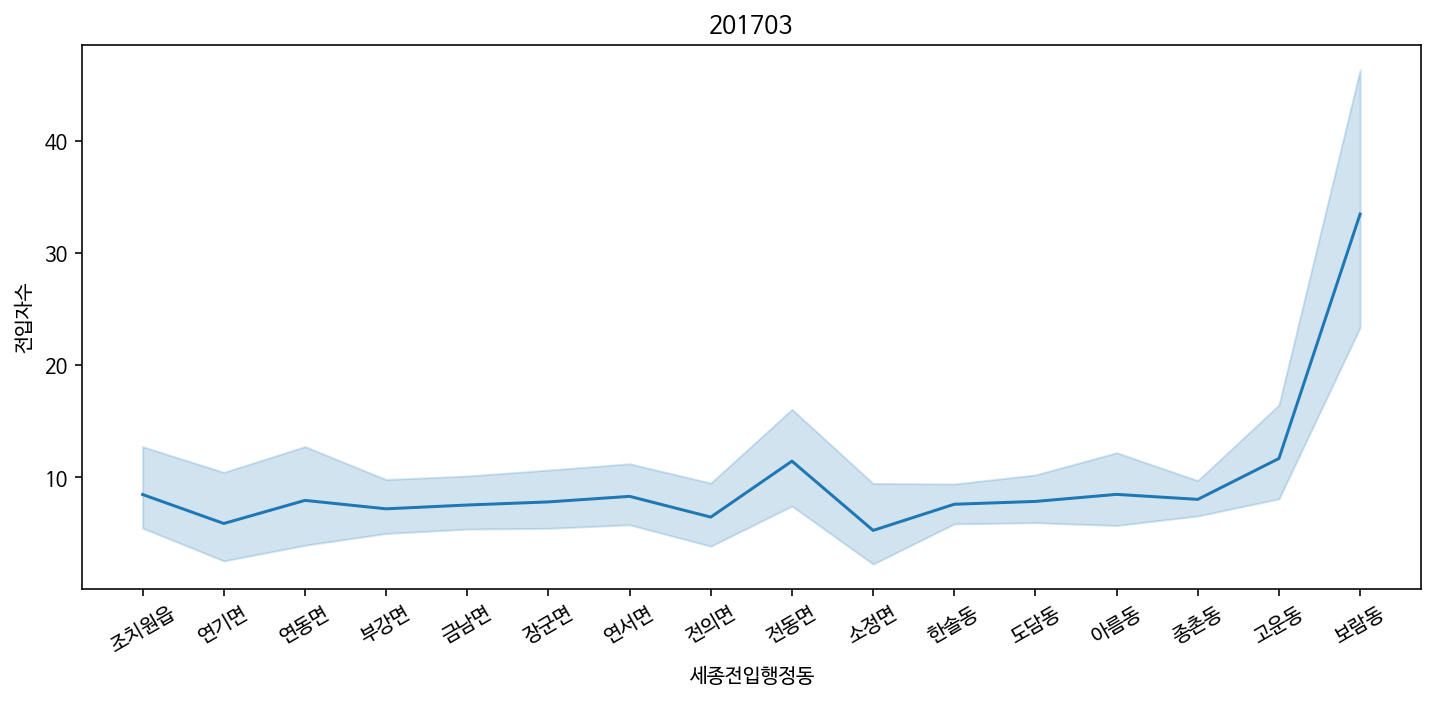

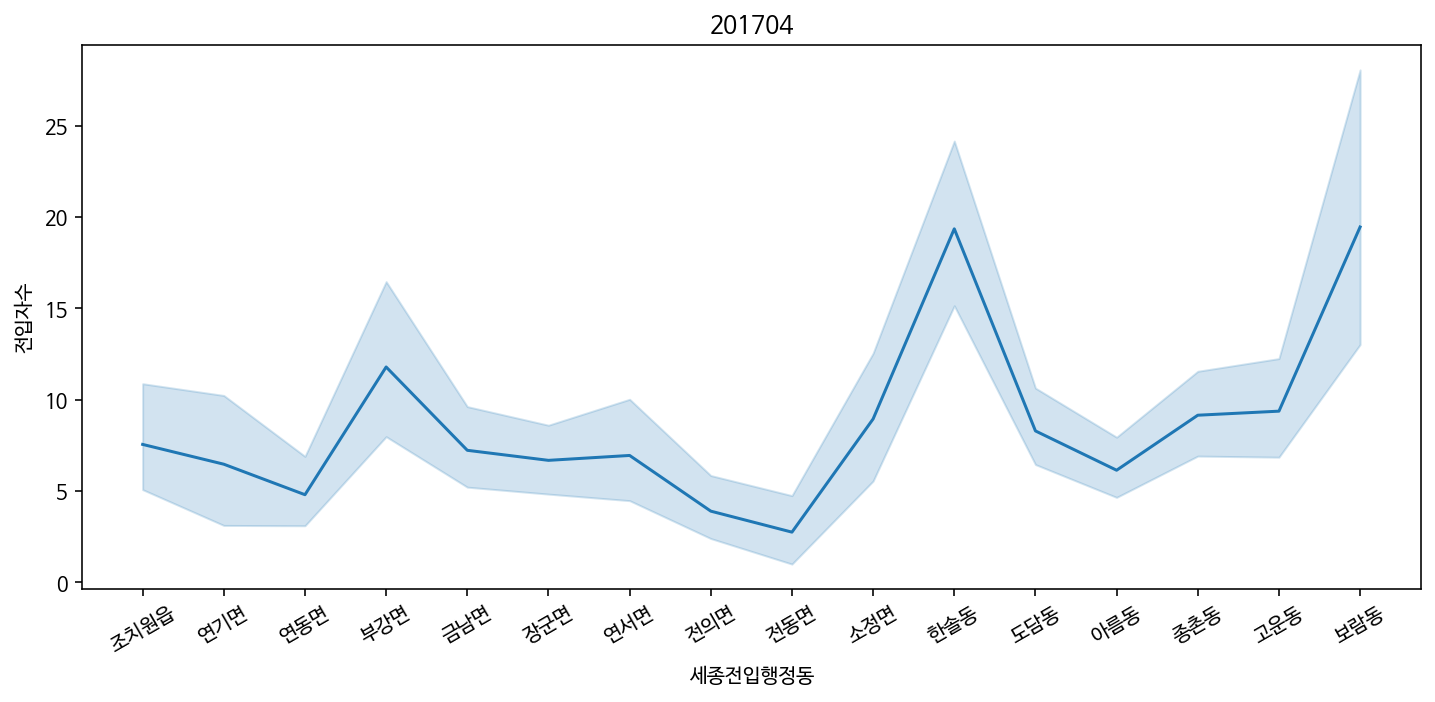

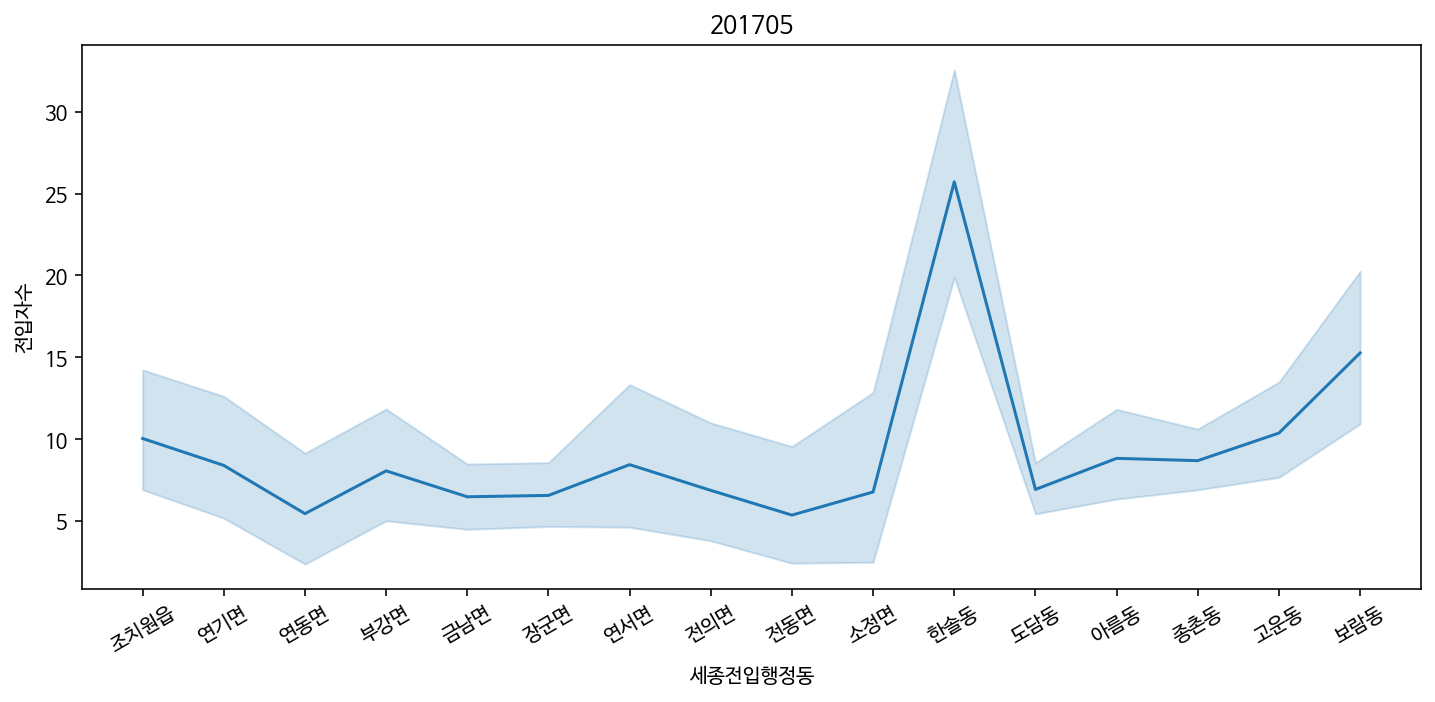

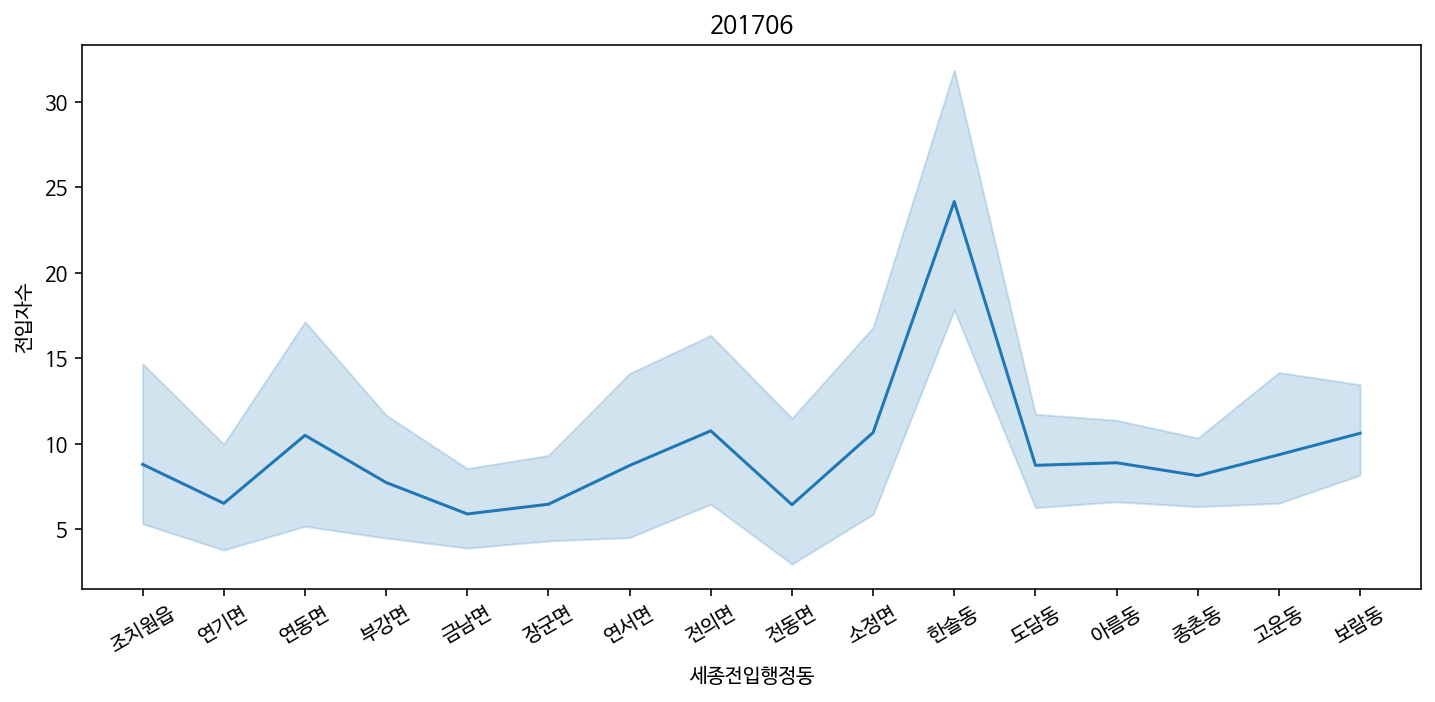

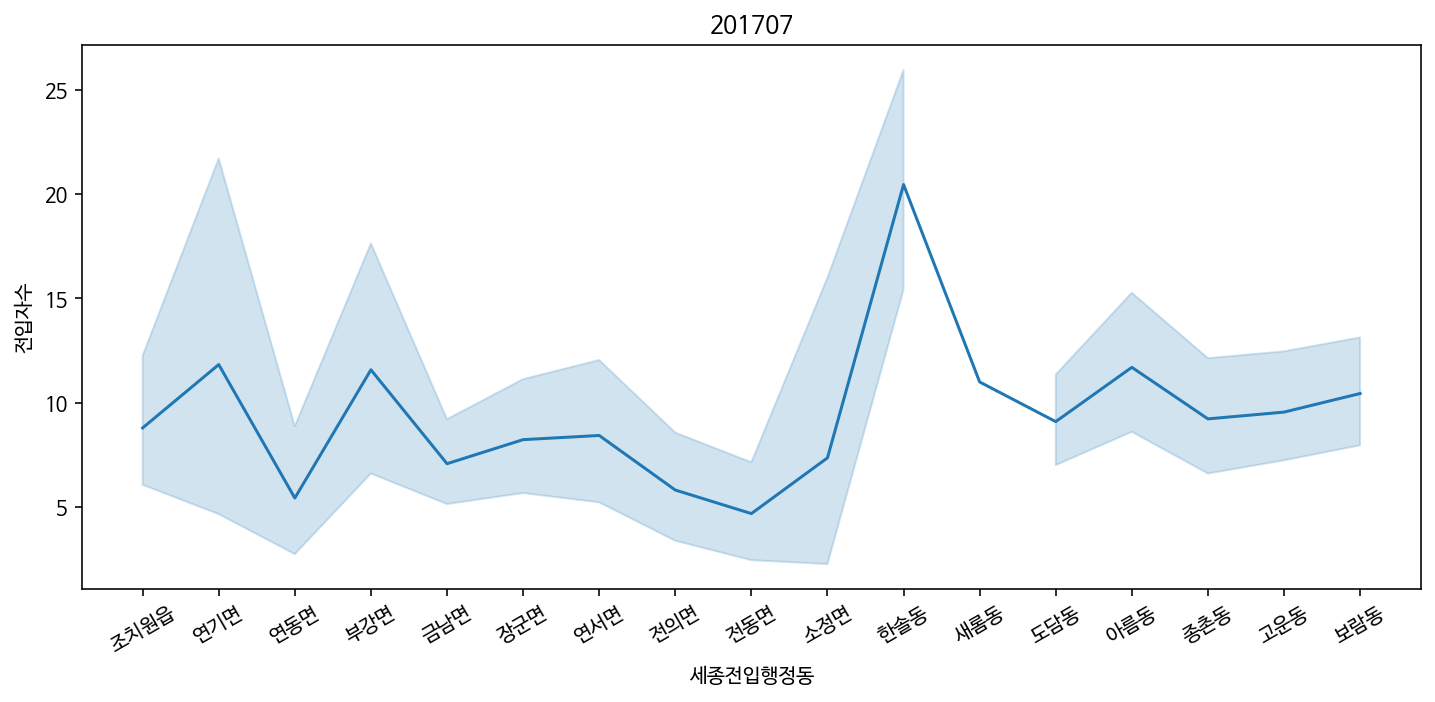

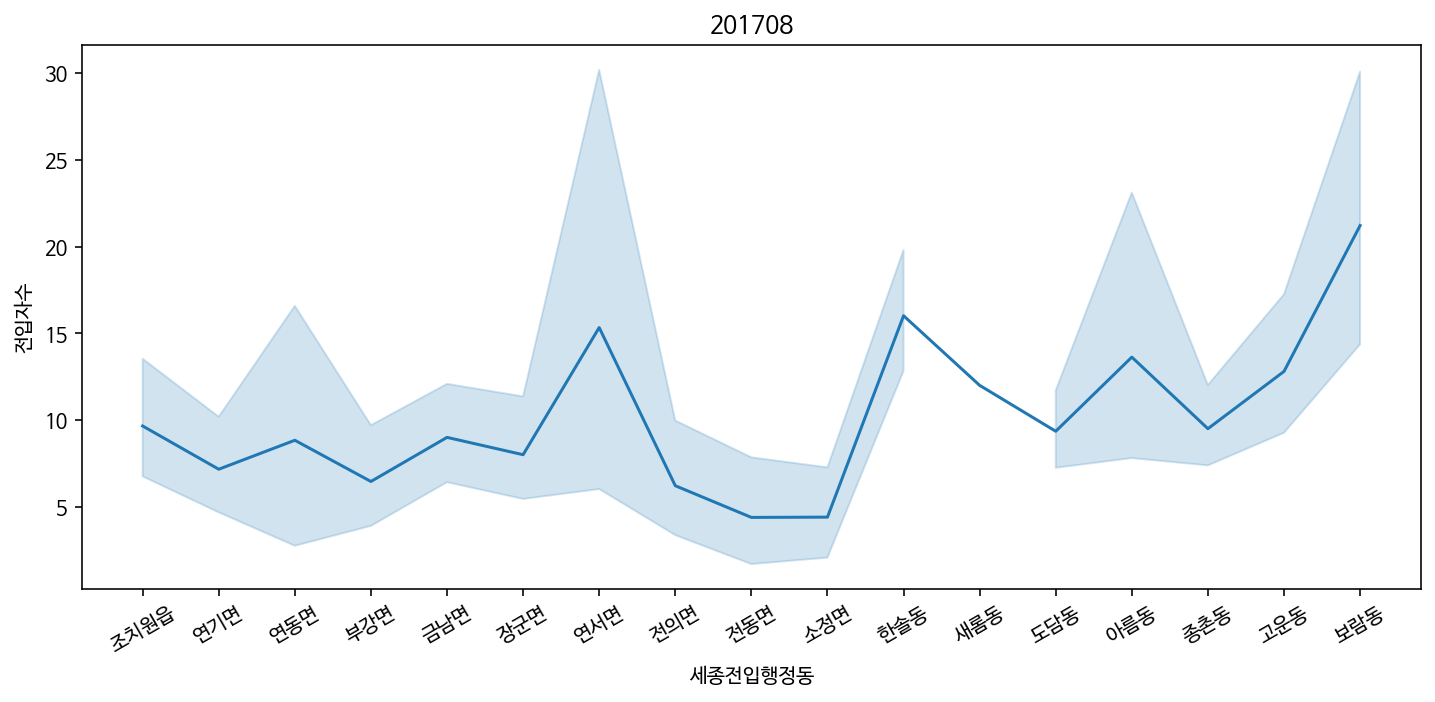

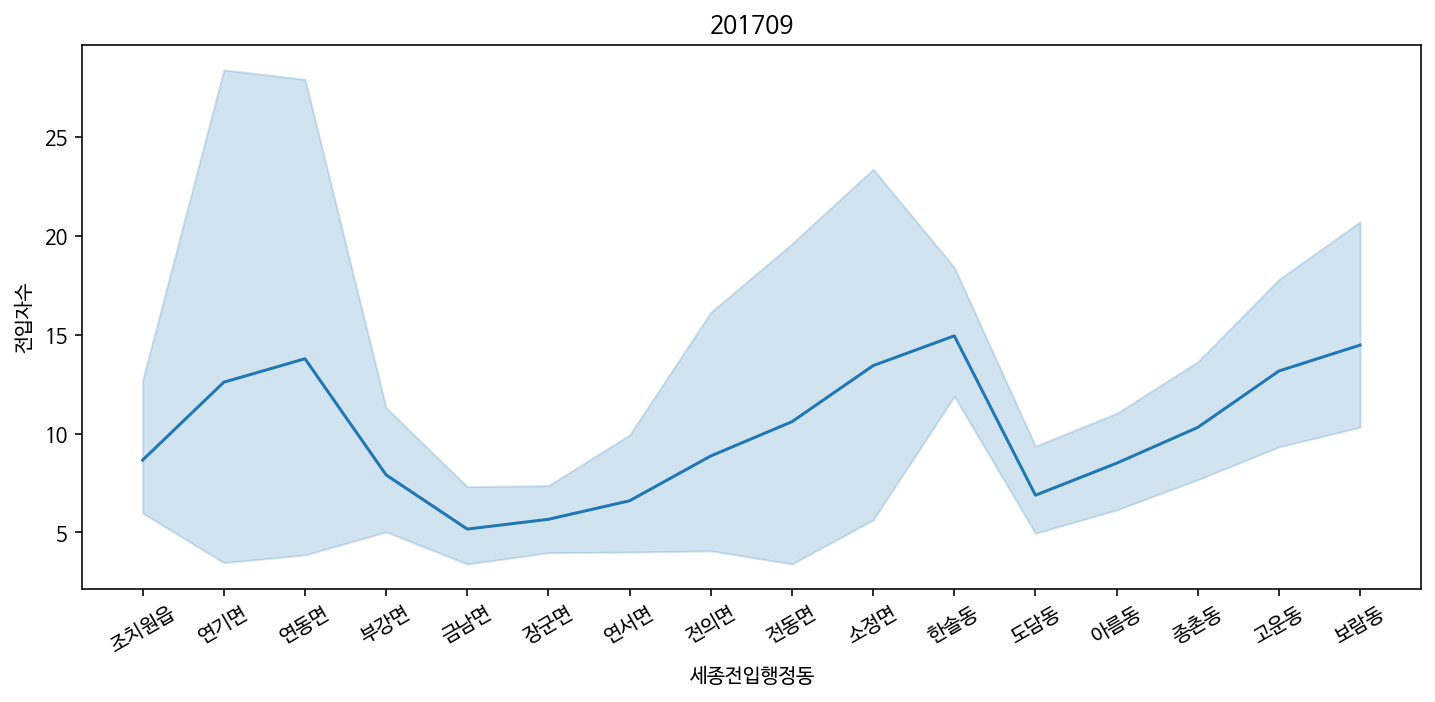

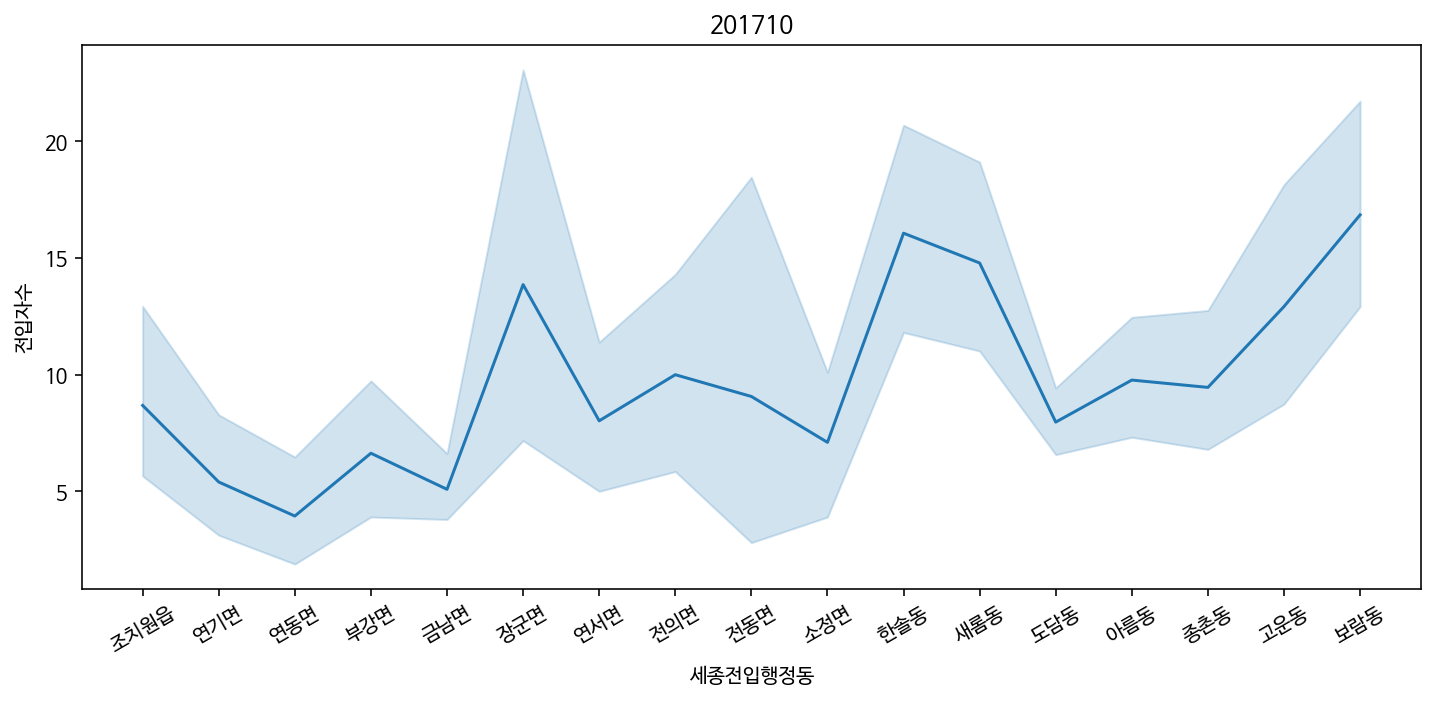

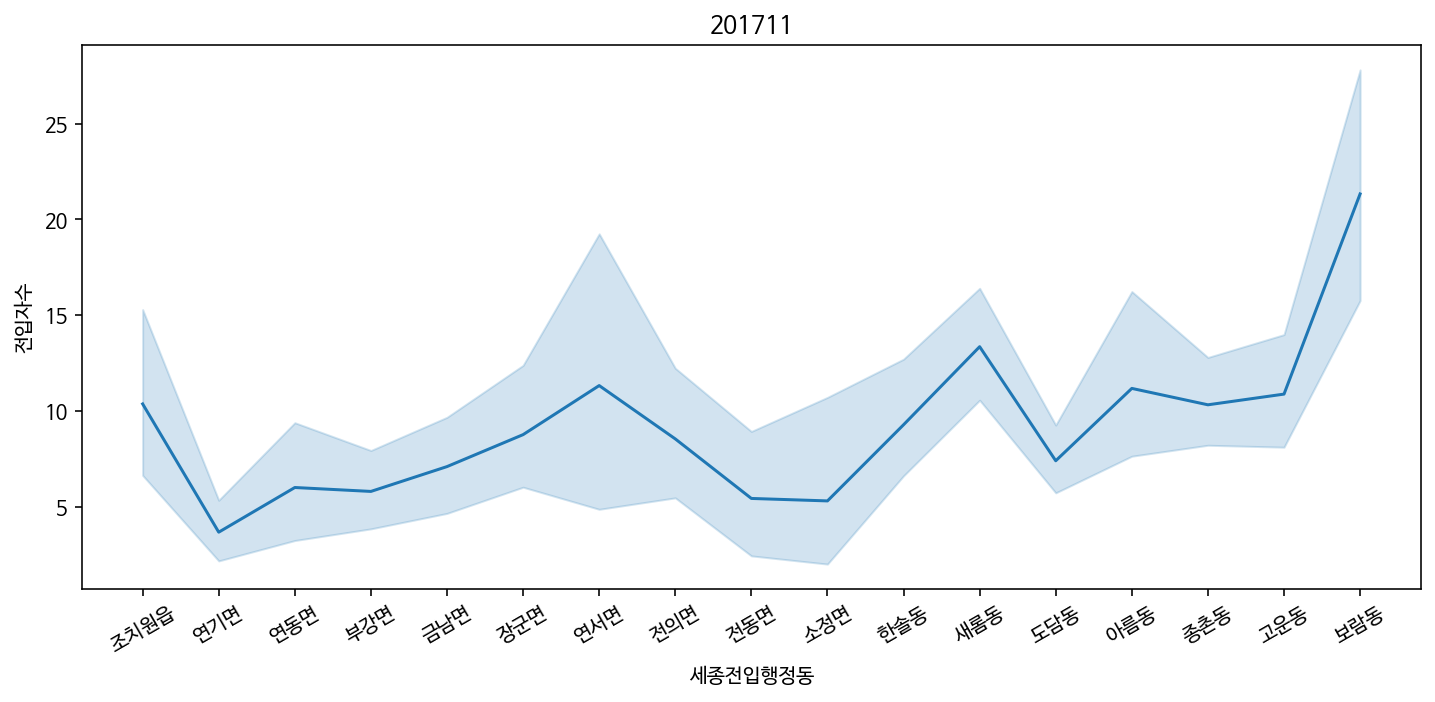

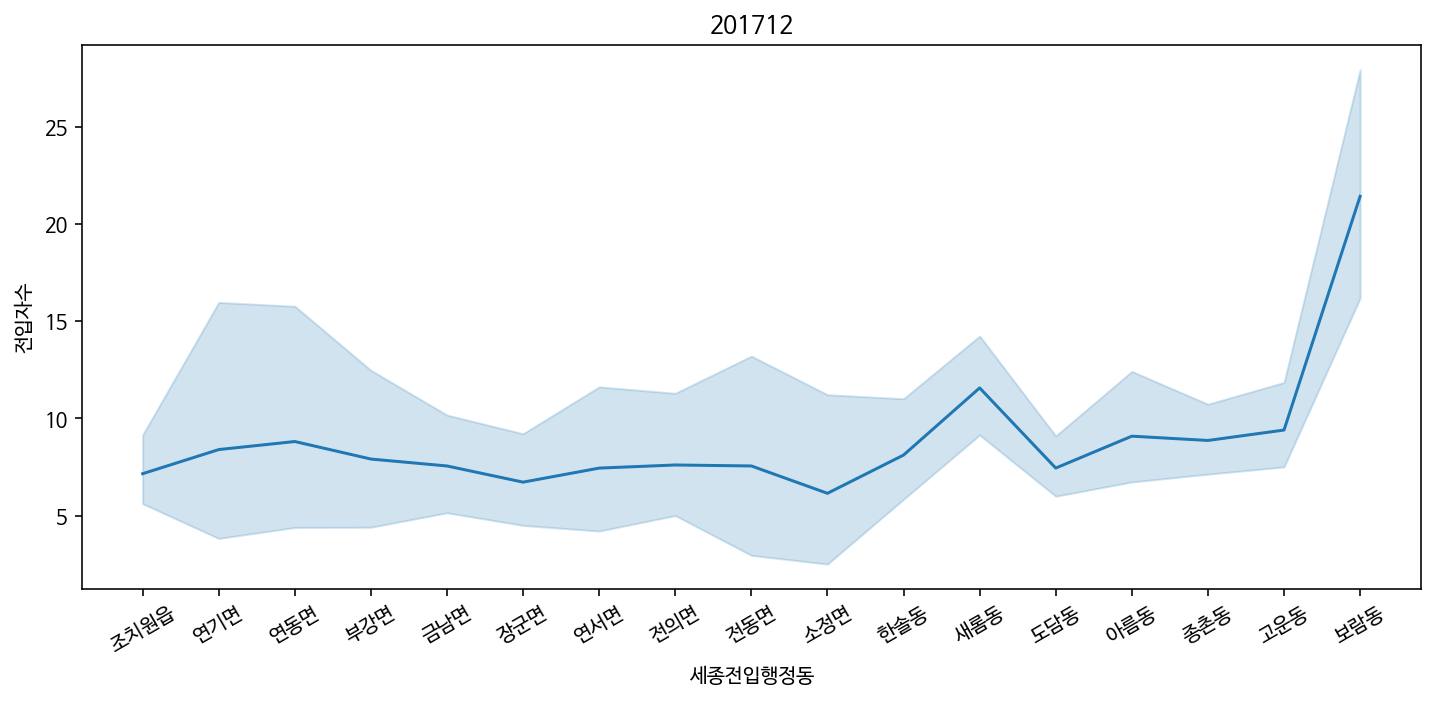

In [ ]:
a = 201701

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=in_a['세종전입행정동'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

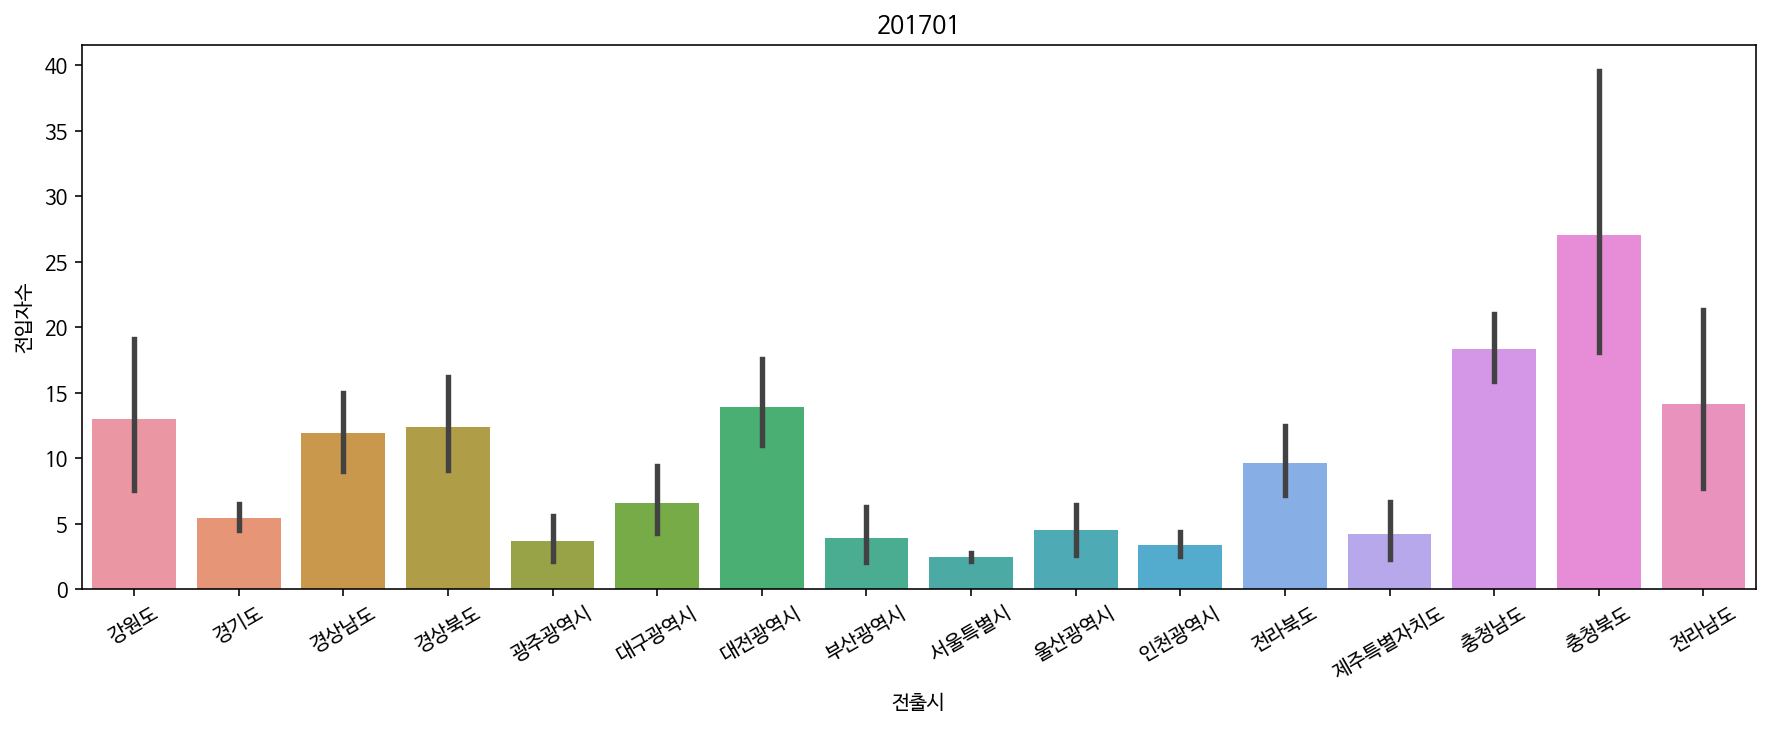

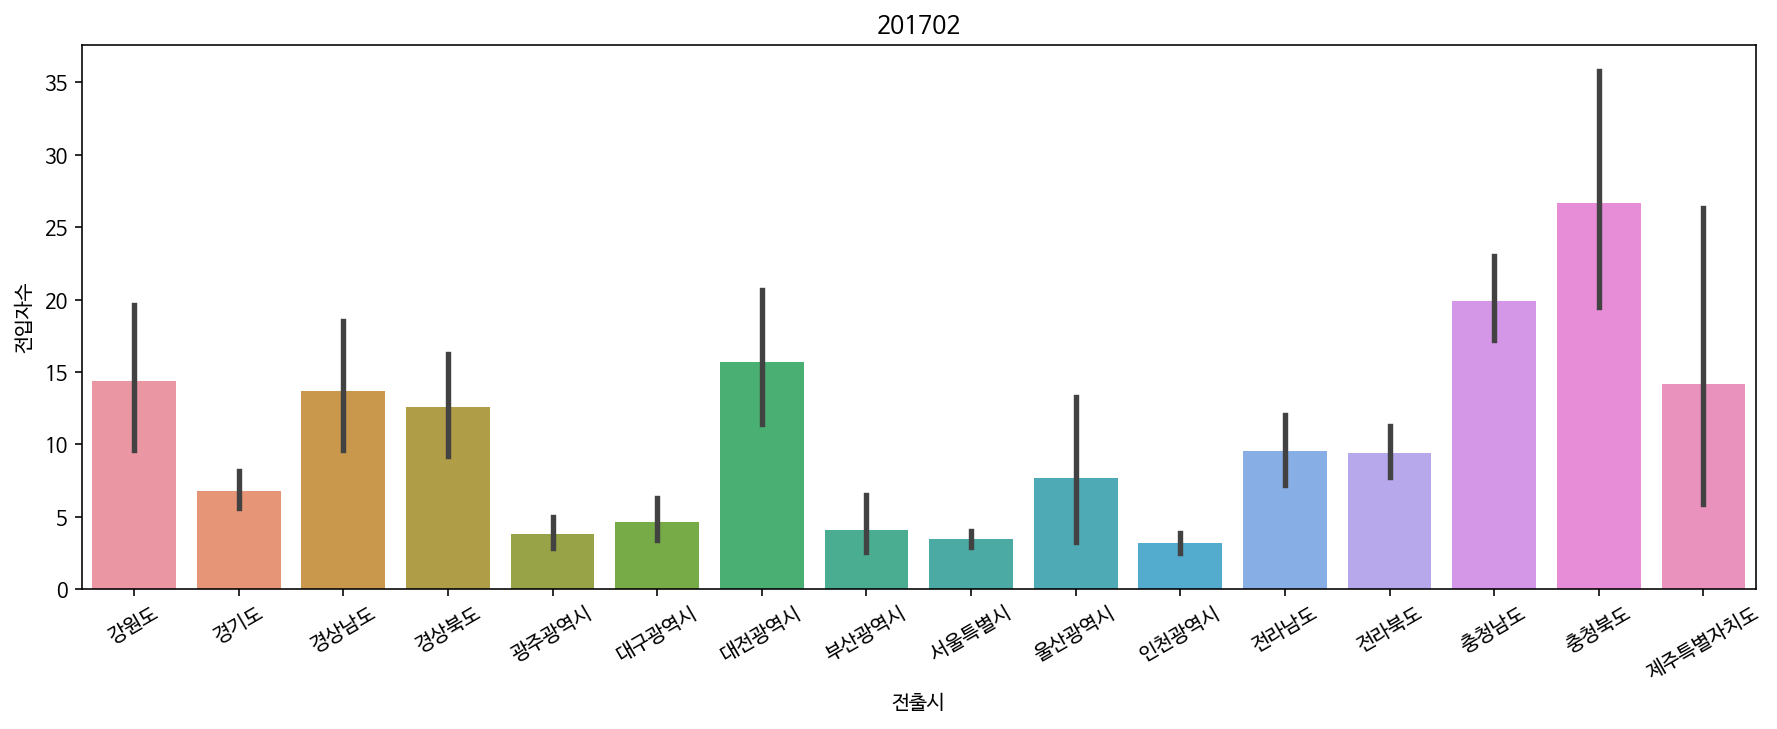

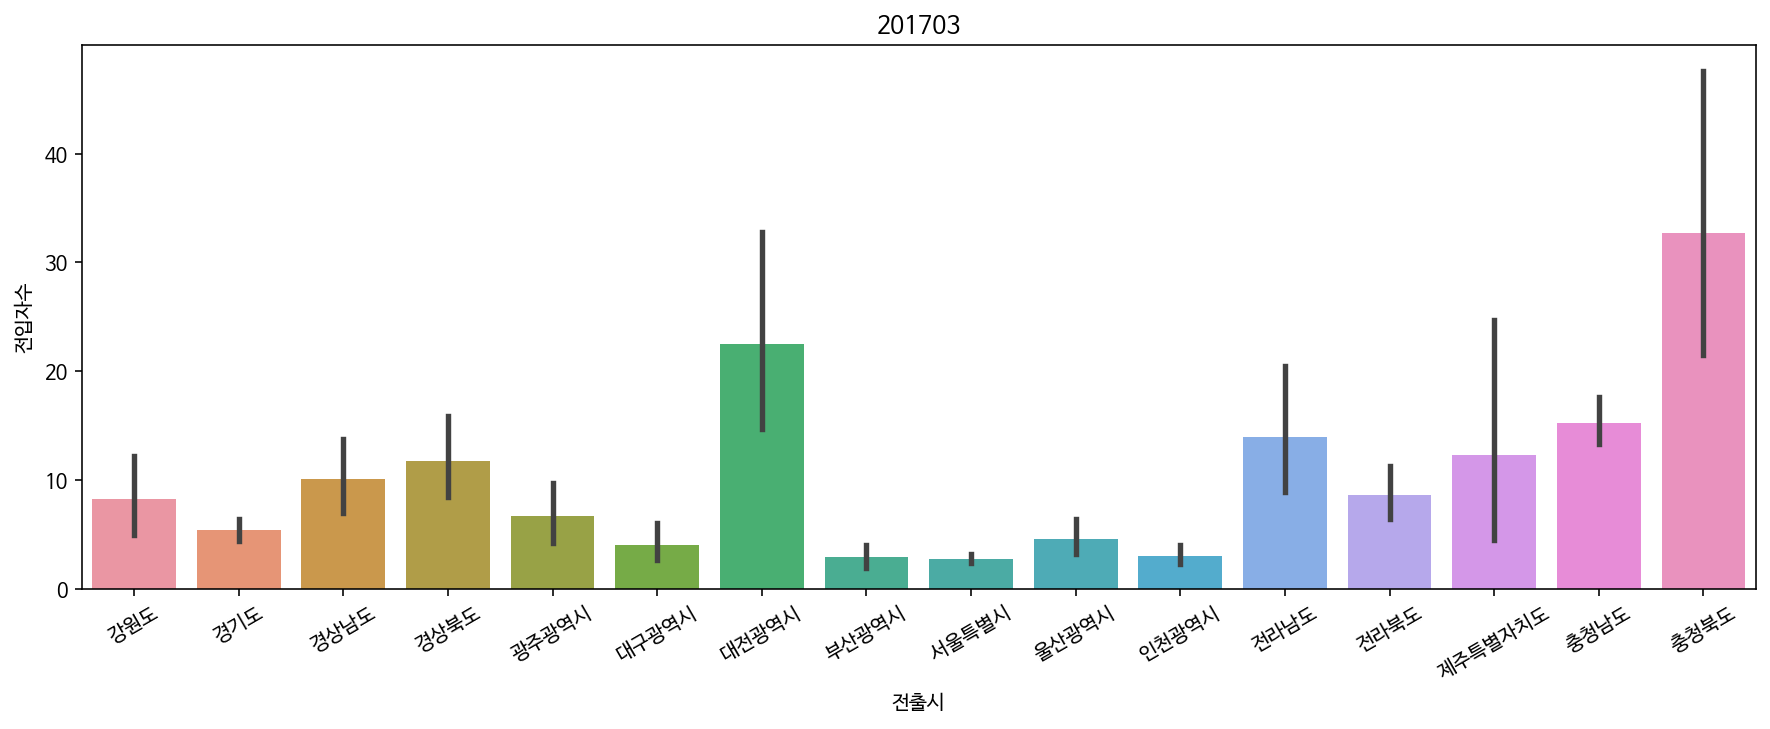

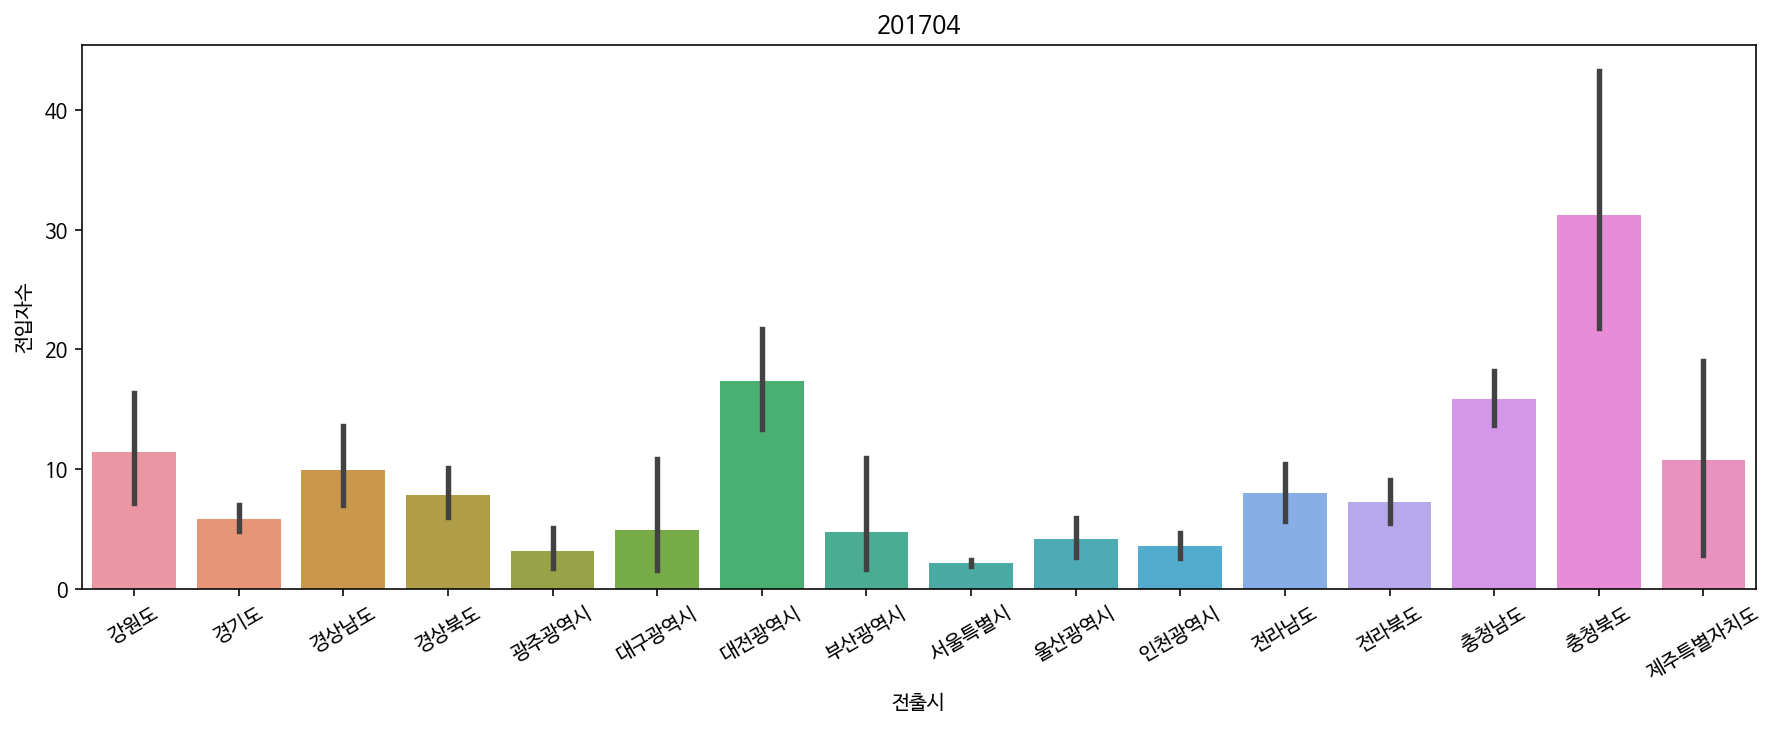

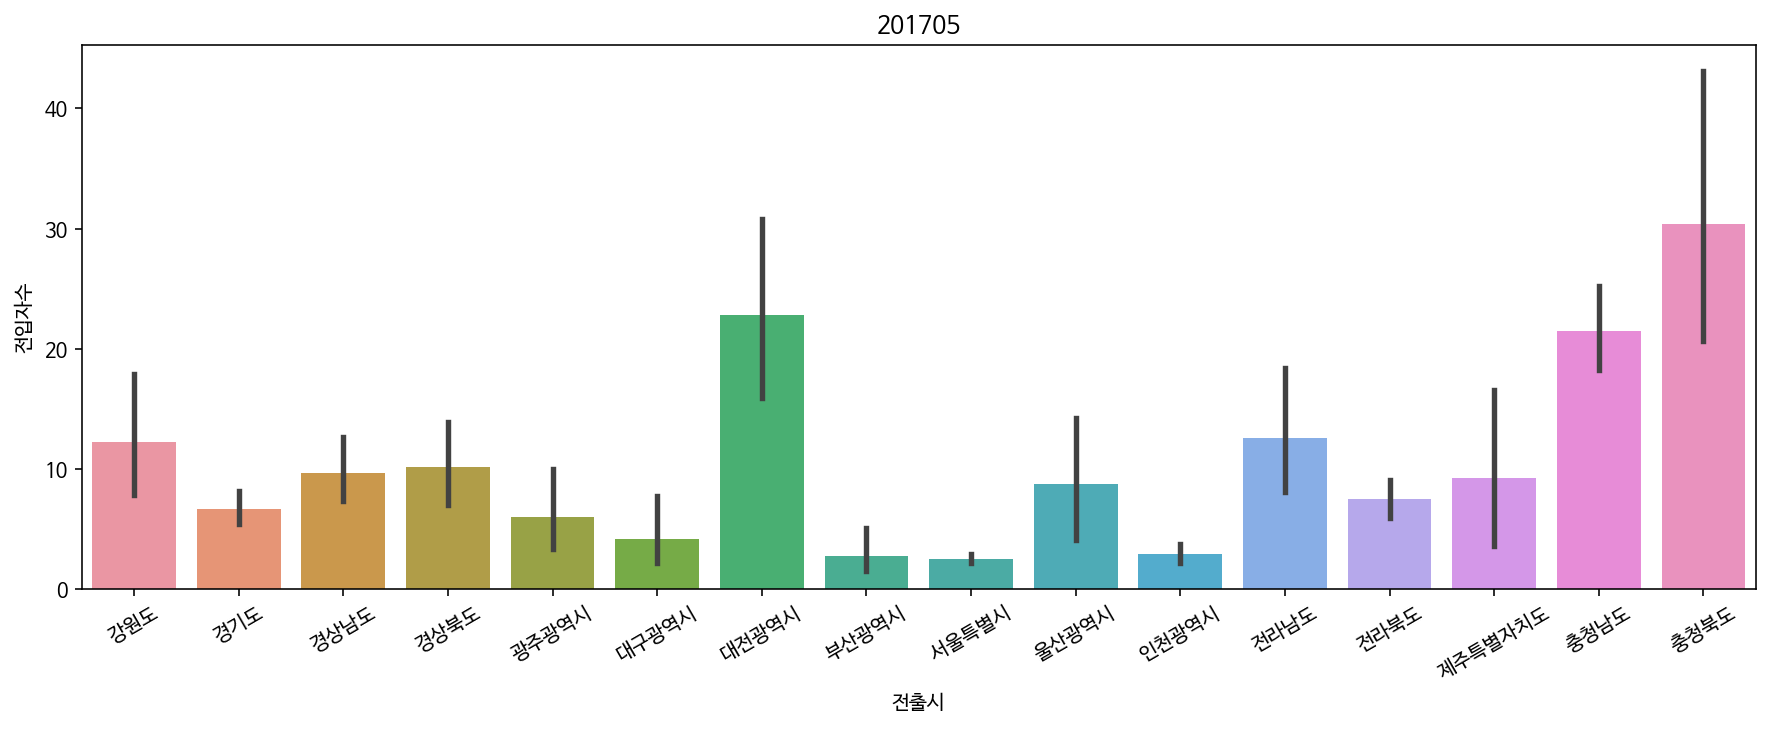

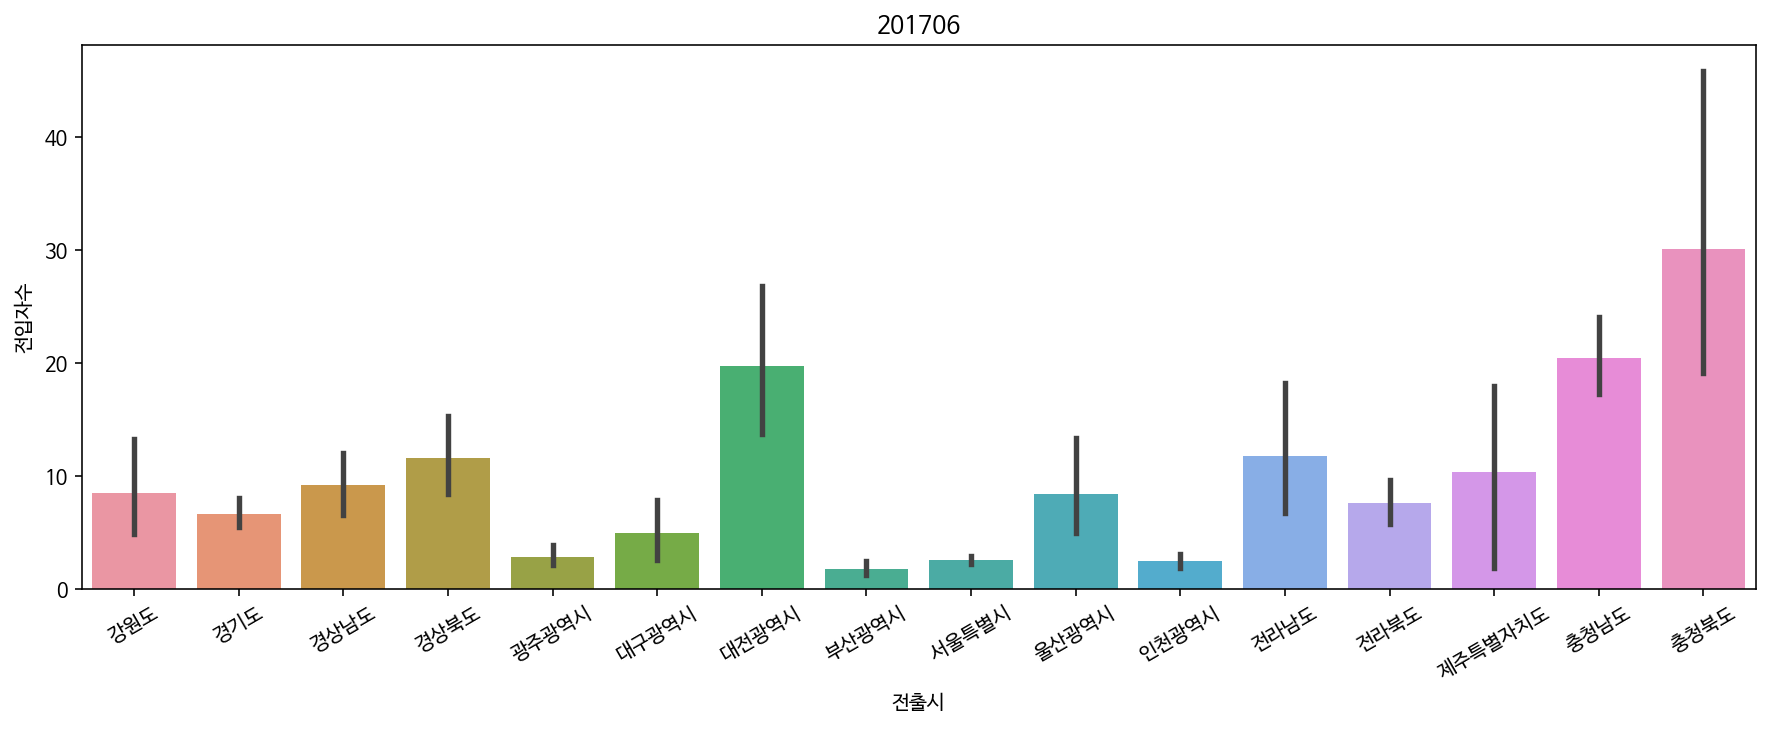

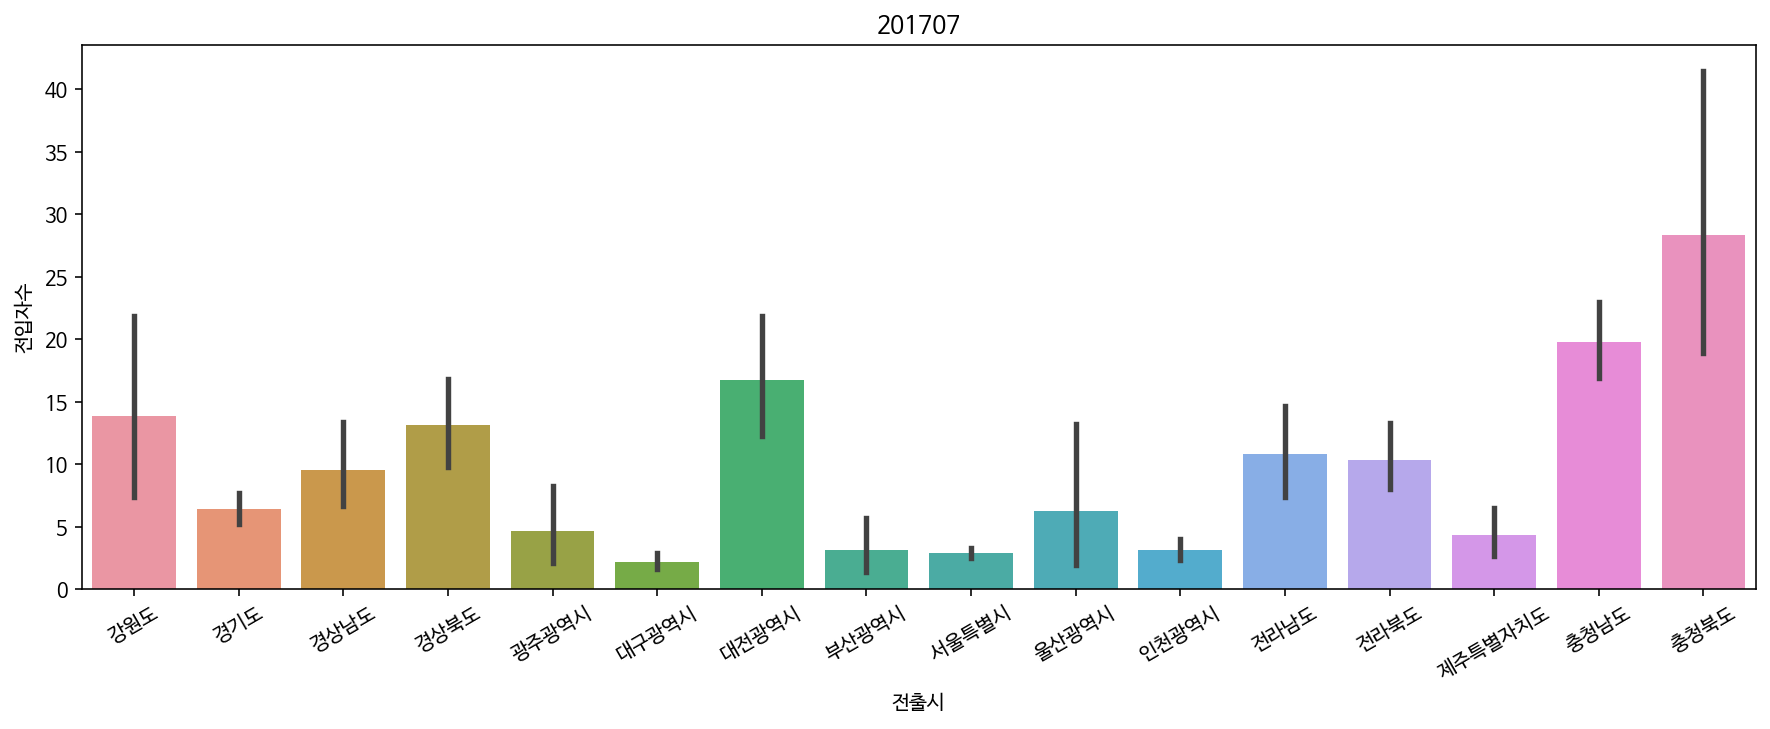

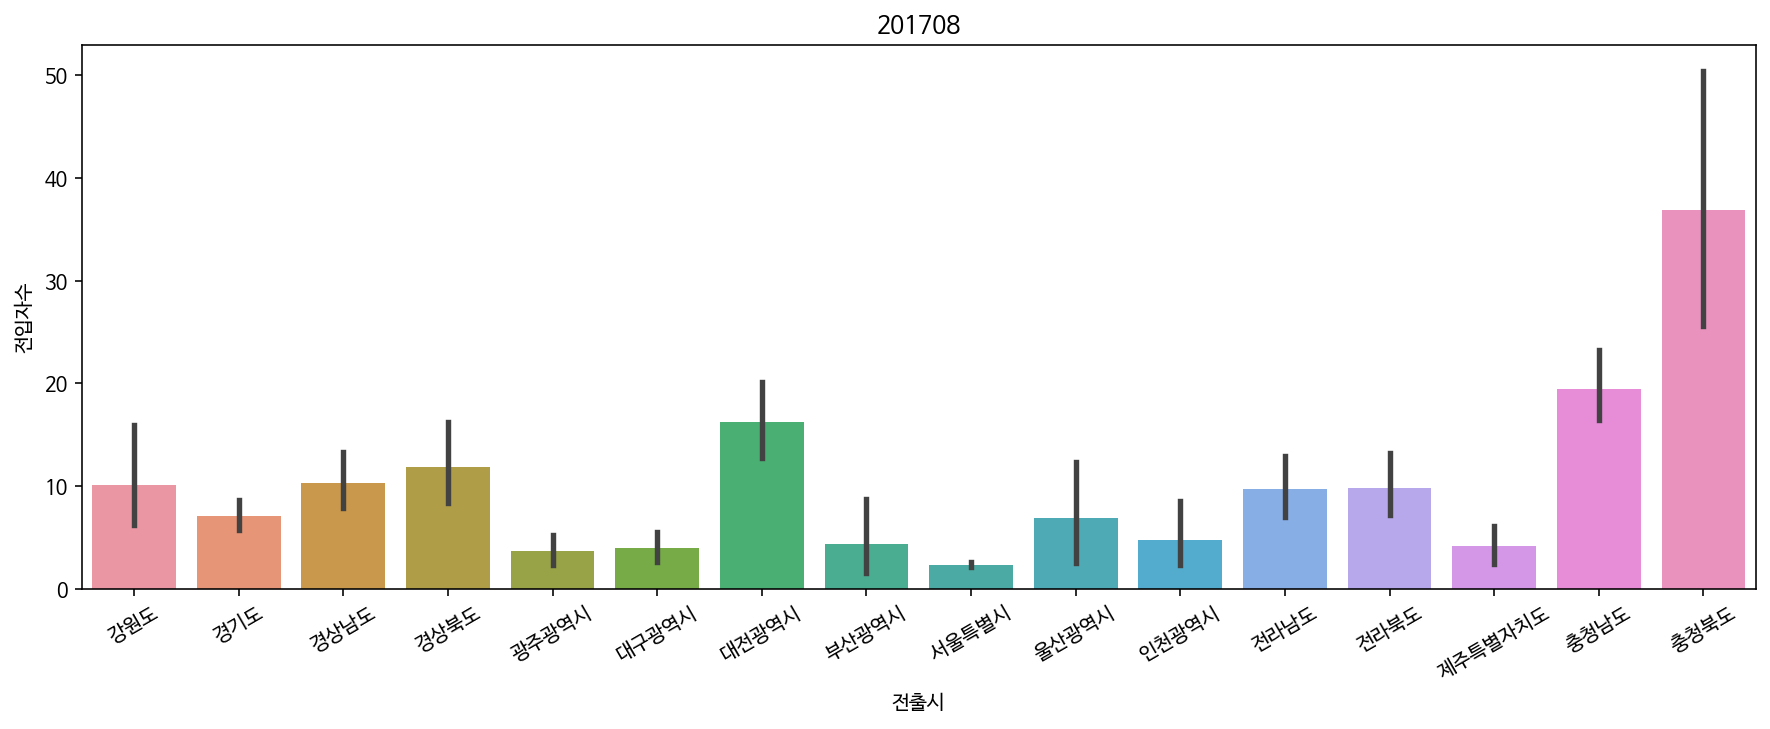

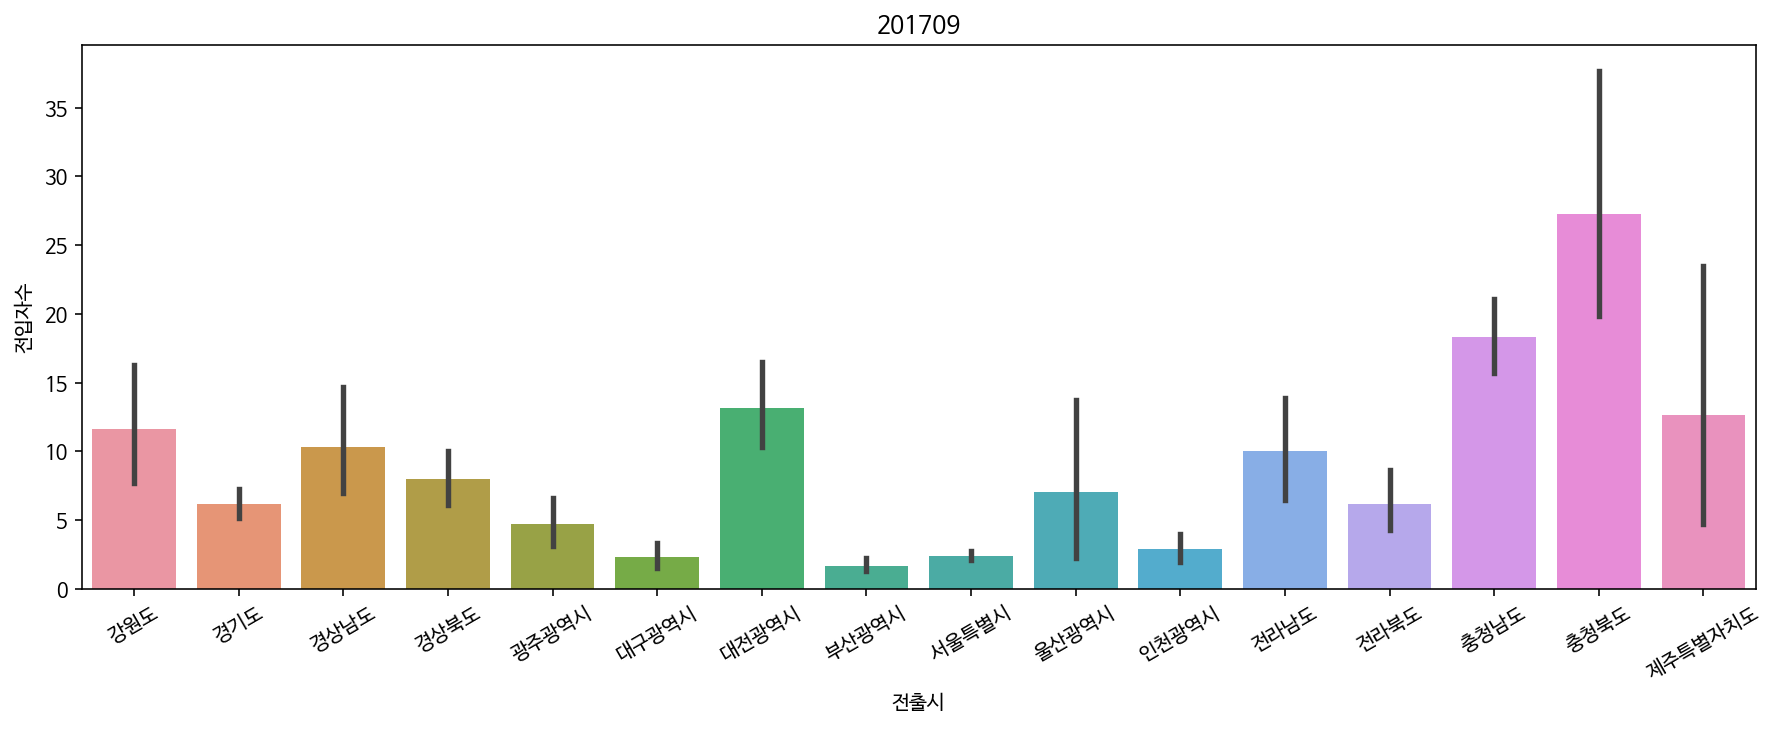

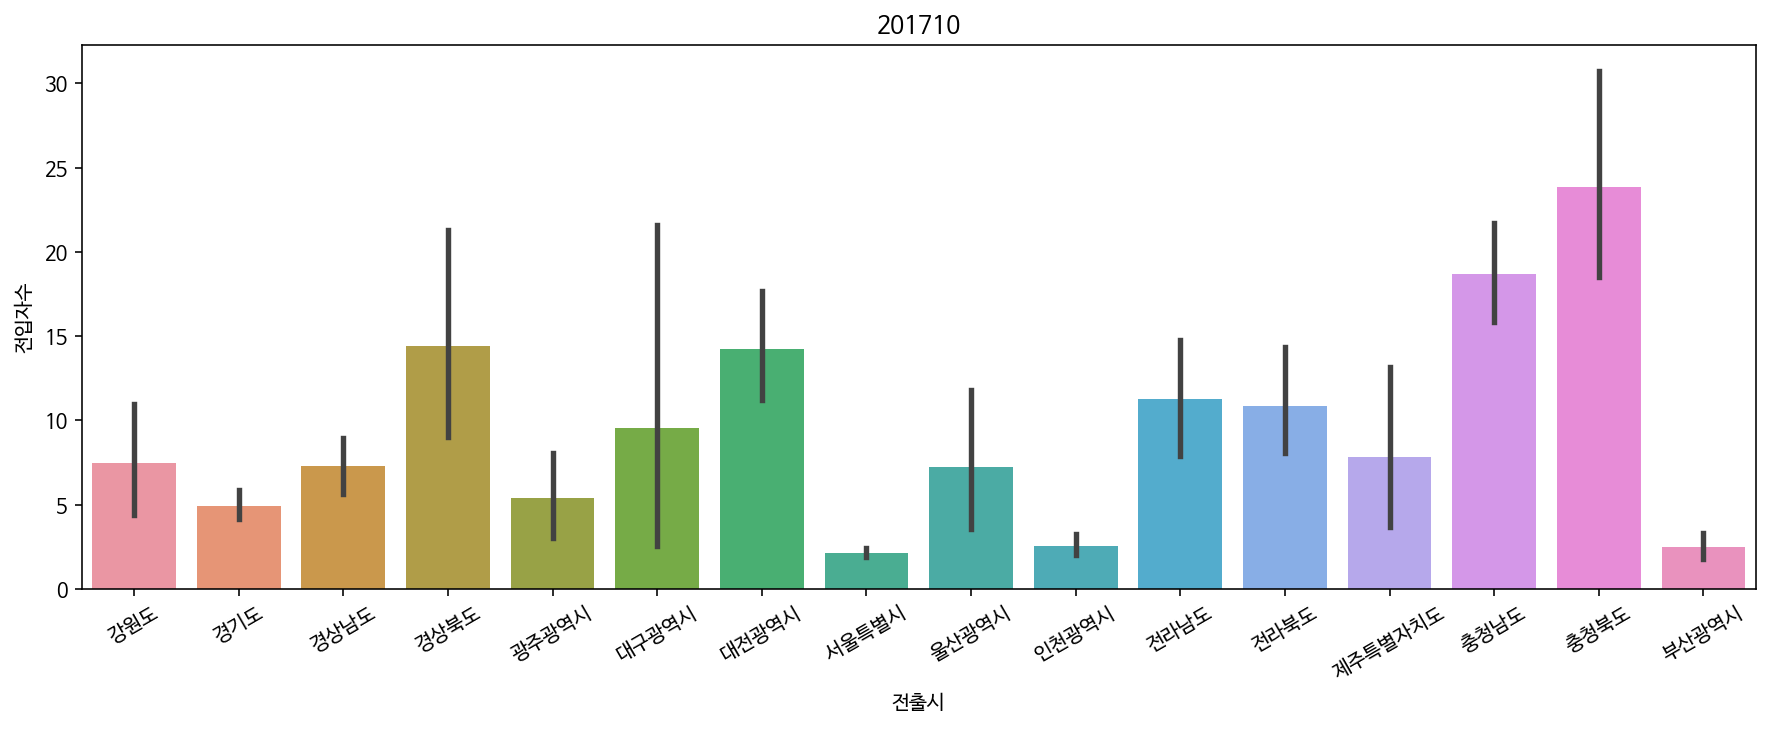

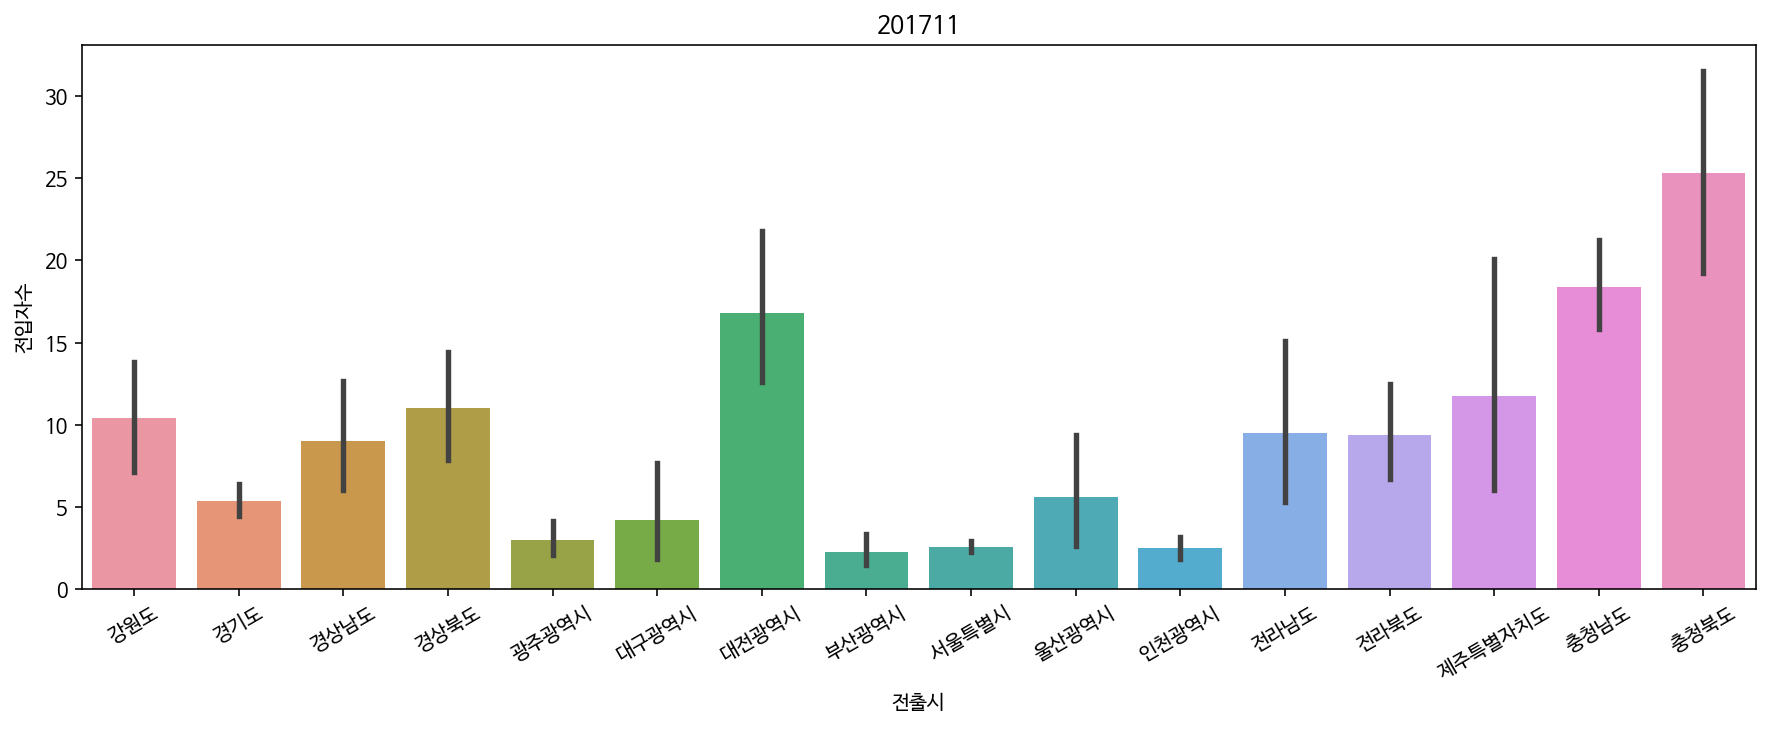

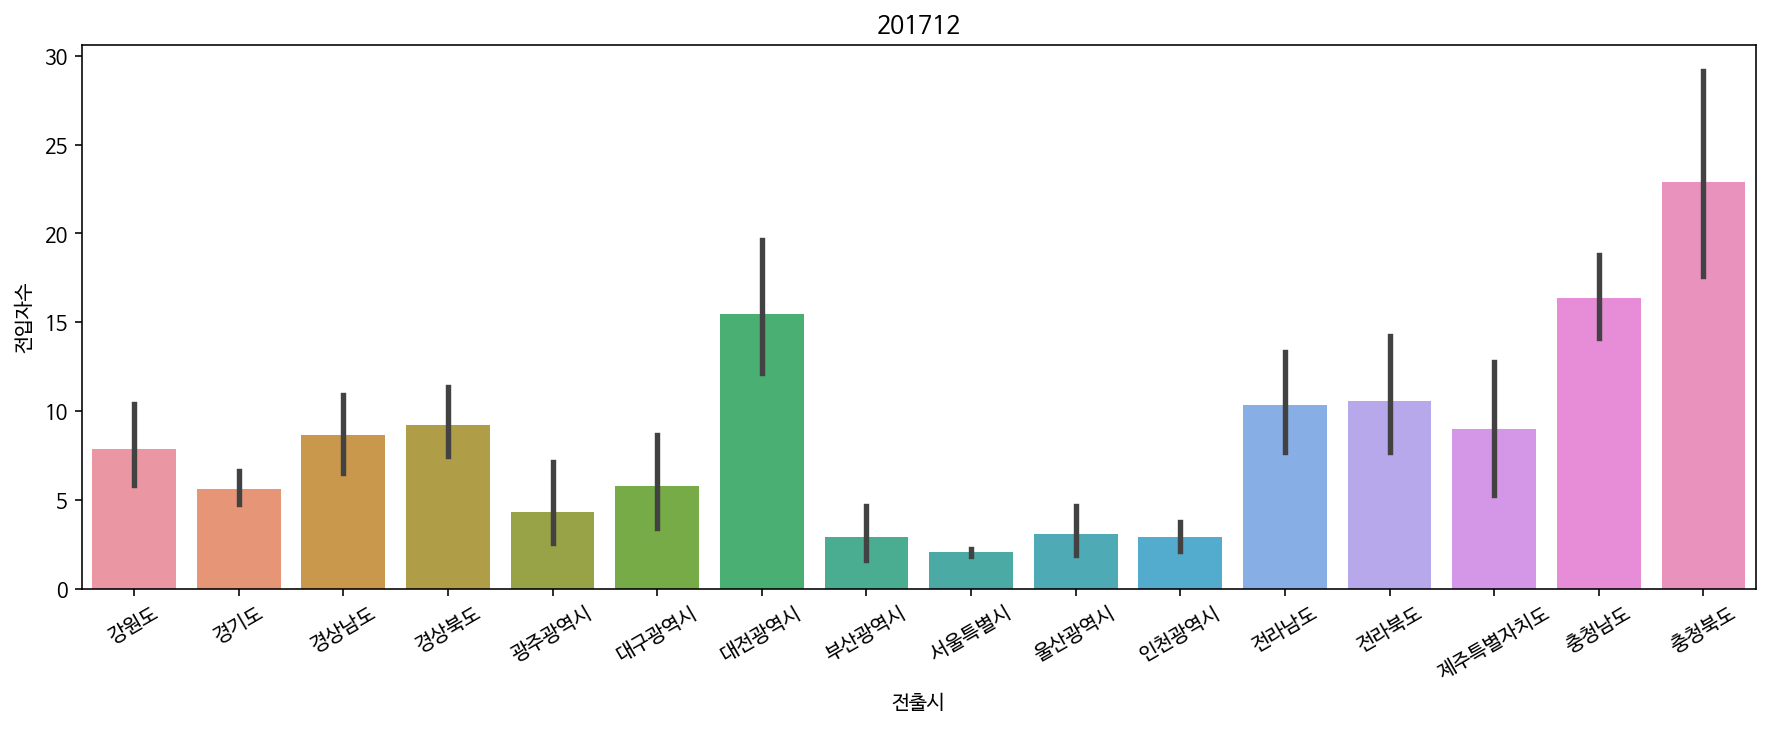

In [ ]:
a = 201701

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=in_a['전출시'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2018년도 전입자 추이

데이터 프레임 초기화 위해 다시 불러오기

In [ ]:
df_in = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/20.세종시_전입자수.csv', encoding='utf-8')
# 전출지역 세종시 삭제 
mask = df_in['전출시'].isin(['세종특별자치시'])
df_in = df_in[~mask]
df_in

년월  전입자수 세종전입행정동   전출시   전출시군구   전출읍면동
0       201701     1    조치원읍   강원도     강릉시     교1동
1       201701     6    조치원읍   강원도     동해시     천곡동
2       201701    14    조치원읍   강원도     속초시      교동
3       201701    21    조치원읍   강원도     양양군      서면
4       201701     2    조치원읍   강원도     원주시     원인동
...        ...   ...     ...   ...     ...     ...
108077  202101     3     다정동  충청북도  청주시흥덕구    복대1동
108078  202101    56     다정동  충청북도  청주시흥덕구     오송읍
108079  202101    32     다정동  충청북도  청주시흥덕구     옥산면
108080  202101     8     다정동  충청북도     충주시  교현·안림동
108081  202101     9     다정동  충청북도     충주시    중앙탑면

[98249 rows x 6 columns]

In [ ]:
a = 201801

for i in range(1, 13):
    df_in_a = df_in['년월']==a
    df_in[a] = df_in_a
    a += 1
print(df_in)

            년월  전입자수 세종전입행정동   전출시  ... 201809 201810  201811  201812
0       201701     1    조치원읍   강원도  ...  False  False   False   False
1       201701     6    조치원읍   강원도  ...  False  False   False   False
2       201701    14    조치원읍   강원도  ...  False  False   False   False
3       201701    21    조치원읍   강원도  ...  False  False   False   False
4       201701     2    조치원읍   강원도  ...  False  False   False   False
...        ...   ...     ...   ...  ...    ...    ...     ...     ...
108077  202101     3     다정동  충청북도  ...  False  False   False   False
108078  202101    56     다정동  충청북도  ...  False  False   False   False
108079  202101    32     다정동  충청북도  ...  False  False   False   False
108080  202101     8     다정동  충청북도  ...  False  False   False   False
108081  202101     9     다정동  충청북도  ...  False  False   False   False

[98249 rows x 18 columns]


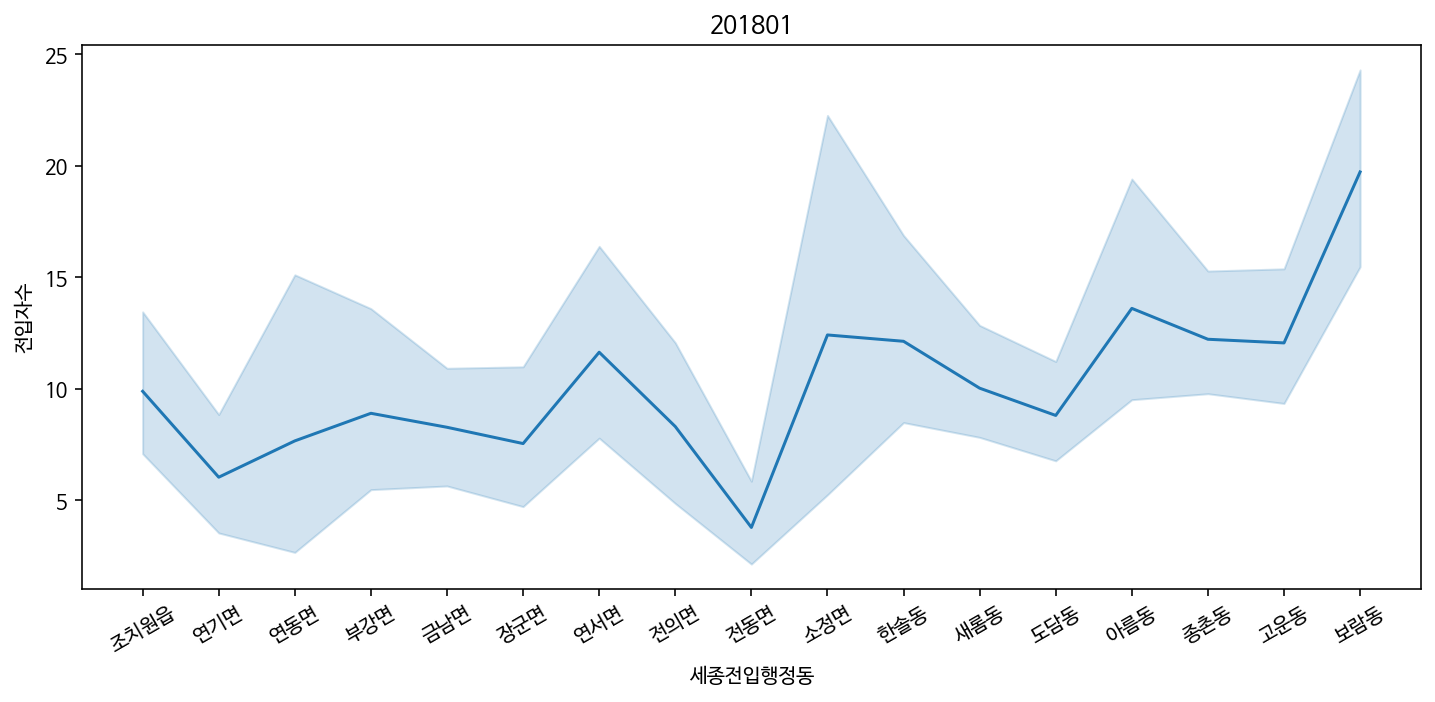

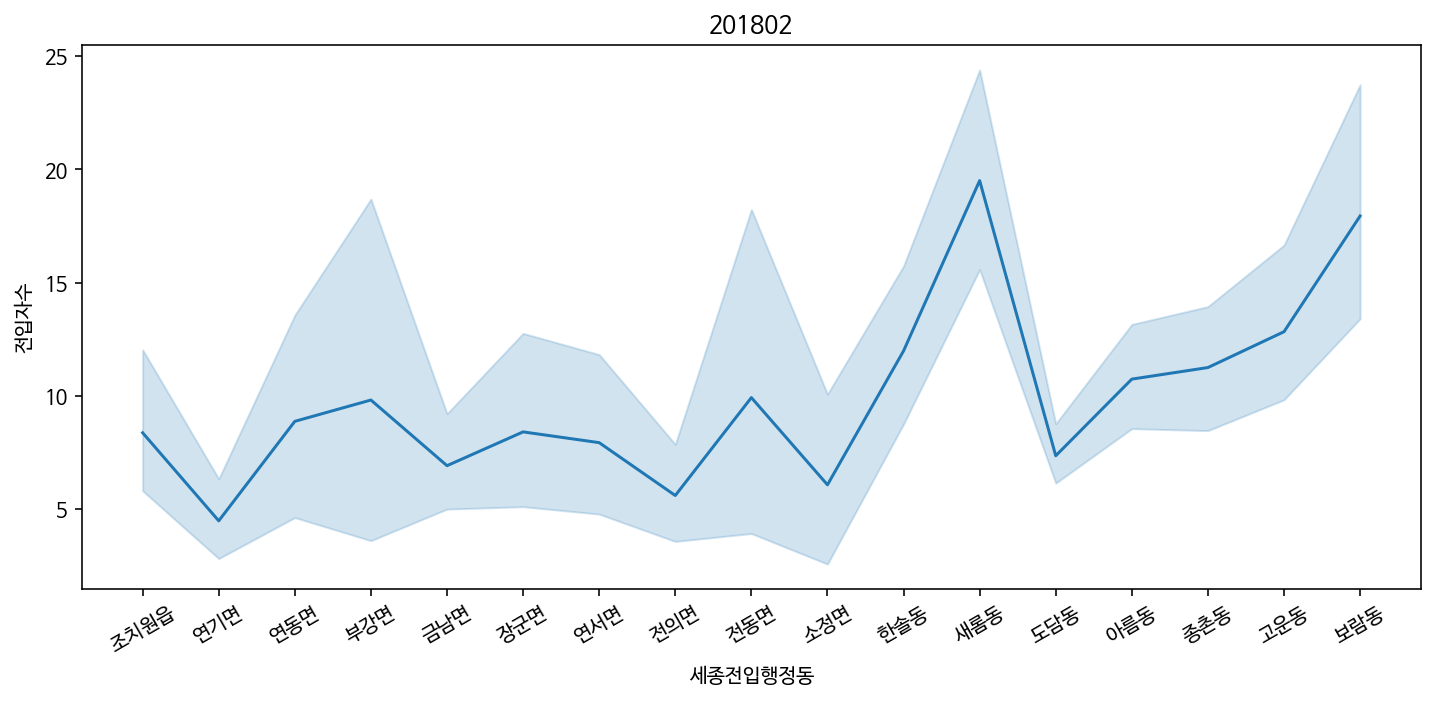

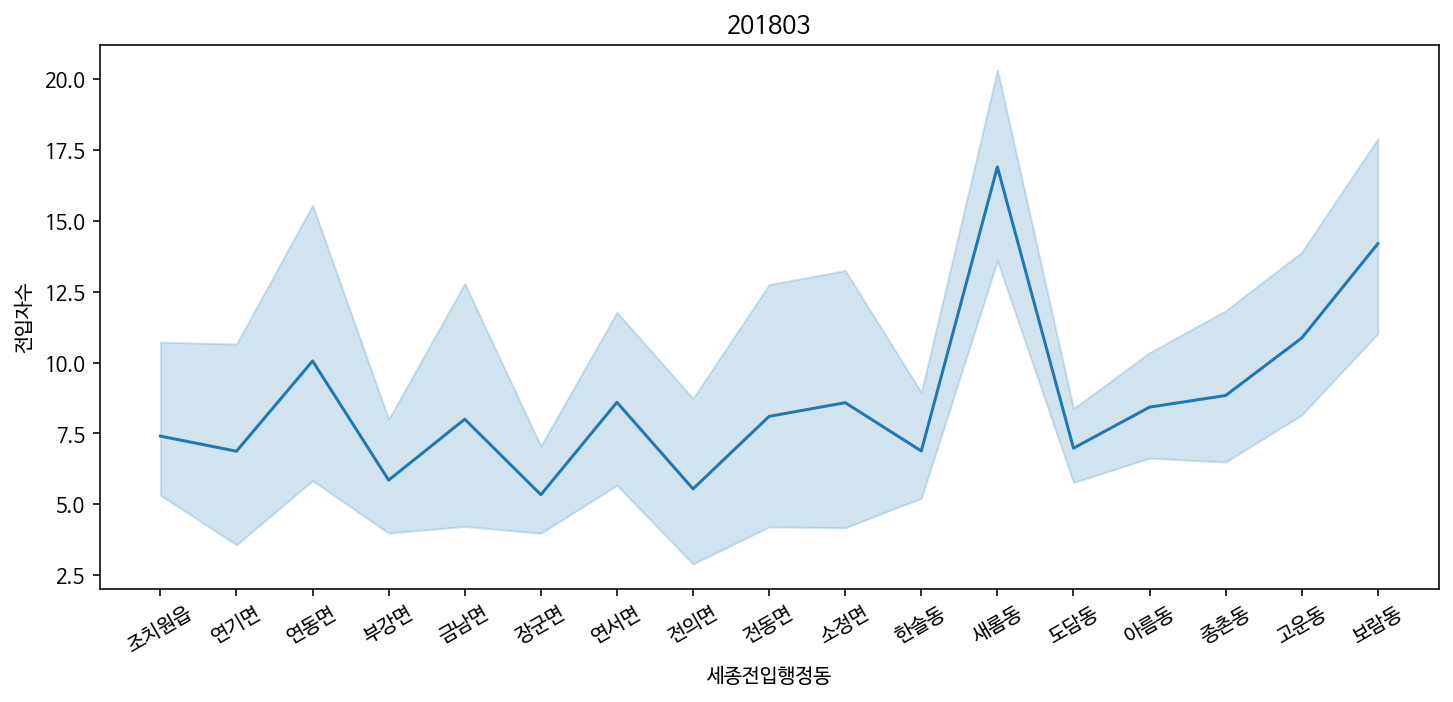

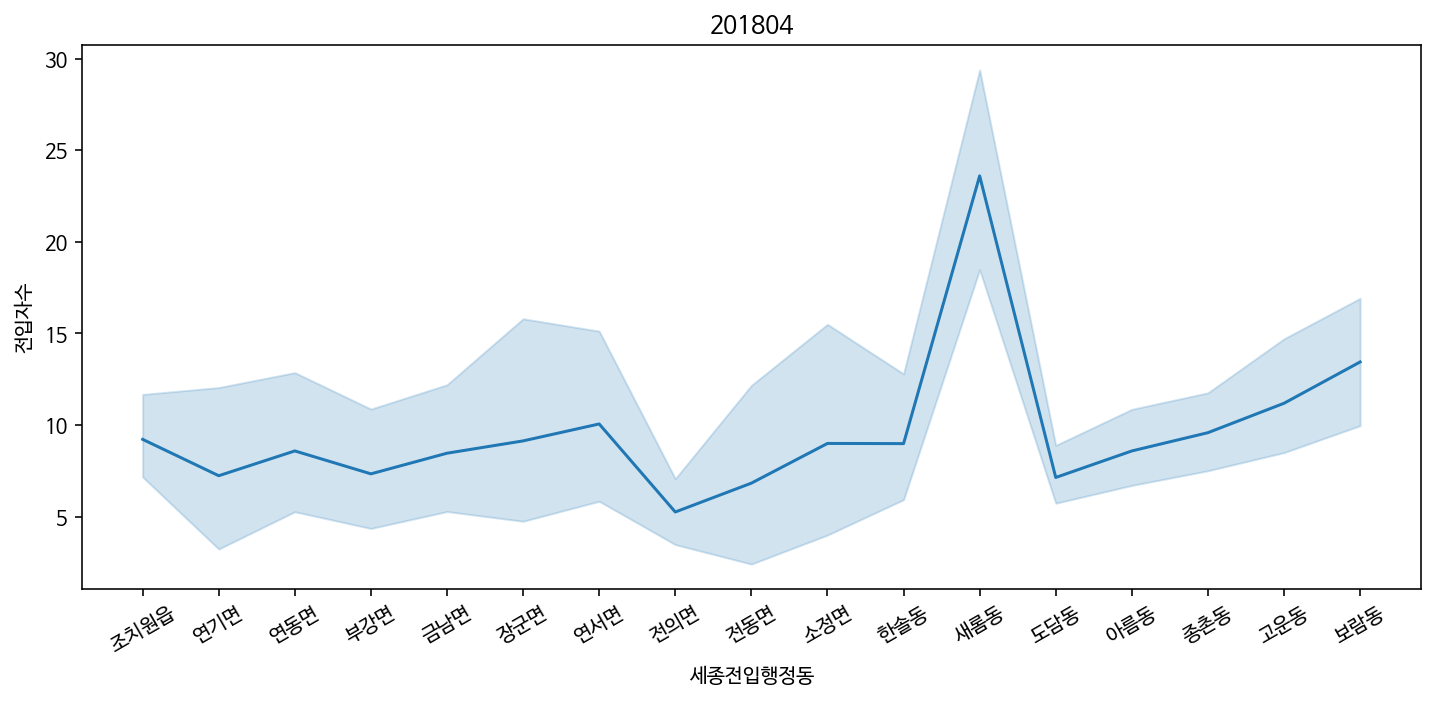

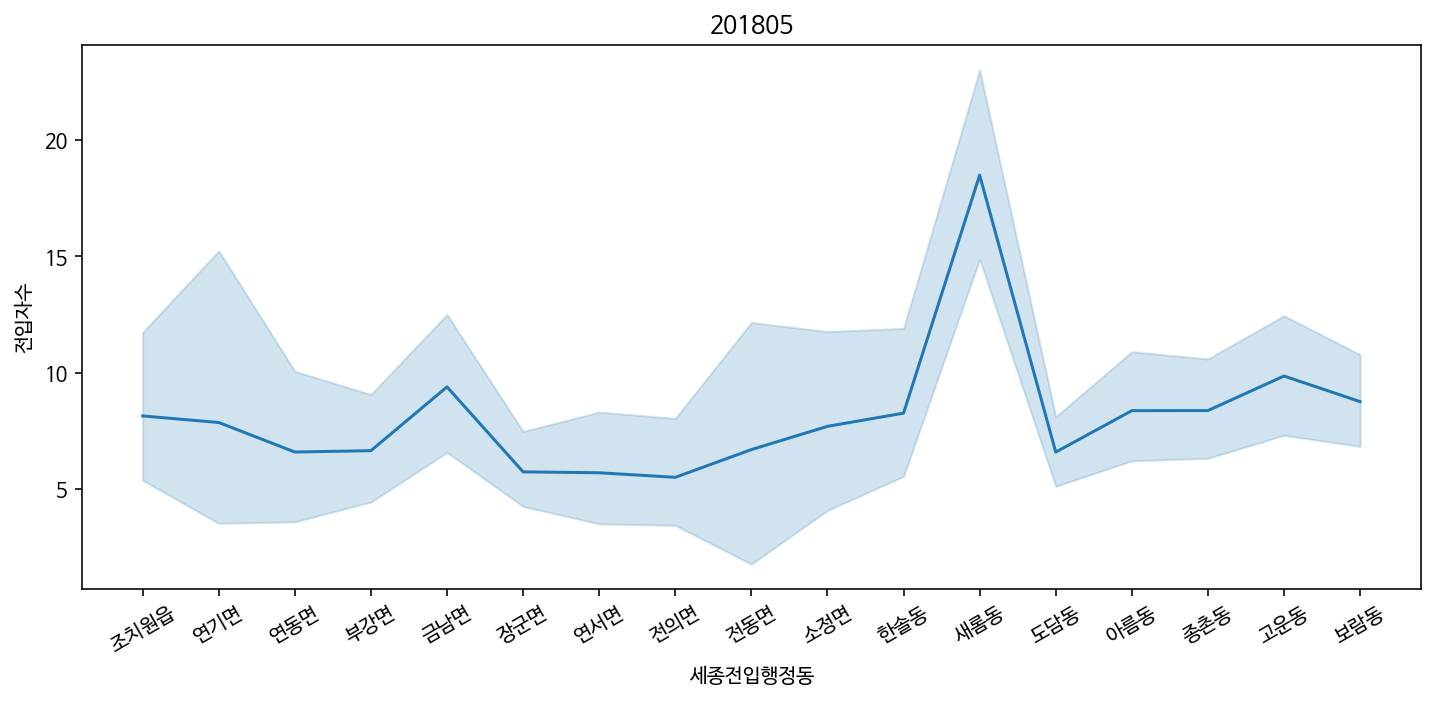

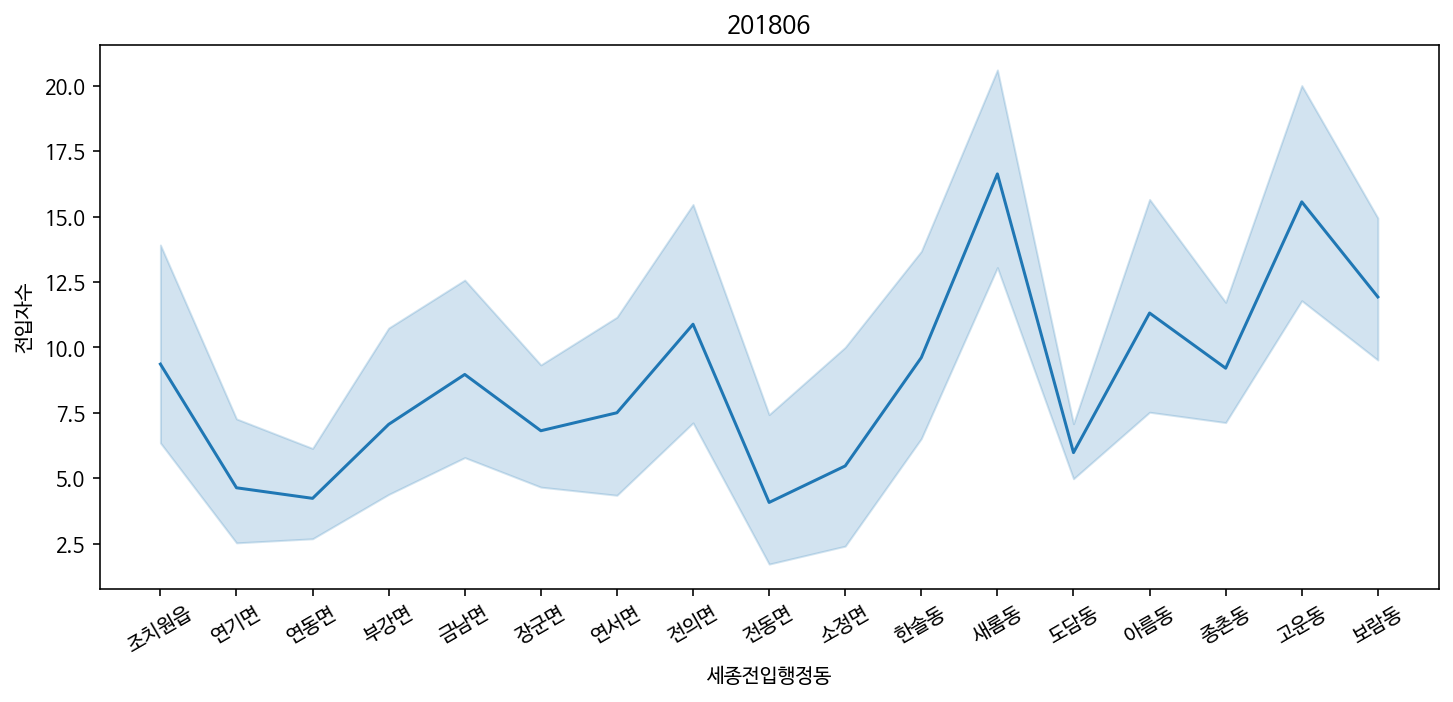

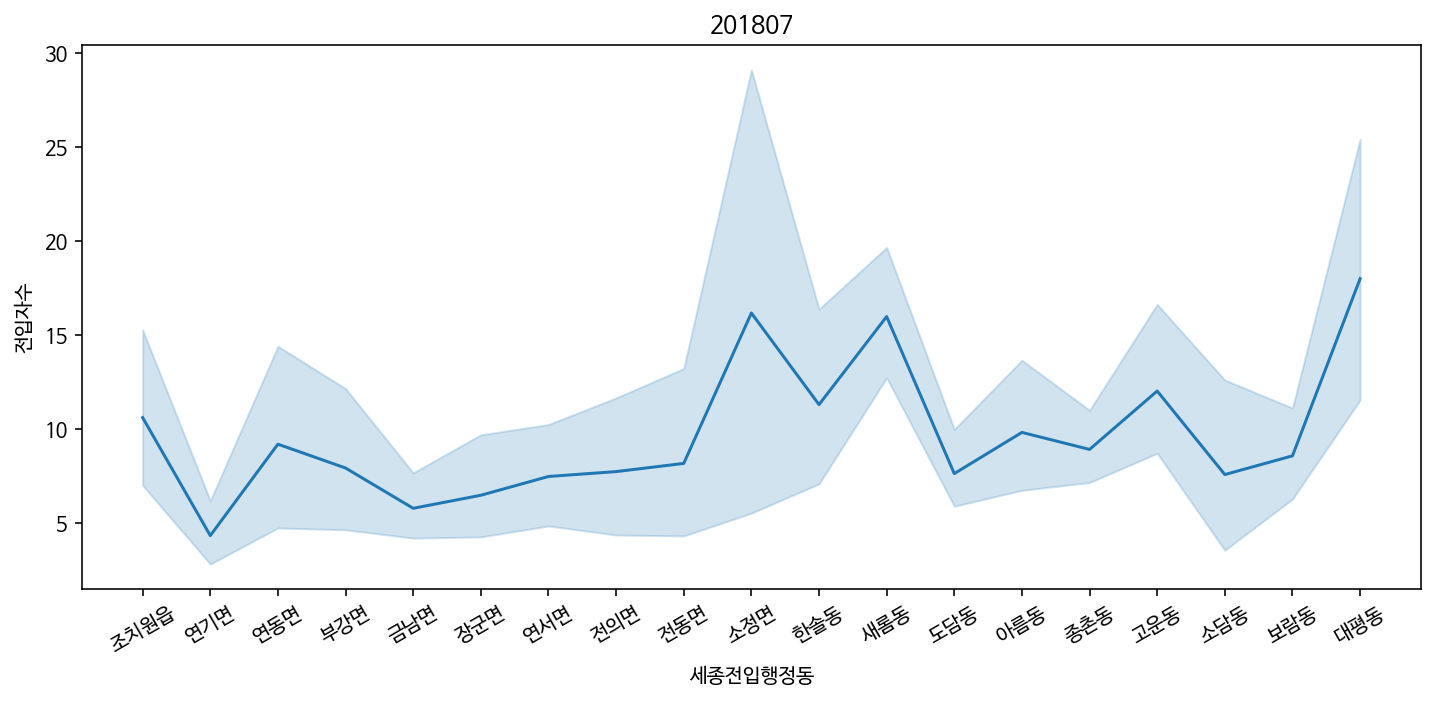

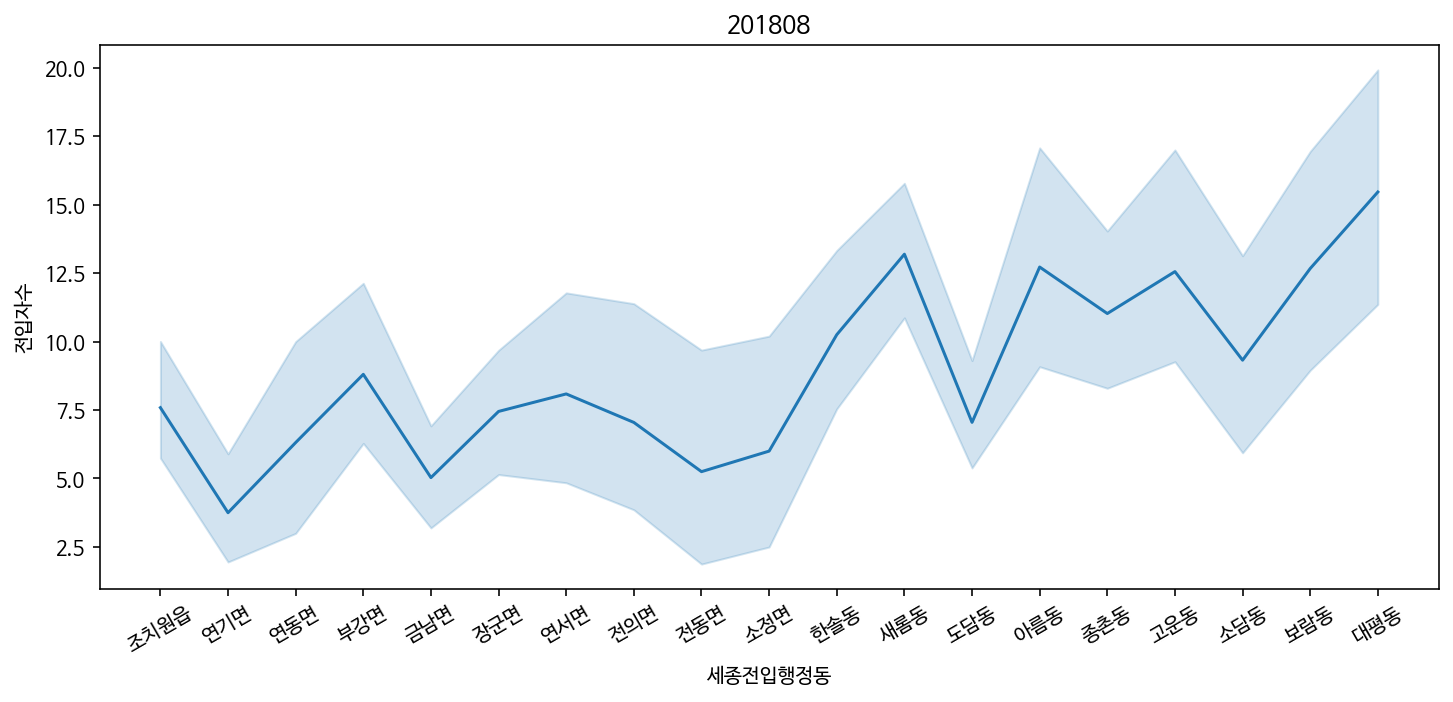

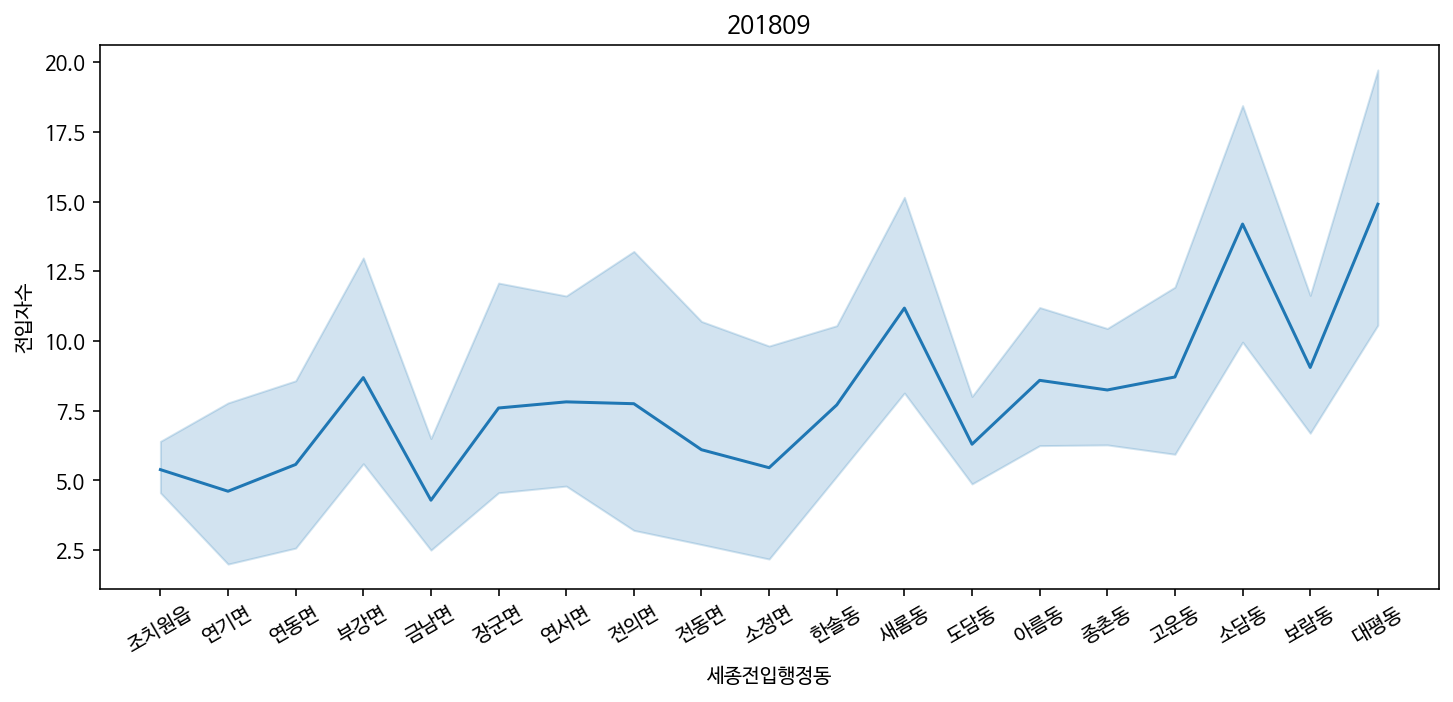

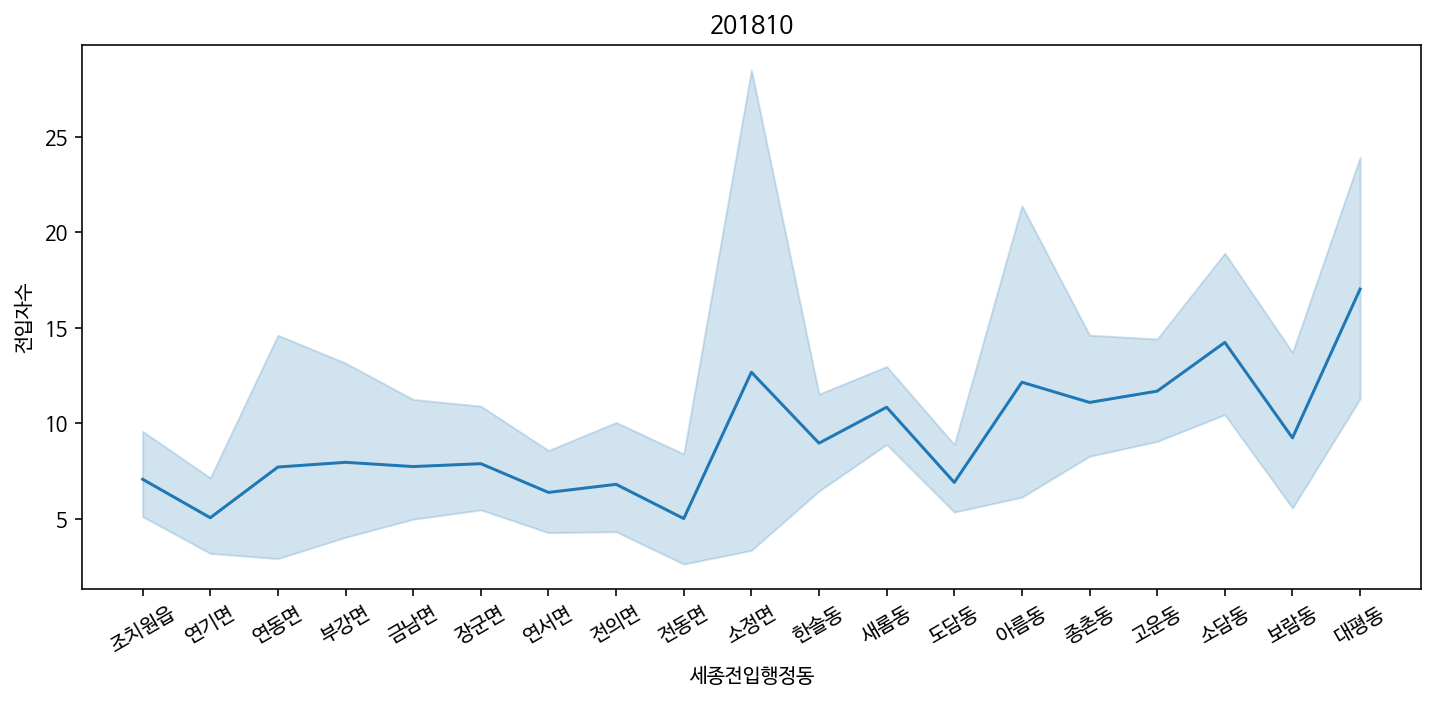

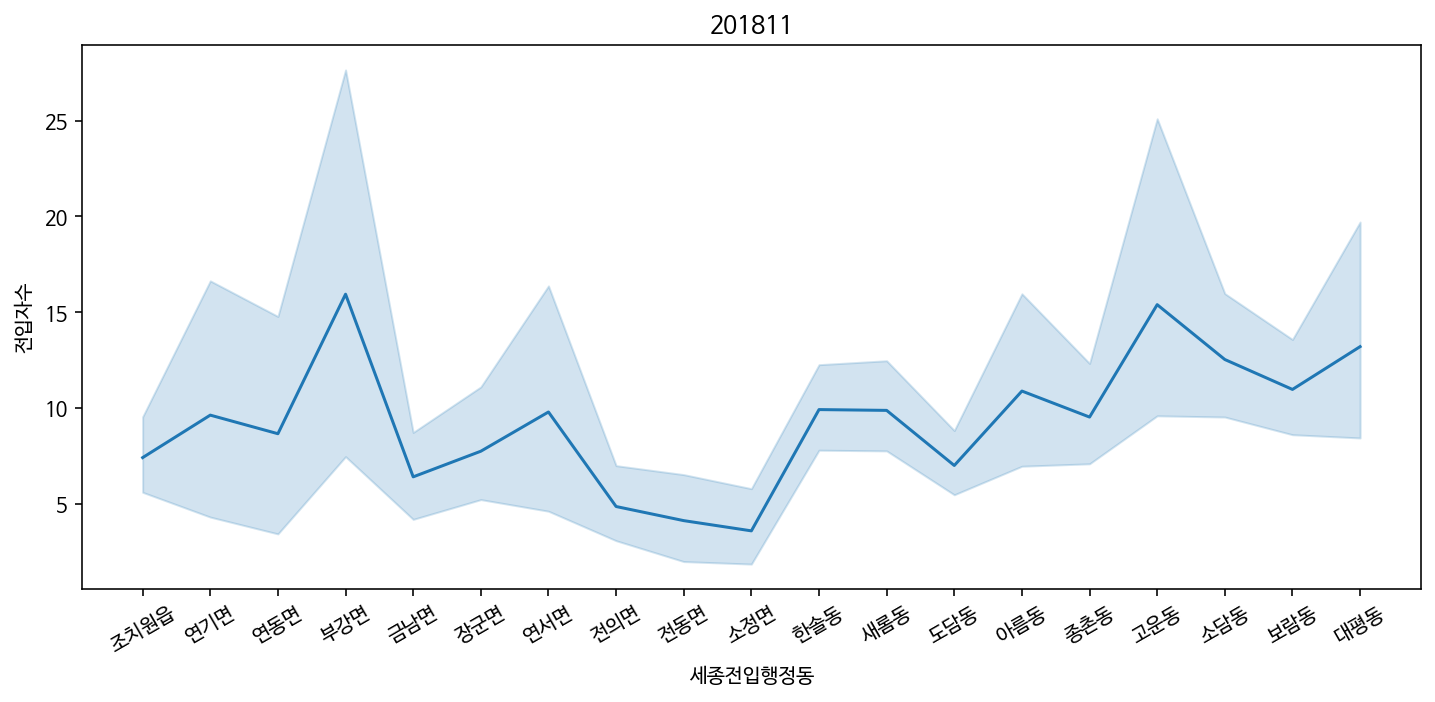

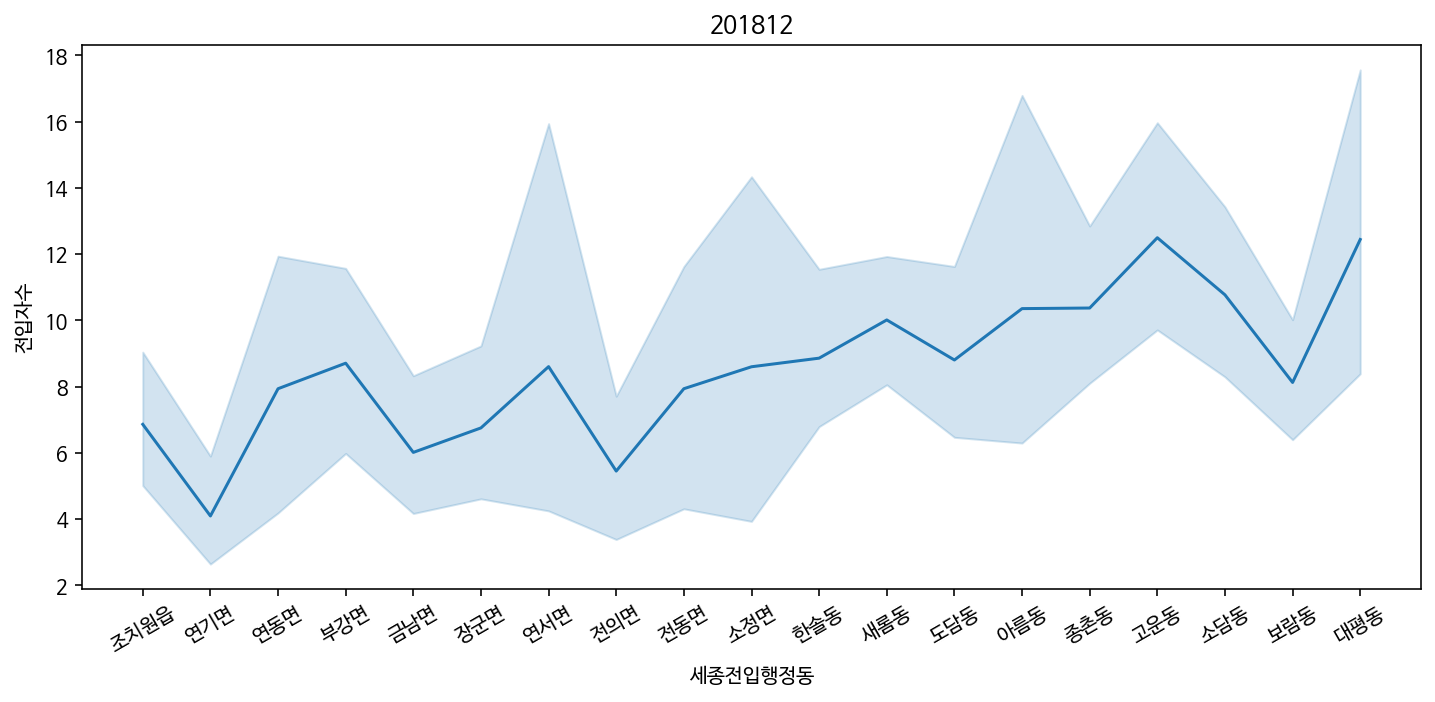

In [ ]:
a = 201801

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=in_a['세종전입행정동'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

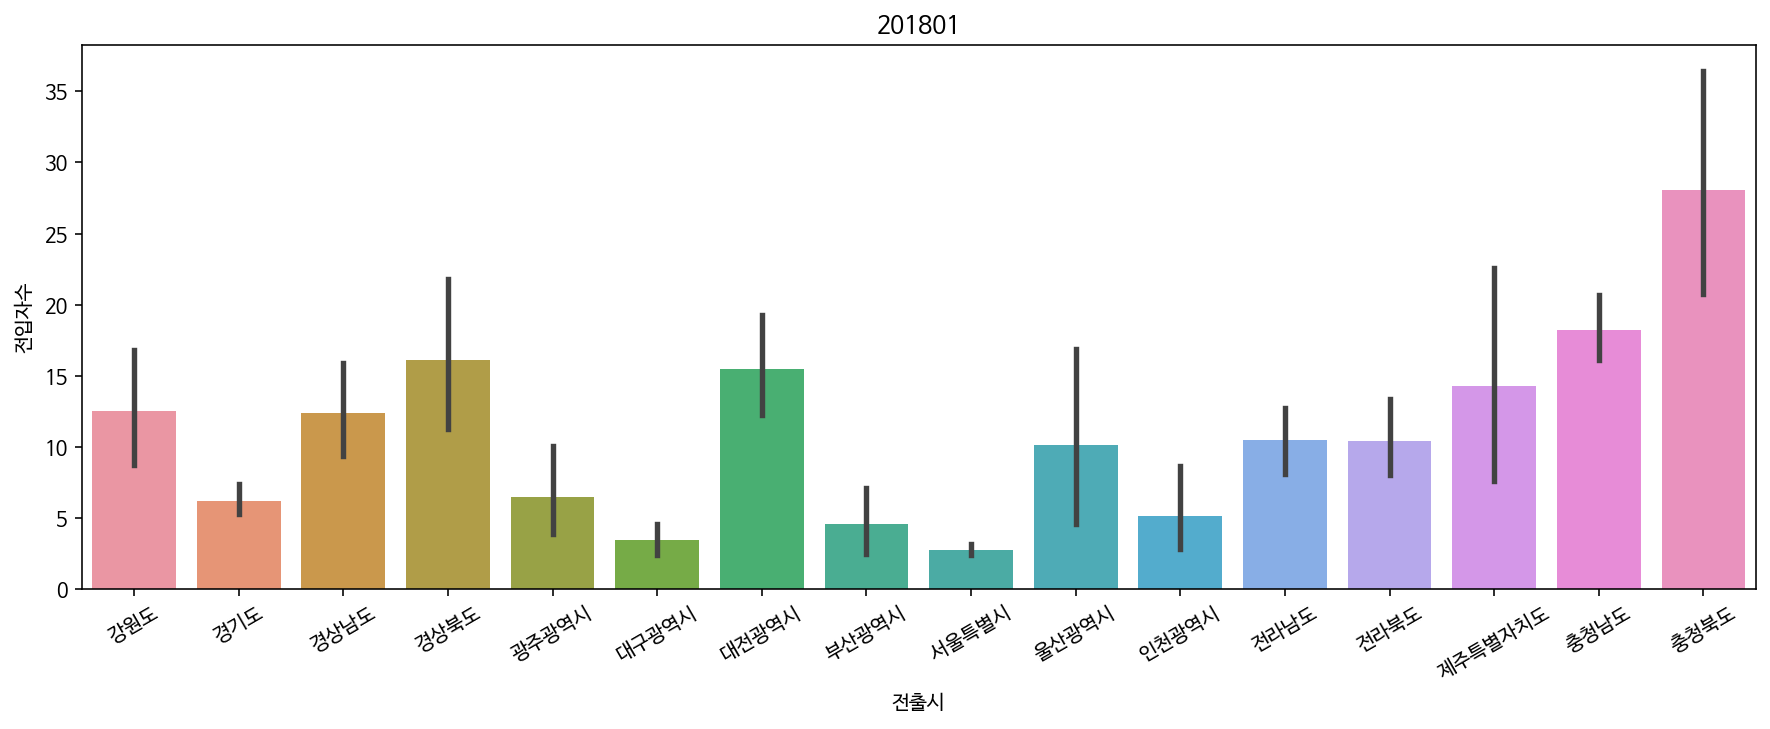

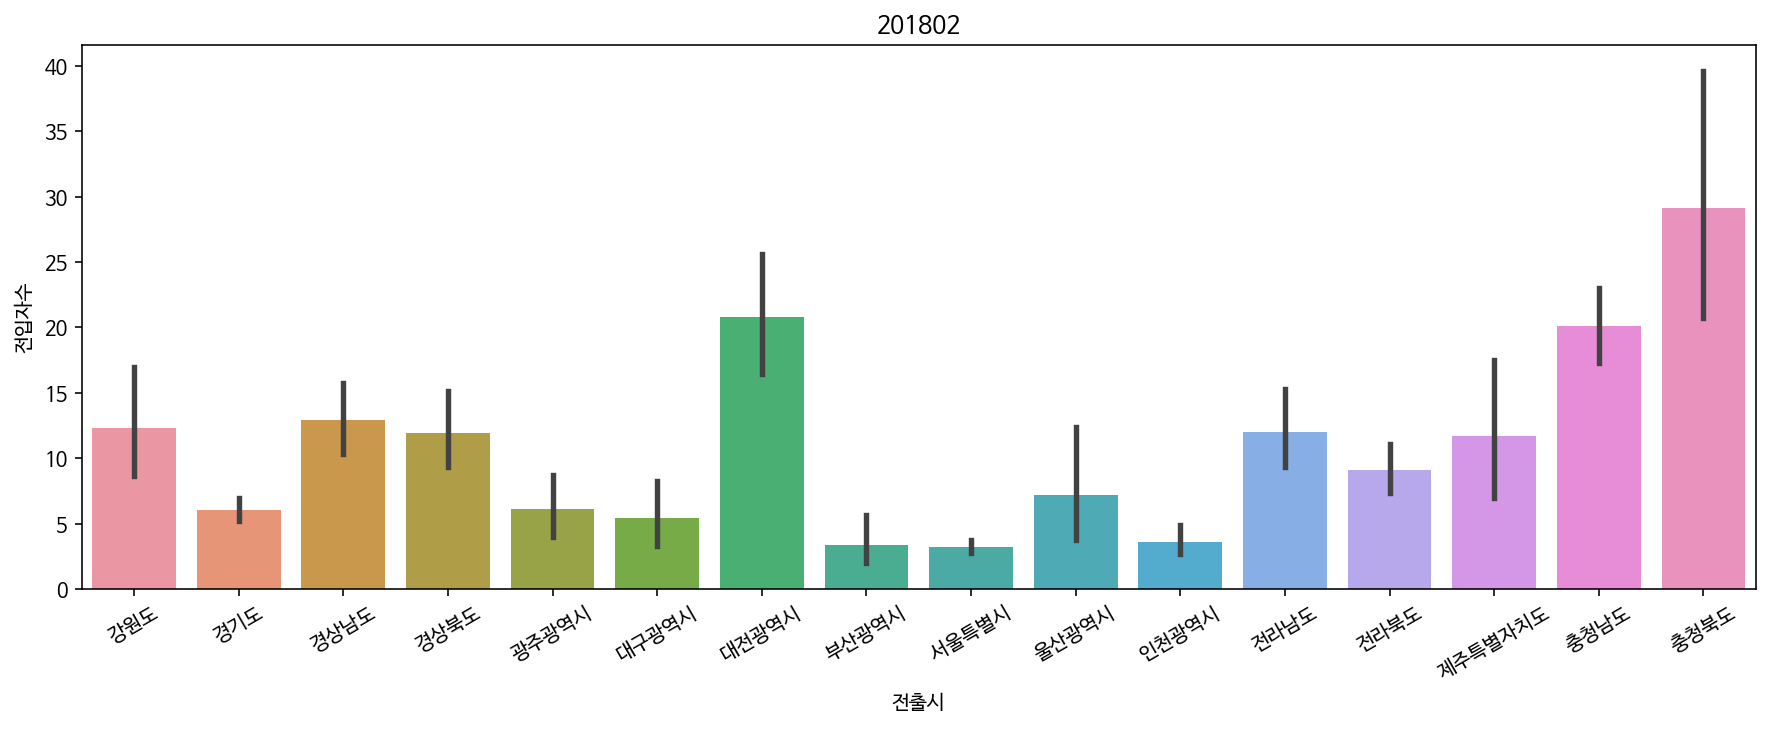

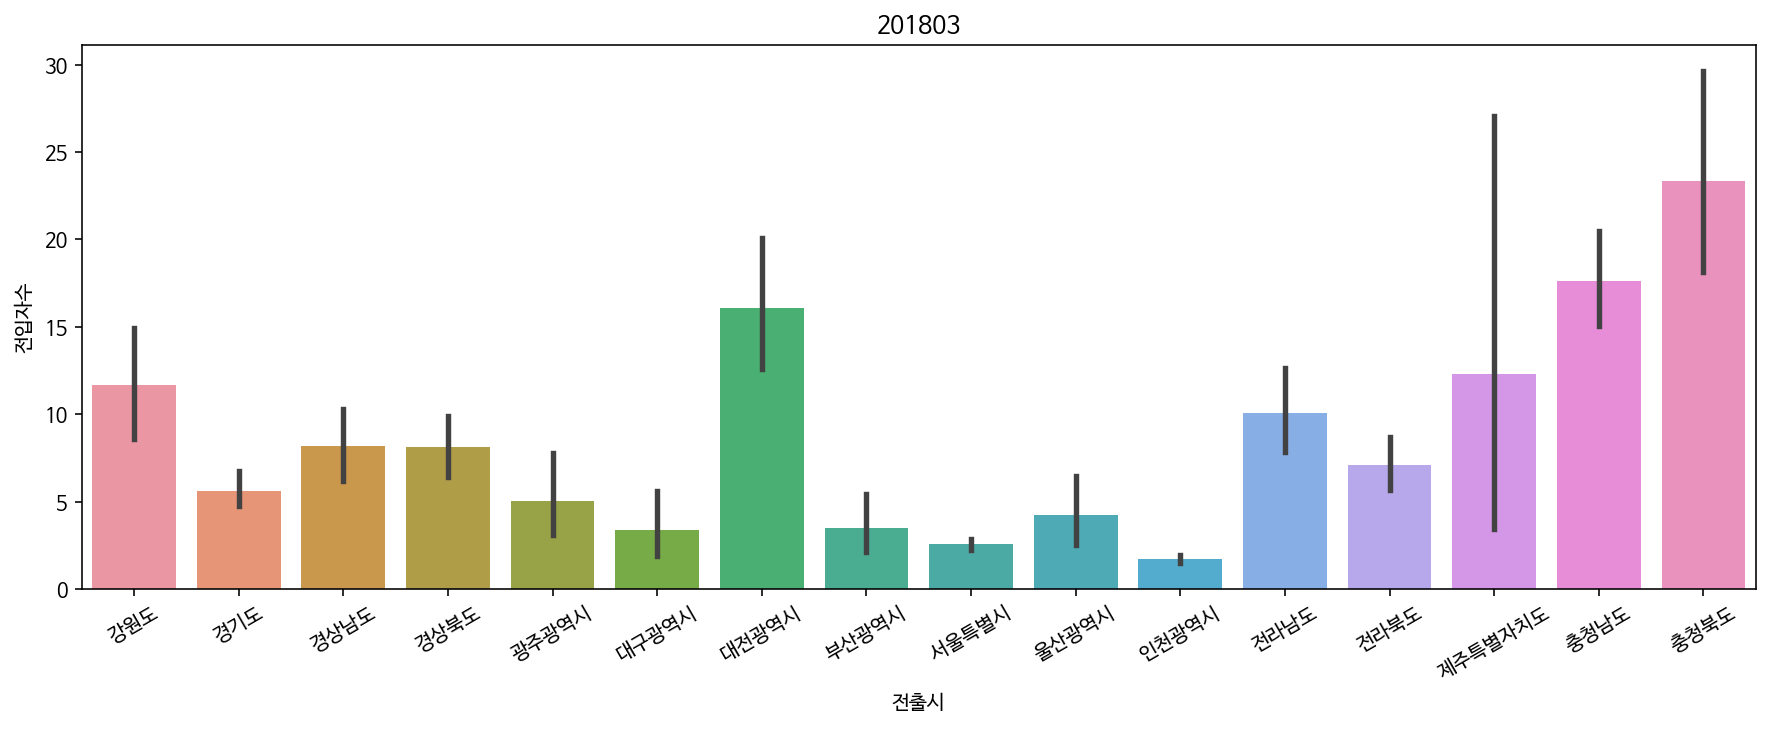

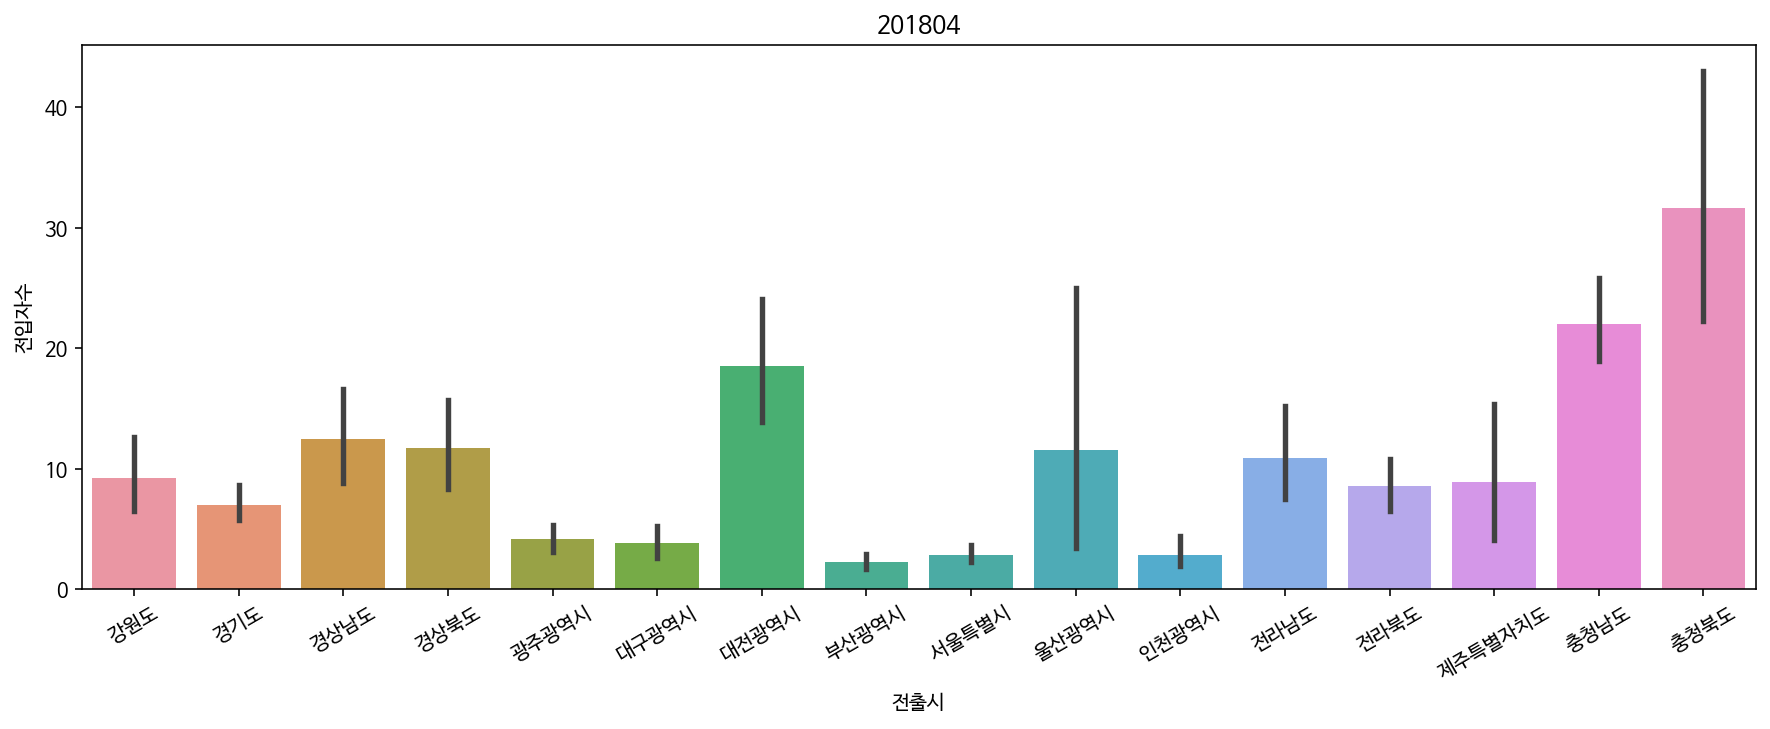

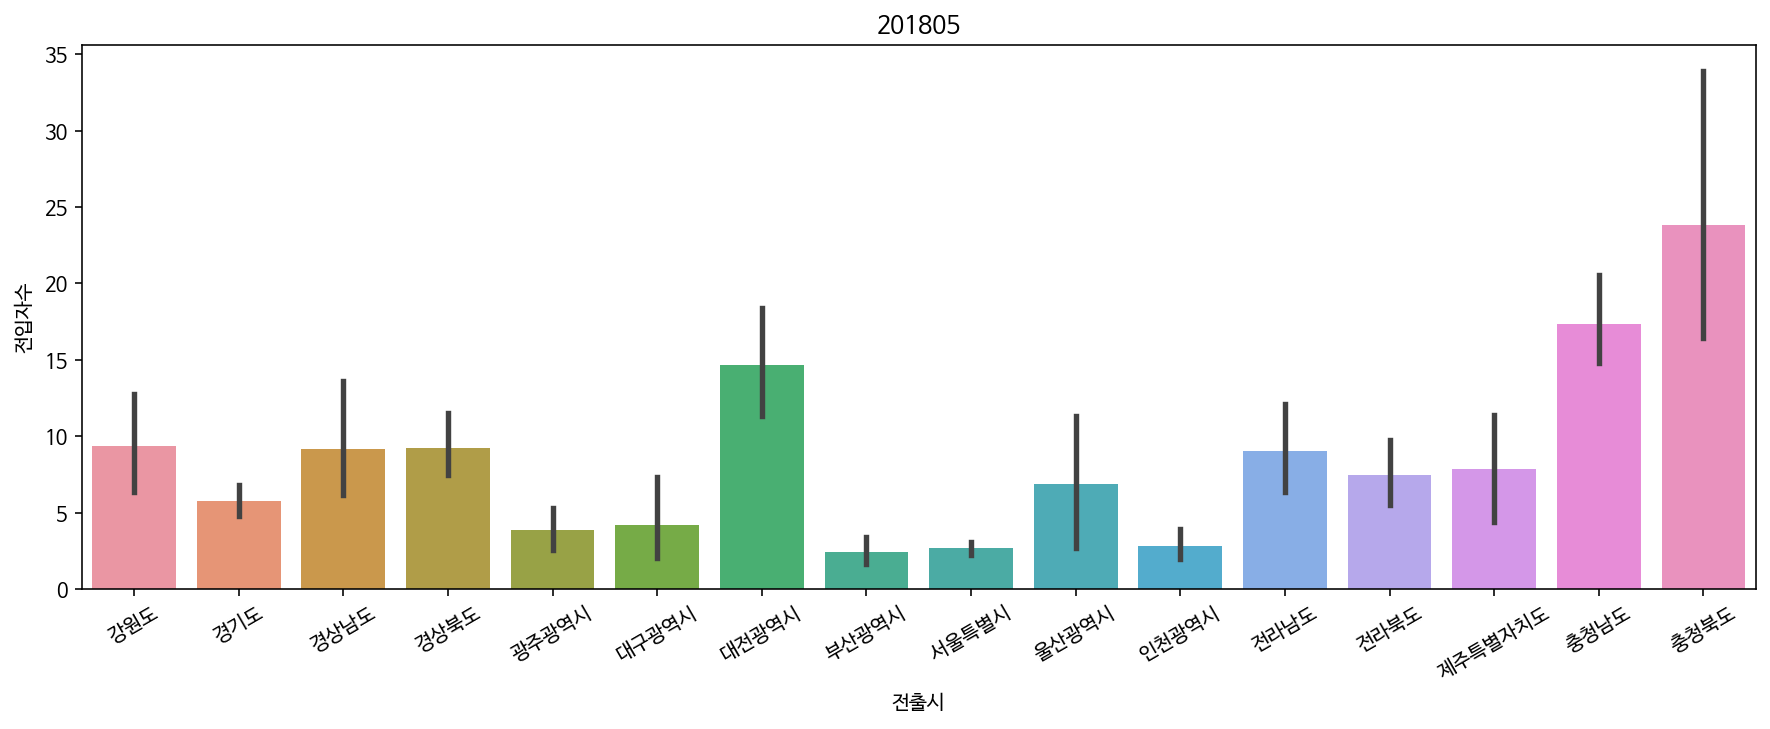

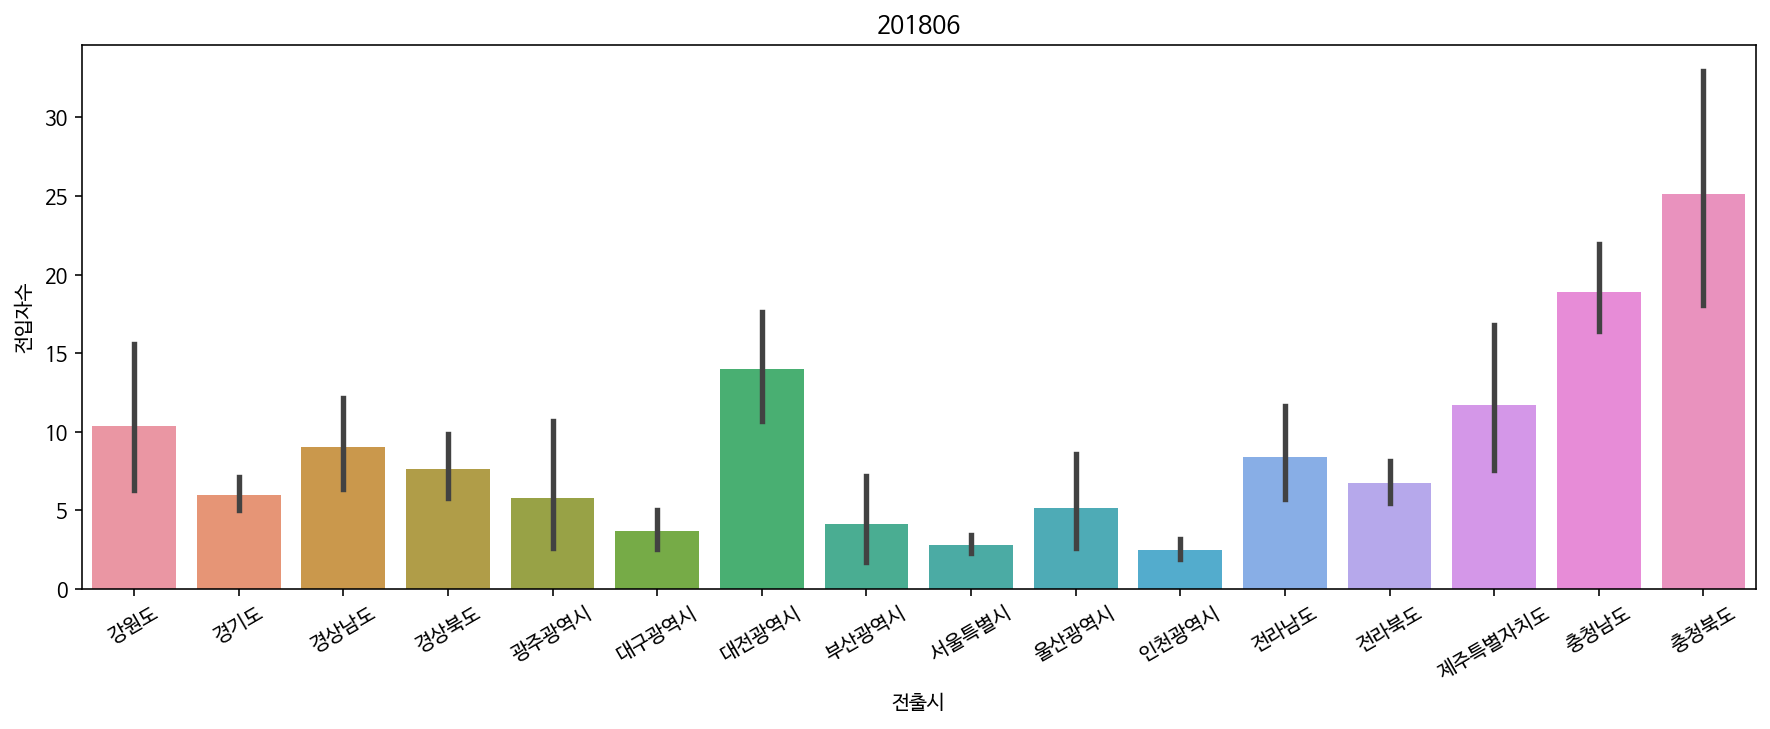

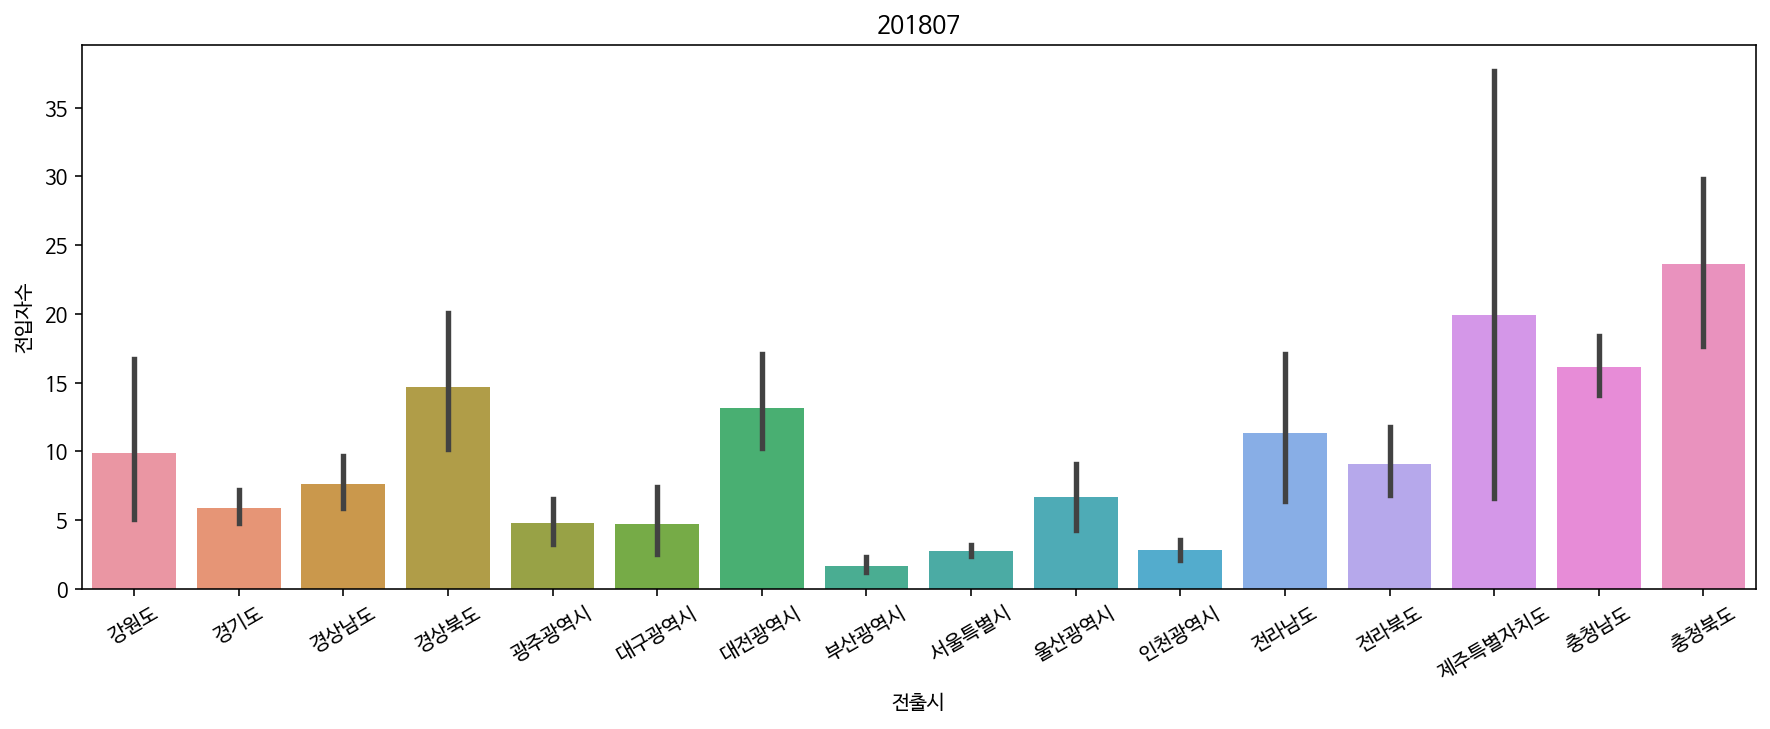

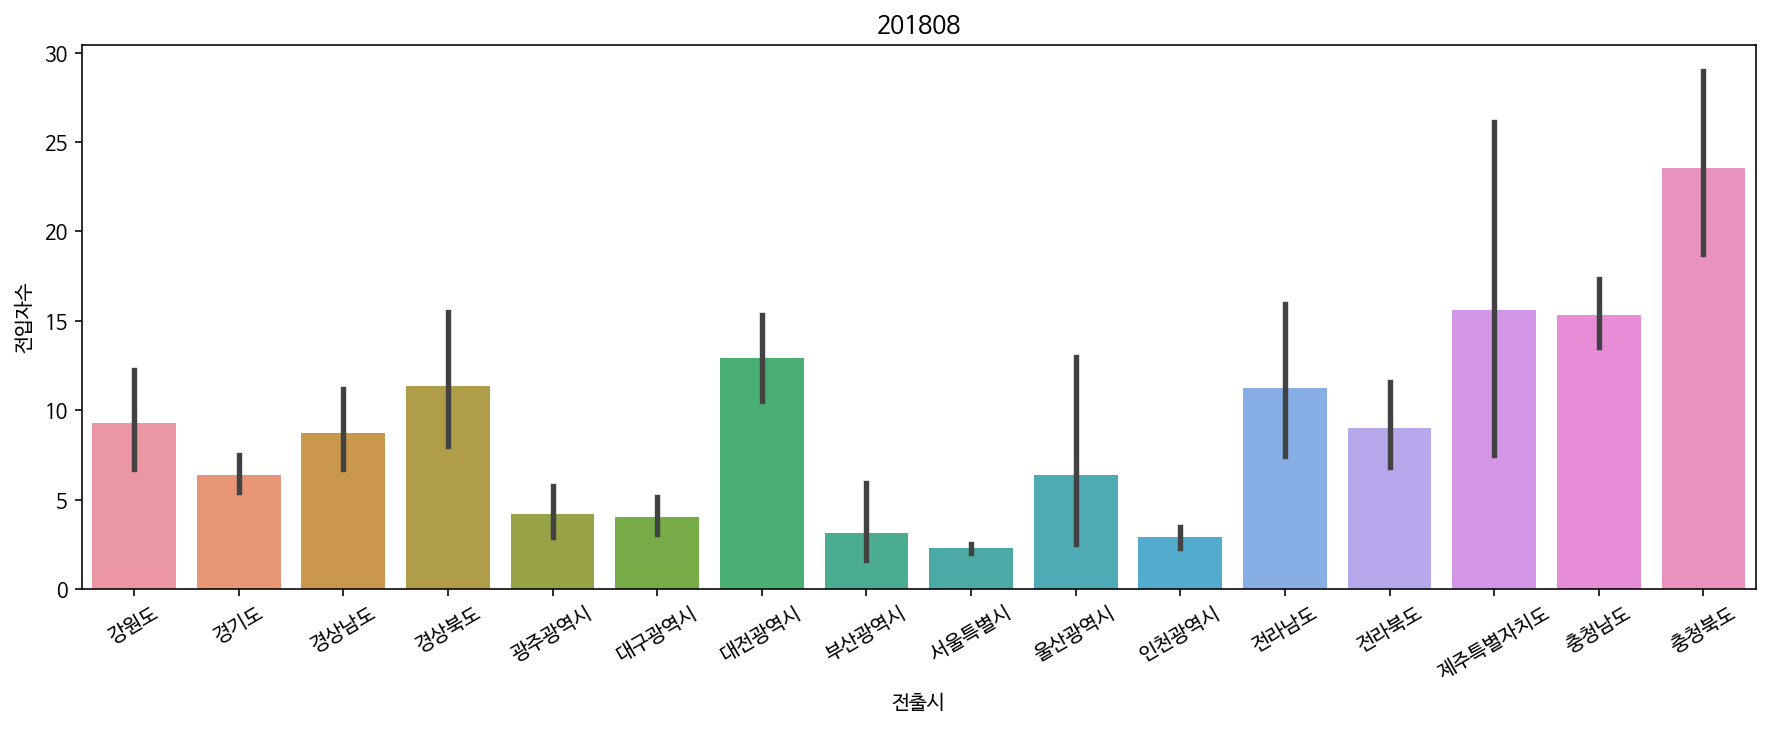

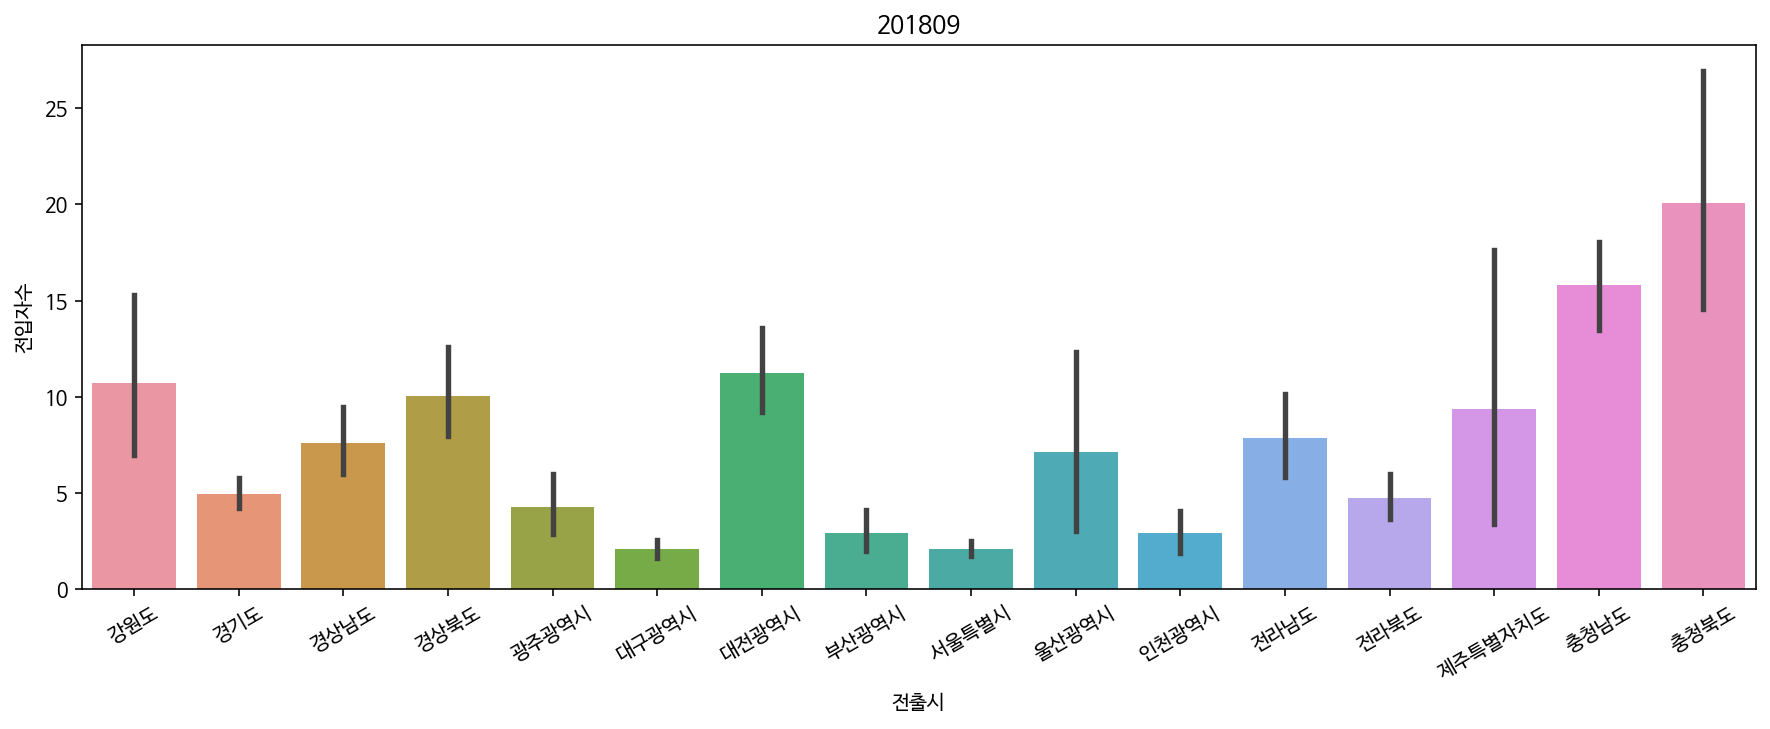

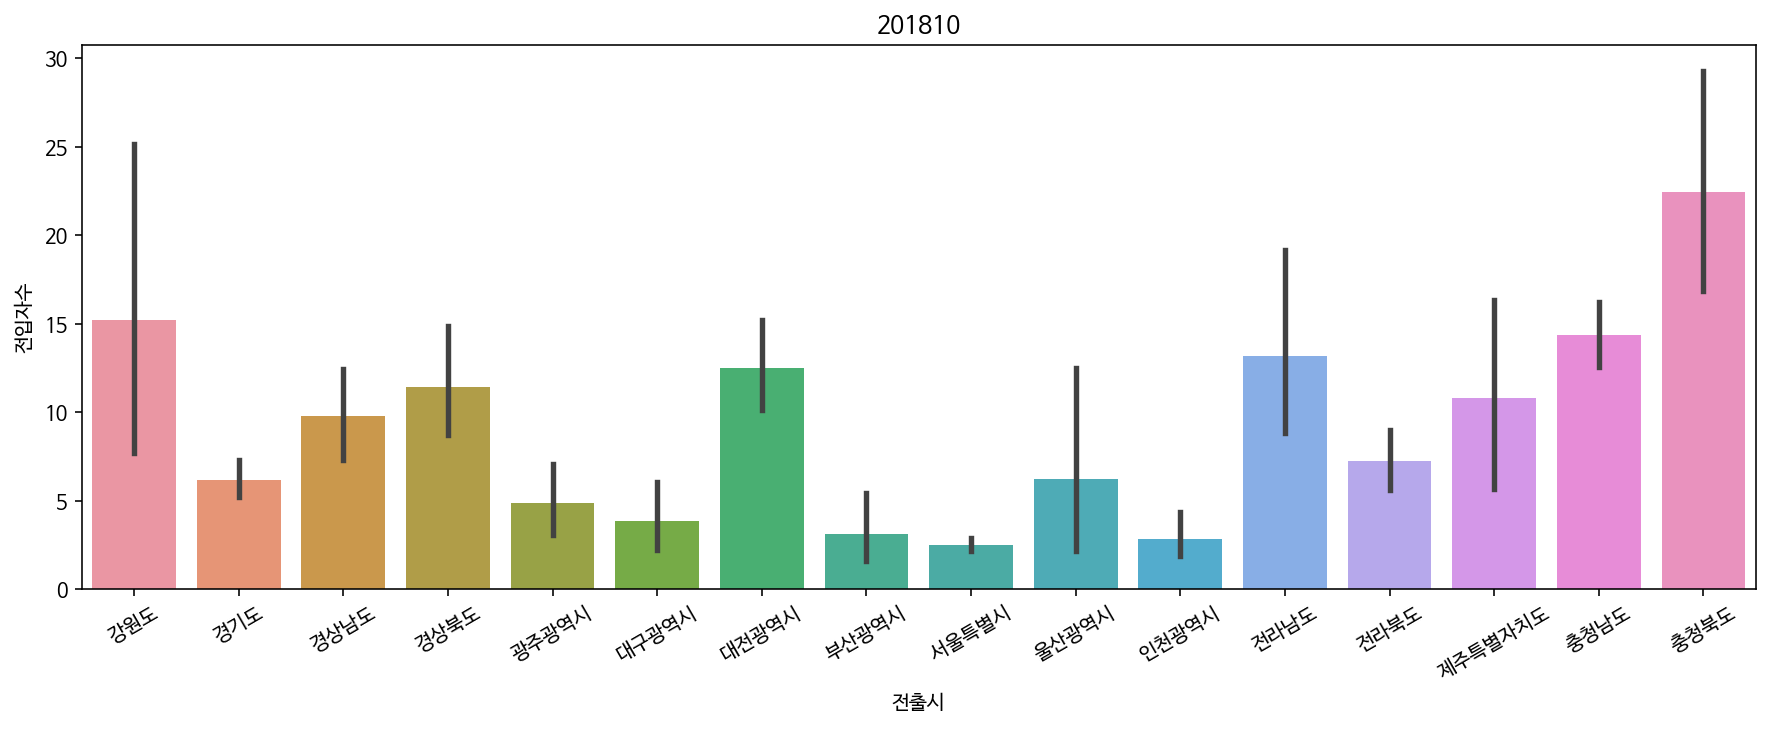

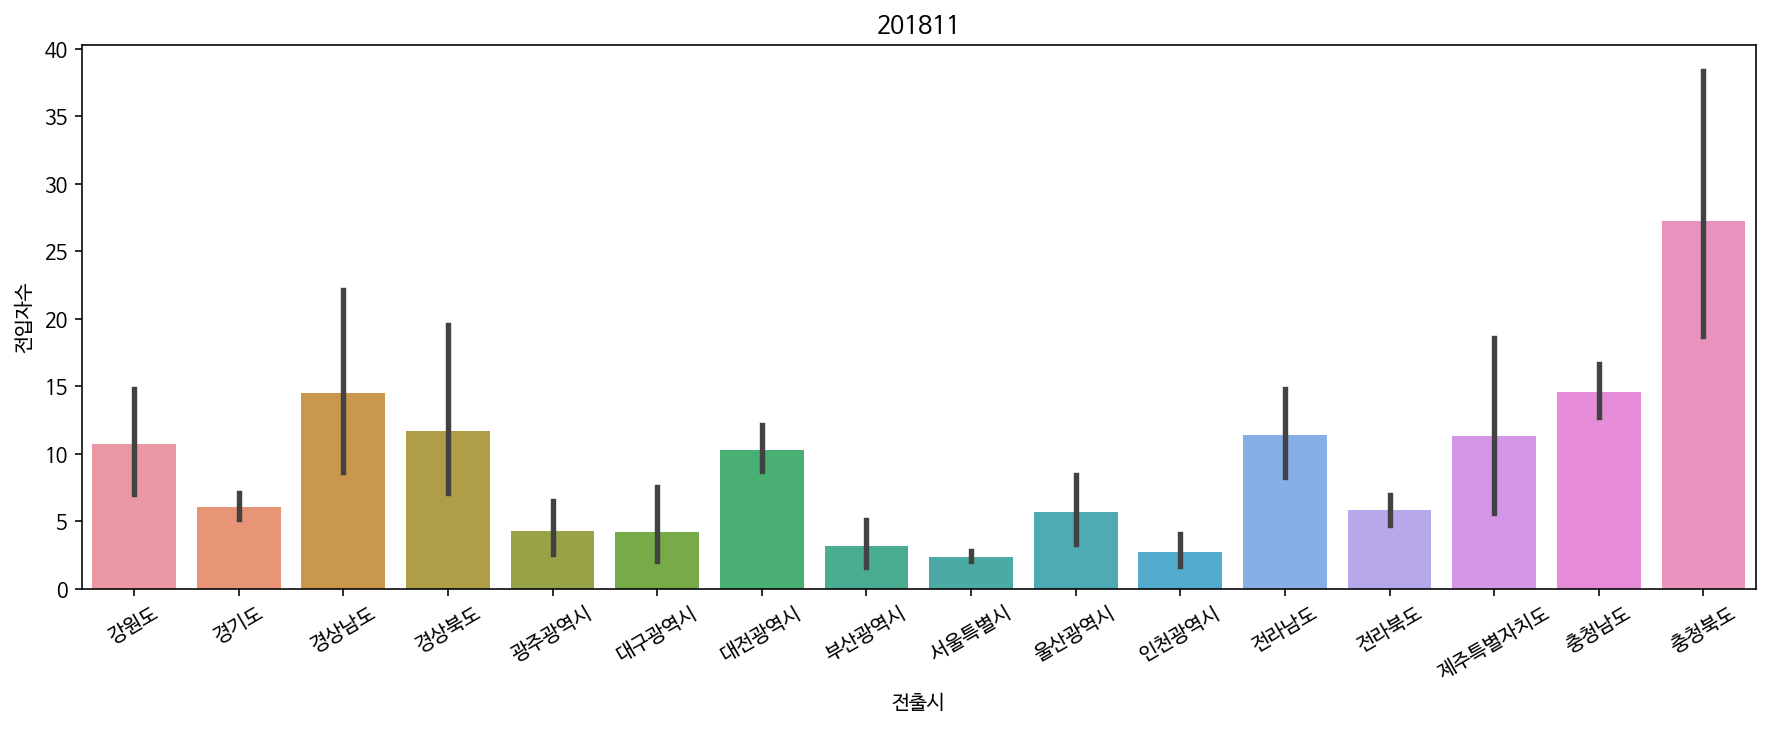

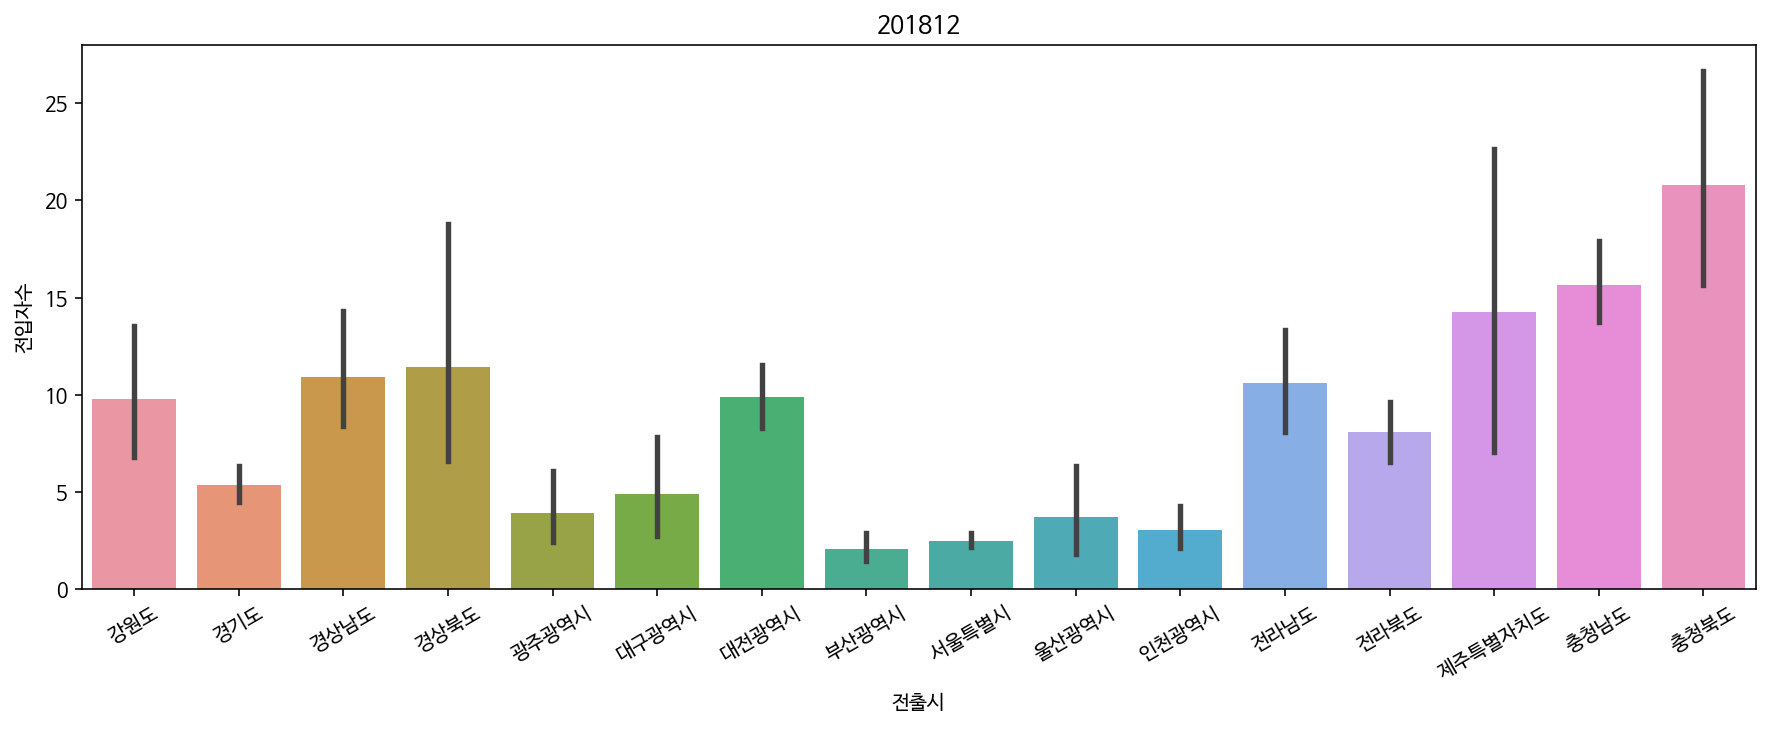

In [ ]:
a = 201801

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=in_a['전출시'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2019년도 전입자 추이

In [ ]:
df_in = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/20.세종시_전입자수.csv', encoding='utf-8')
# 전출지역 세종시 삭제 
mask = df_in['전출시'].isin(['세종특별자치시'])
df_in = df_in[~mask]
df_in

년월  전입자수 세종전입행정동   전출시   전출시군구   전출읍면동
0       201701     1    조치원읍   강원도     강릉시     교1동
1       201701     6    조치원읍   강원도     동해시     천곡동
2       201701    14    조치원읍   강원도     속초시      교동
3       201701    21    조치원읍   강원도     양양군      서면
4       201701     2    조치원읍   강원도     원주시     원인동
...        ...   ...     ...   ...     ...     ...
108077  202101     3     다정동  충청북도  청주시흥덕구    복대1동
108078  202101    56     다정동  충청북도  청주시흥덕구     오송읍
108079  202101    32     다정동  충청북도  청주시흥덕구     옥산면
108080  202101     8     다정동  충청북도     충주시  교현·안림동
108081  202101     9     다정동  충청북도     충주시    중앙탑면

[98249 rows x 6 columns]

In [ ]:
a = 201901

for i in range(1, 13):
    df_in_a = df_in['년월']==a
    df_in[a] = df_in_a
    a += 1
print(df_in)

            년월  전입자수 세종전입행정동   전출시  ... 201909 201910  201911  201912
0       201701     1    조치원읍   강원도  ...  False  False   False   False
1       201701     6    조치원읍   강원도  ...  False  False   False   False
2       201701    14    조치원읍   강원도  ...  False  False   False   False
3       201701    21    조치원읍   강원도  ...  False  False   False   False
4       201701     2    조치원읍   강원도  ...  False  False   False   False
...        ...   ...     ...   ...  ...    ...    ...     ...     ...
108077  202101     3     다정동  충청북도  ...  False  False   False   False
108078  202101    56     다정동  충청북도  ...  False  False   False   False
108079  202101    32     다정동  충청북도  ...  False  False   False   False
108080  202101     8     다정동  충청북도  ...  False  False   False   False
108081  202101     9     다정동  충청북도  ...  False  False   False   False

[98249 rows x 18 columns]


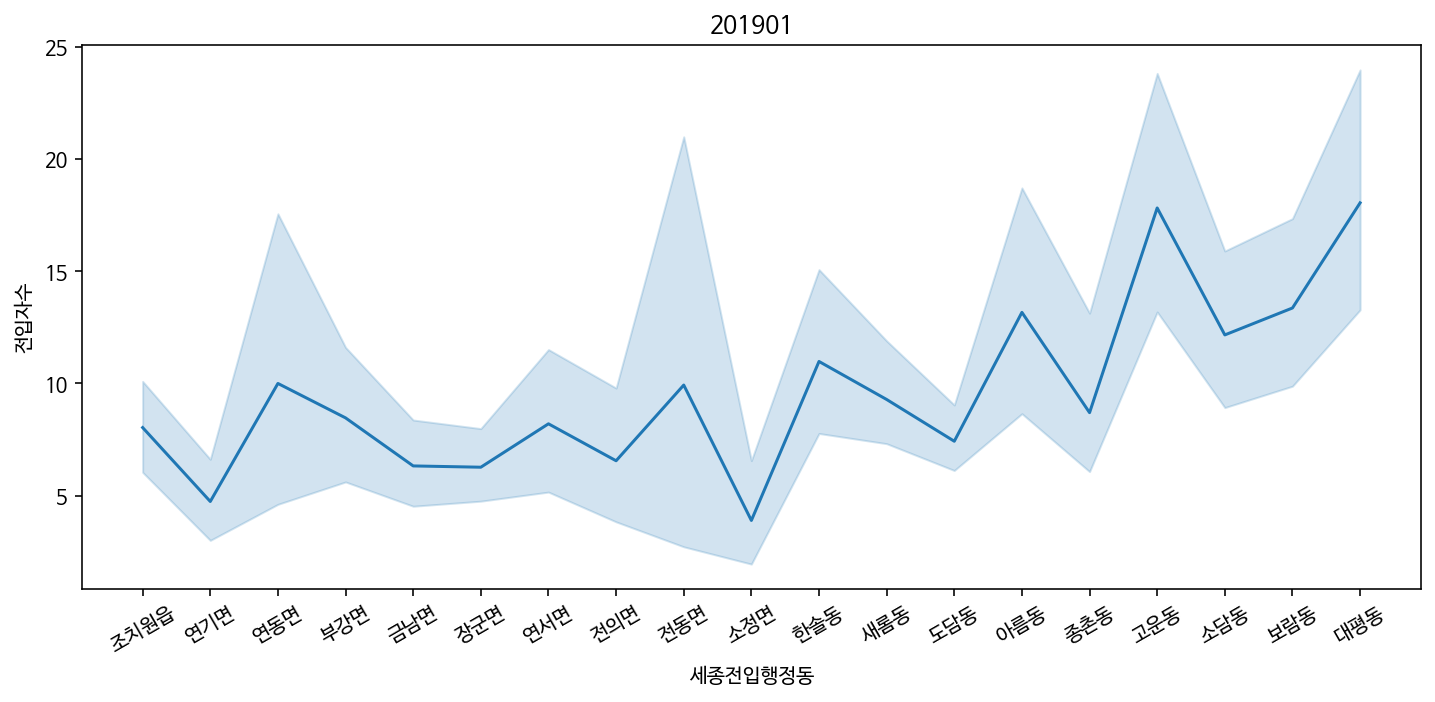

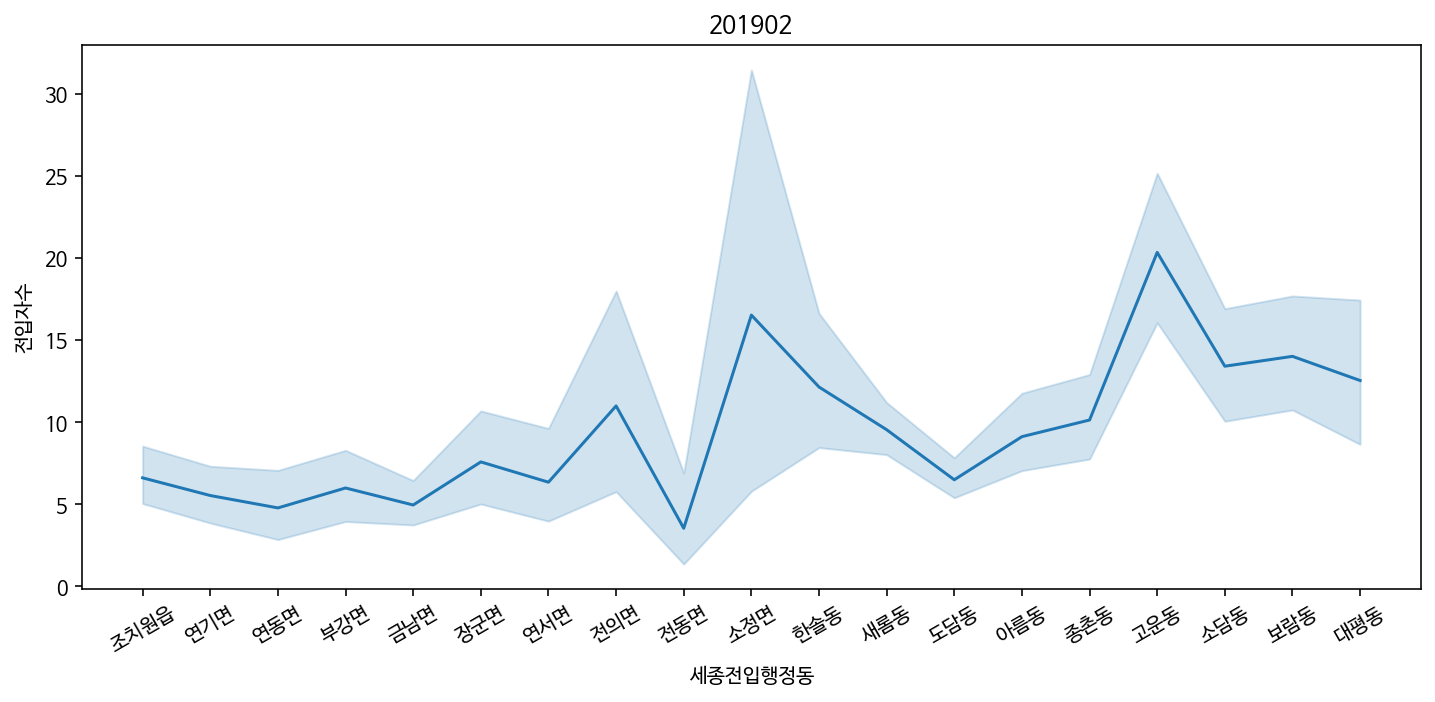

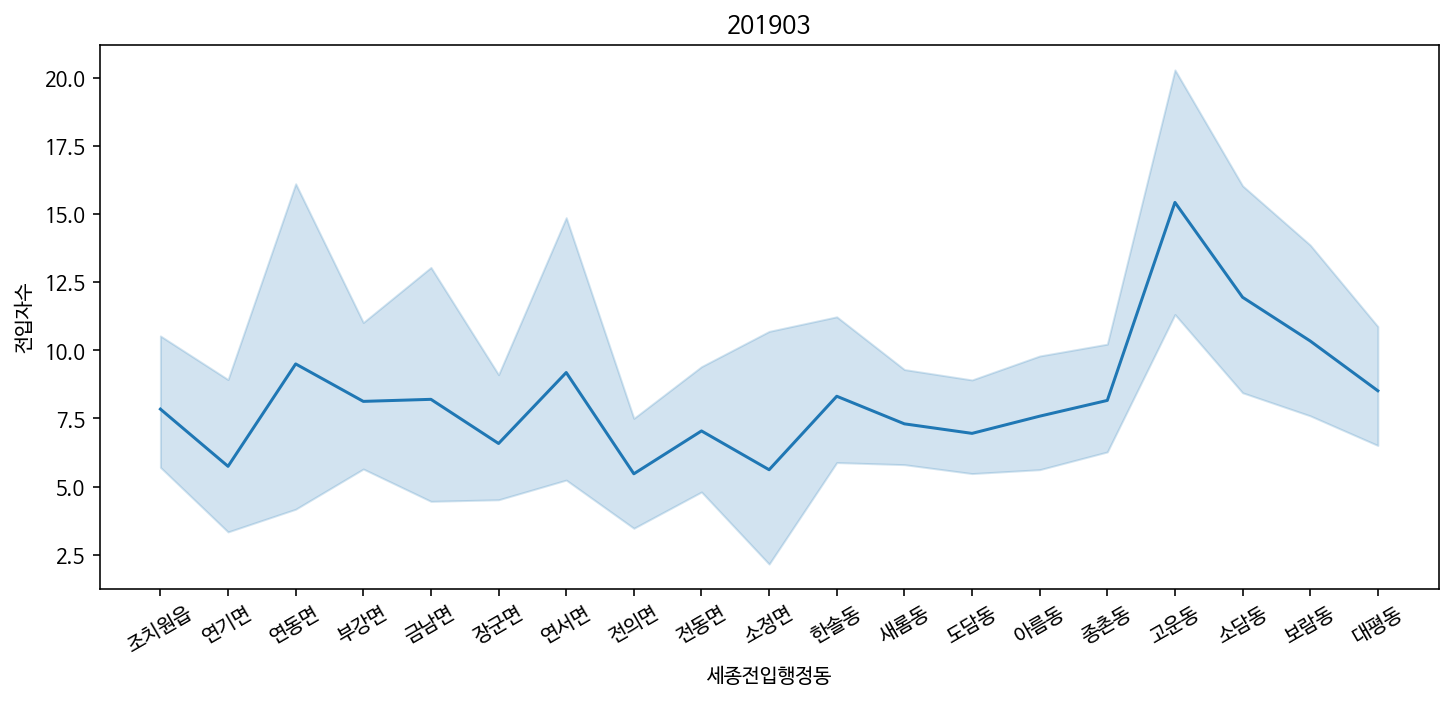

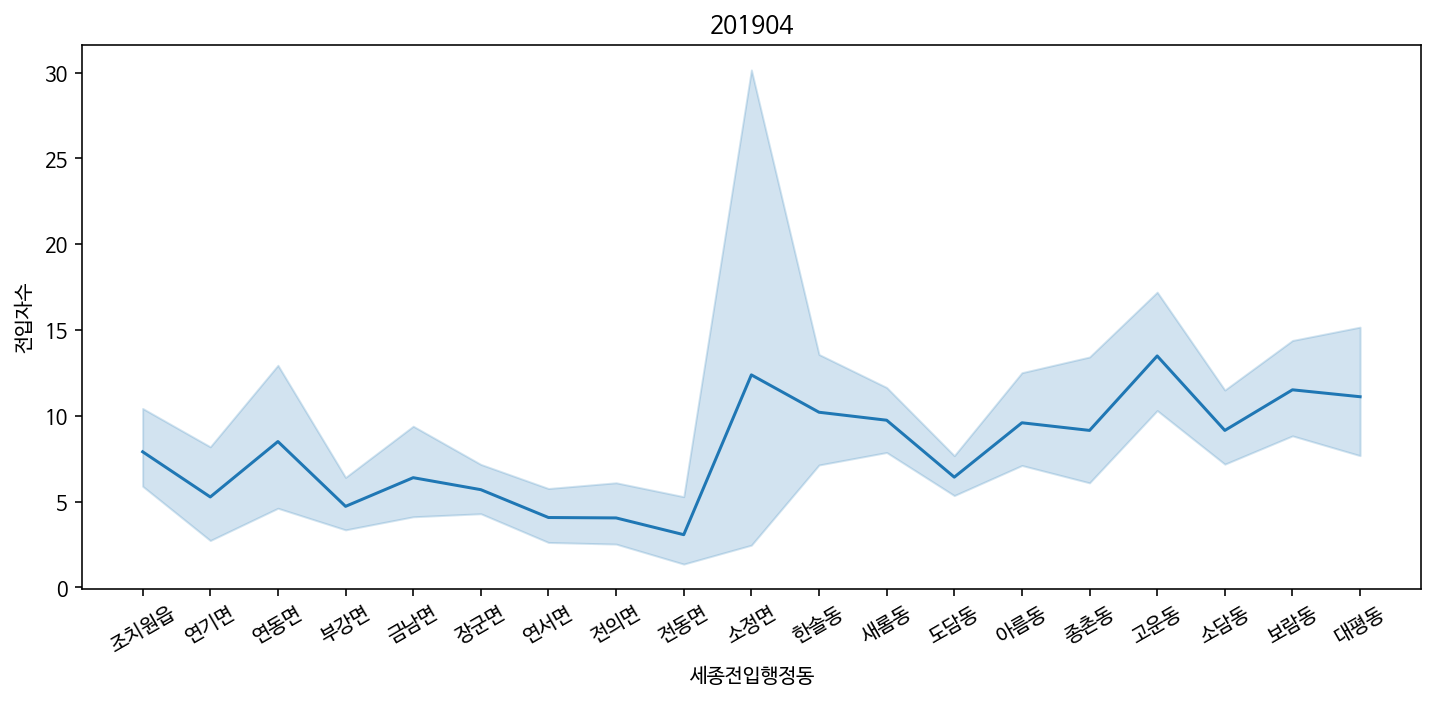

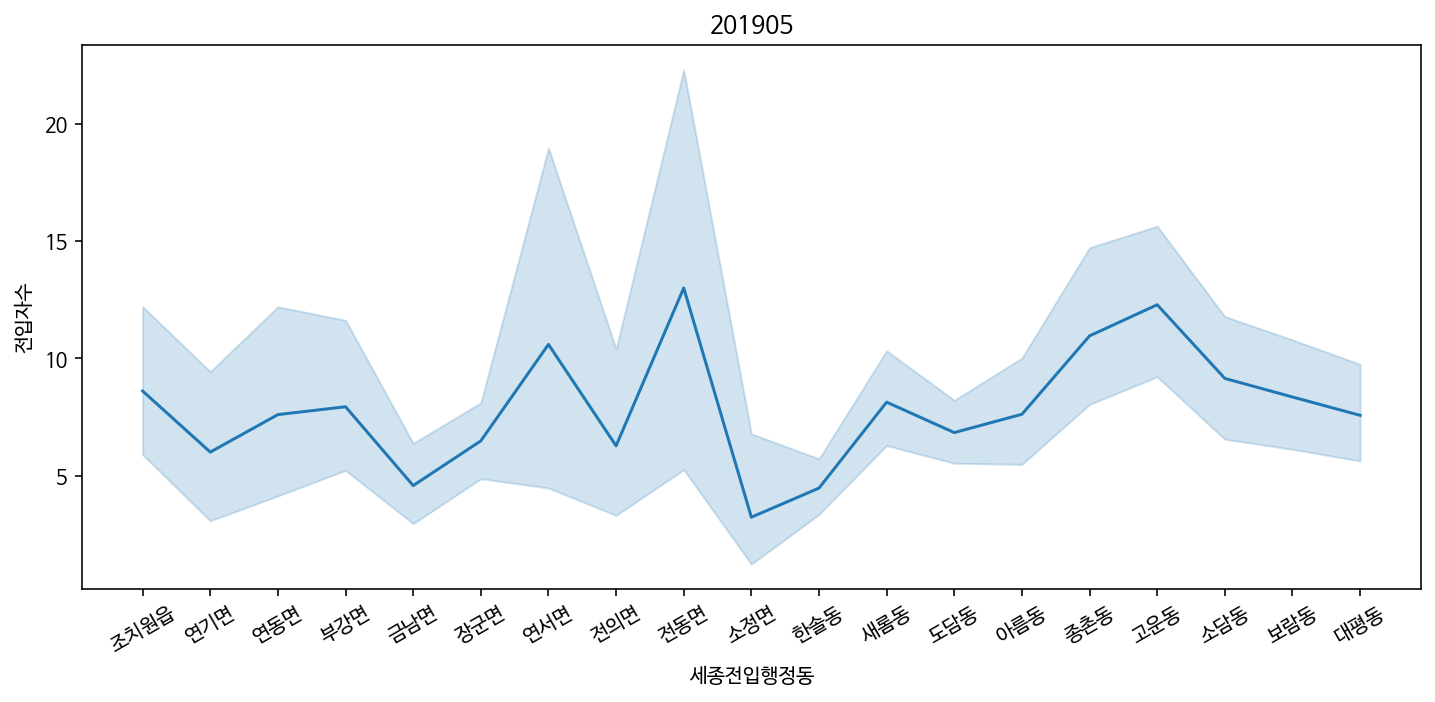

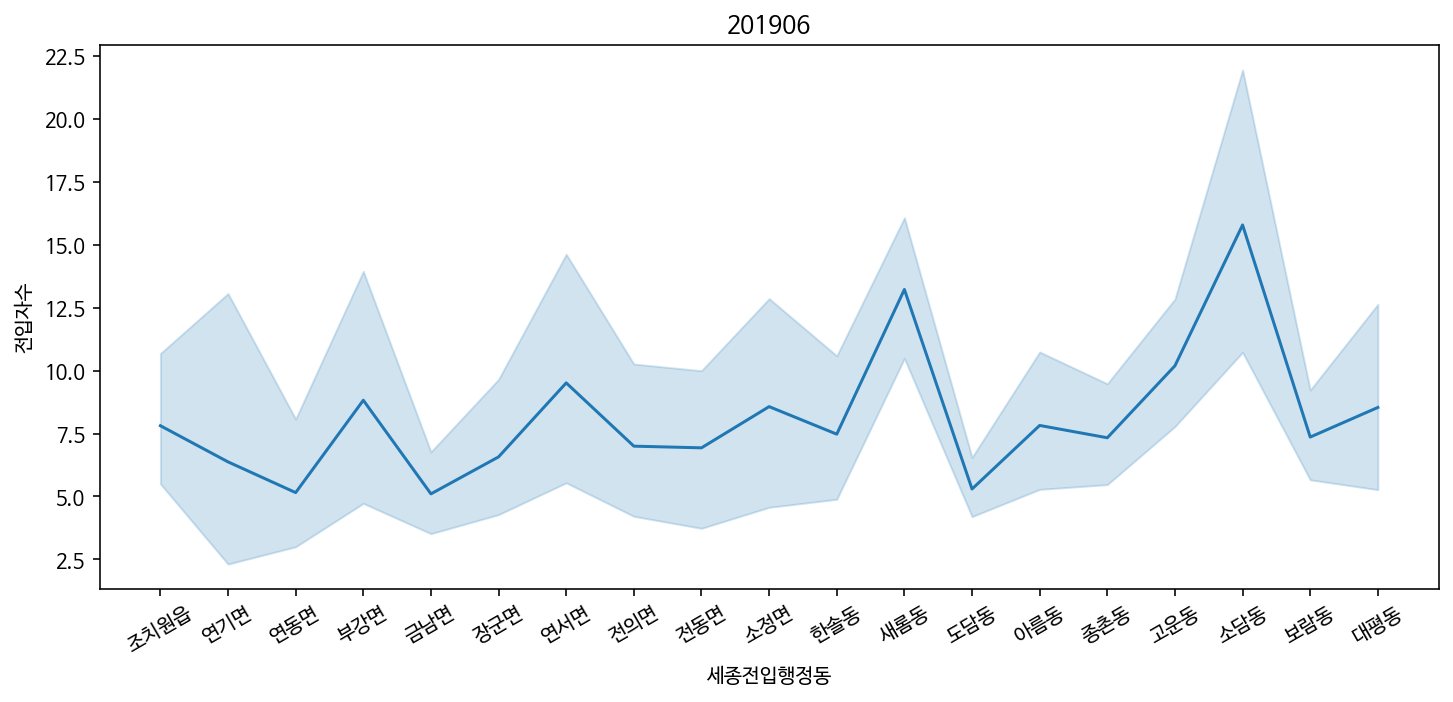

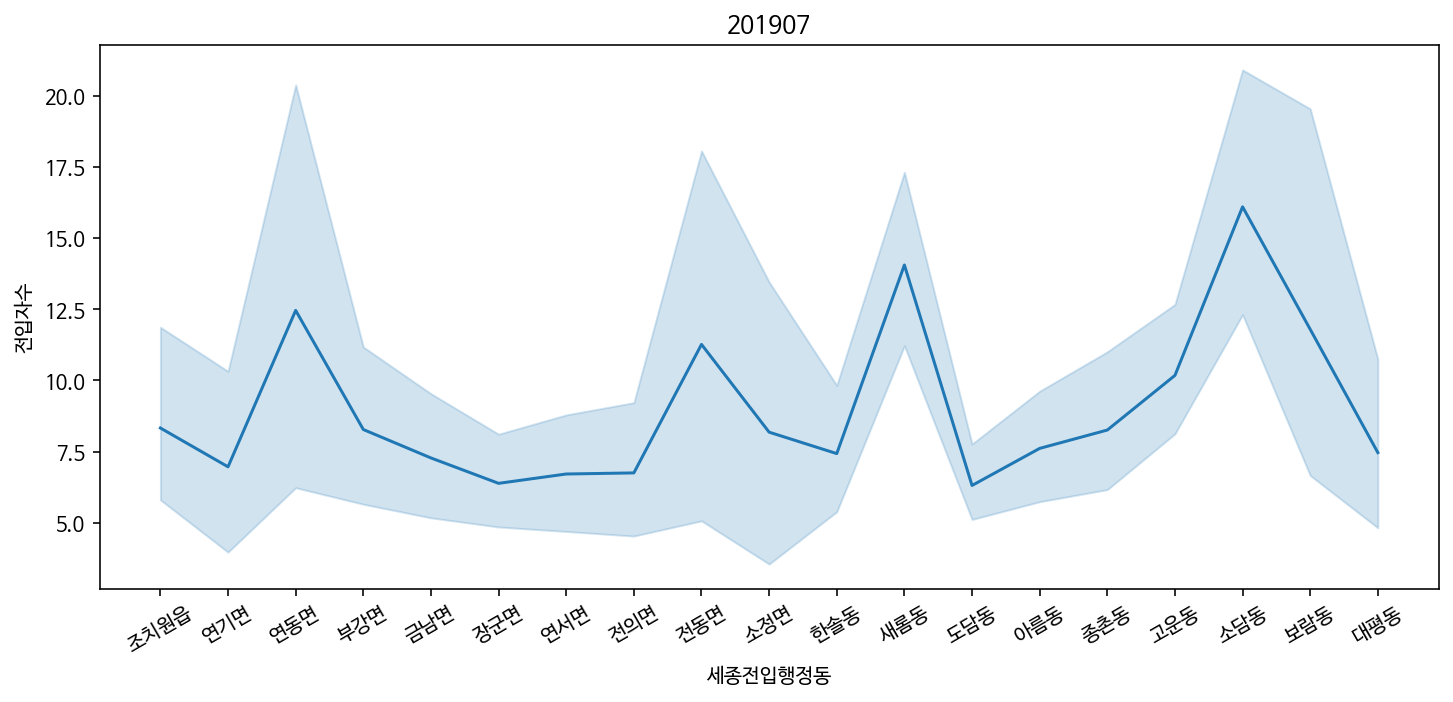

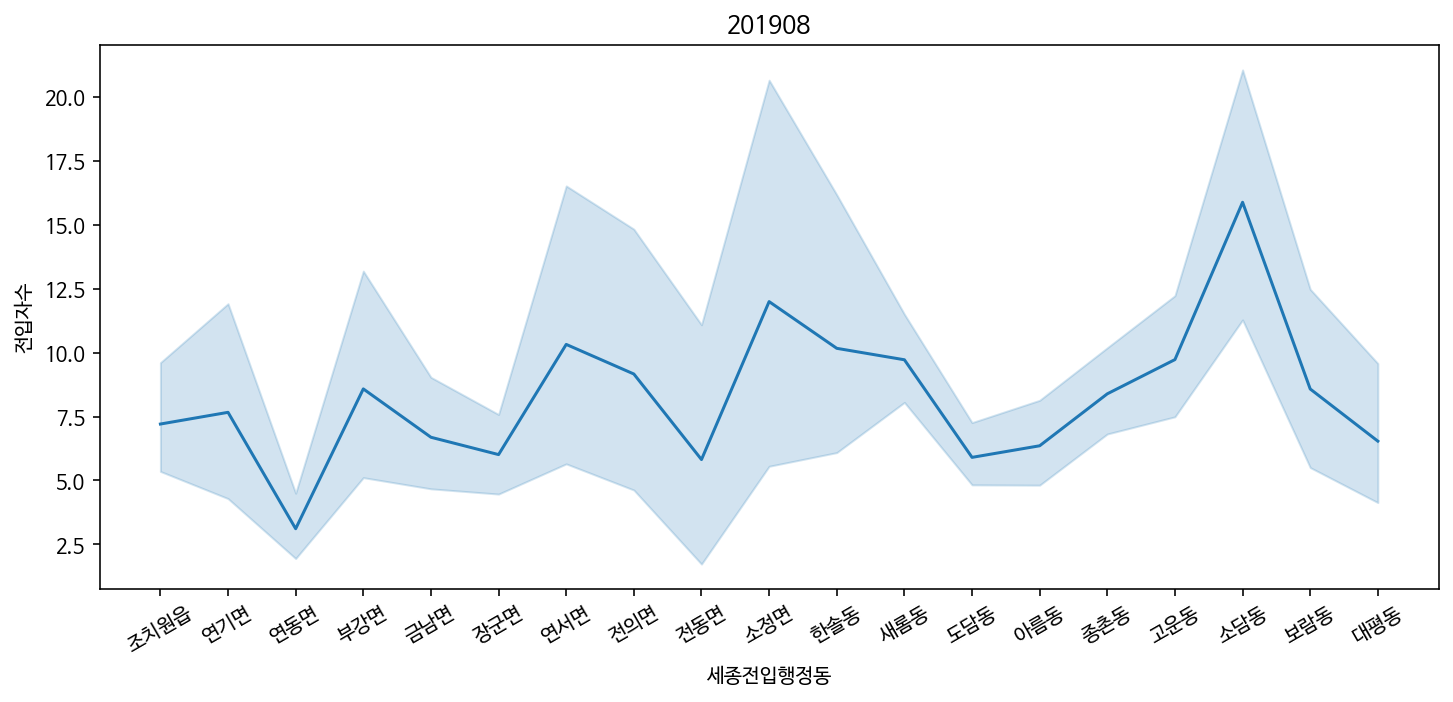

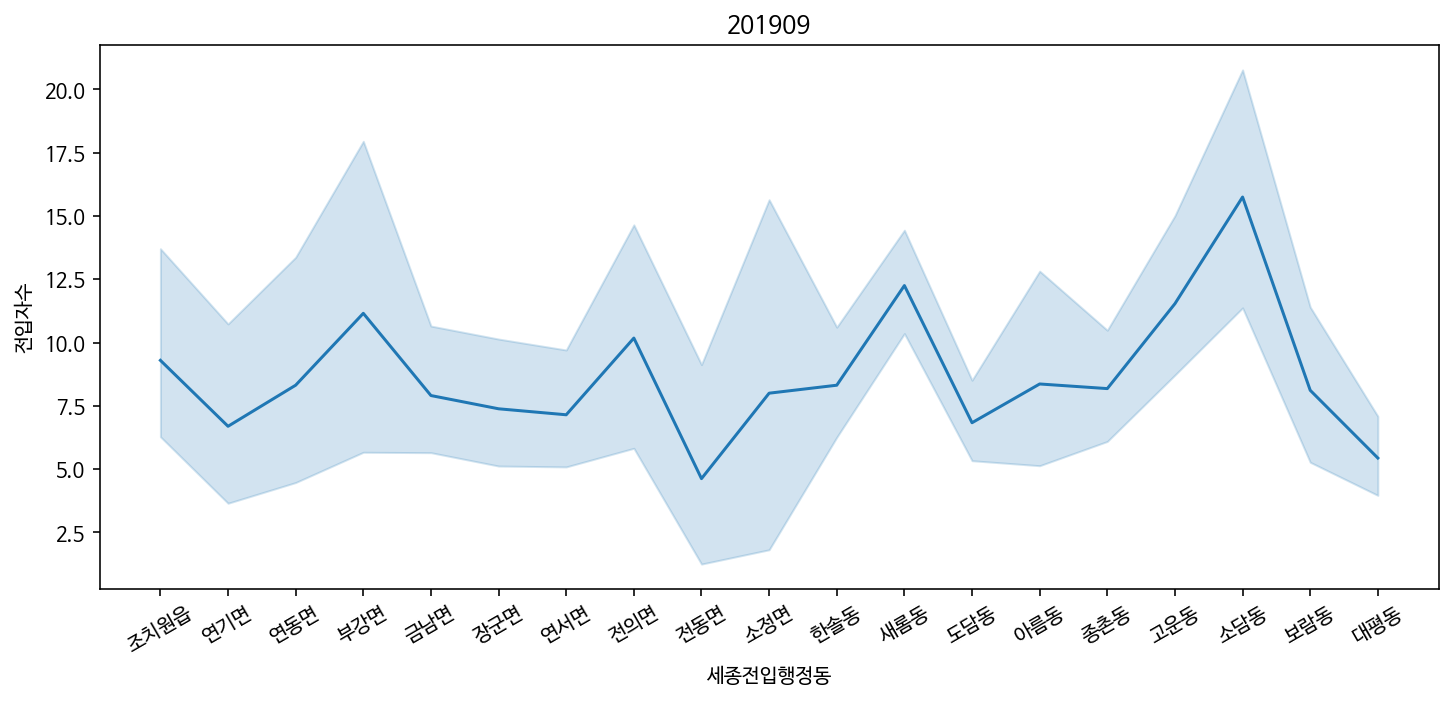

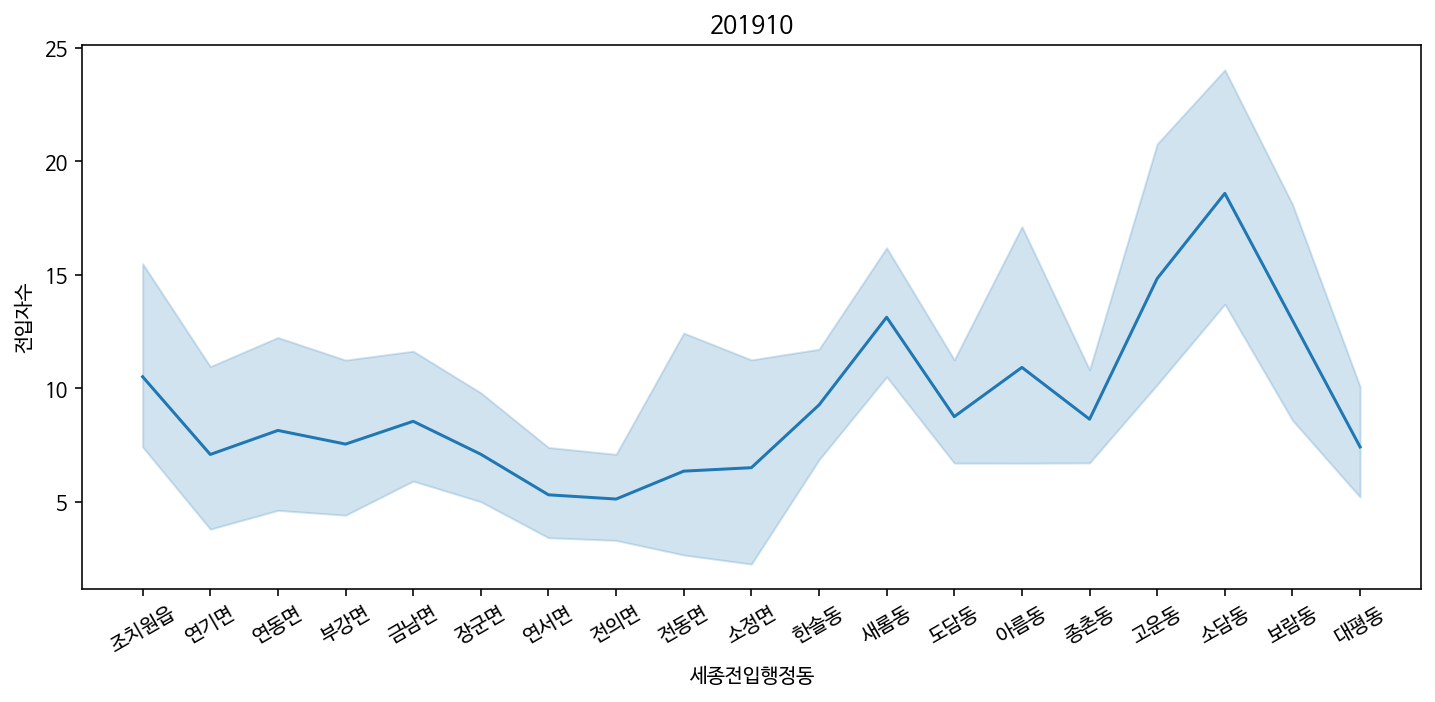

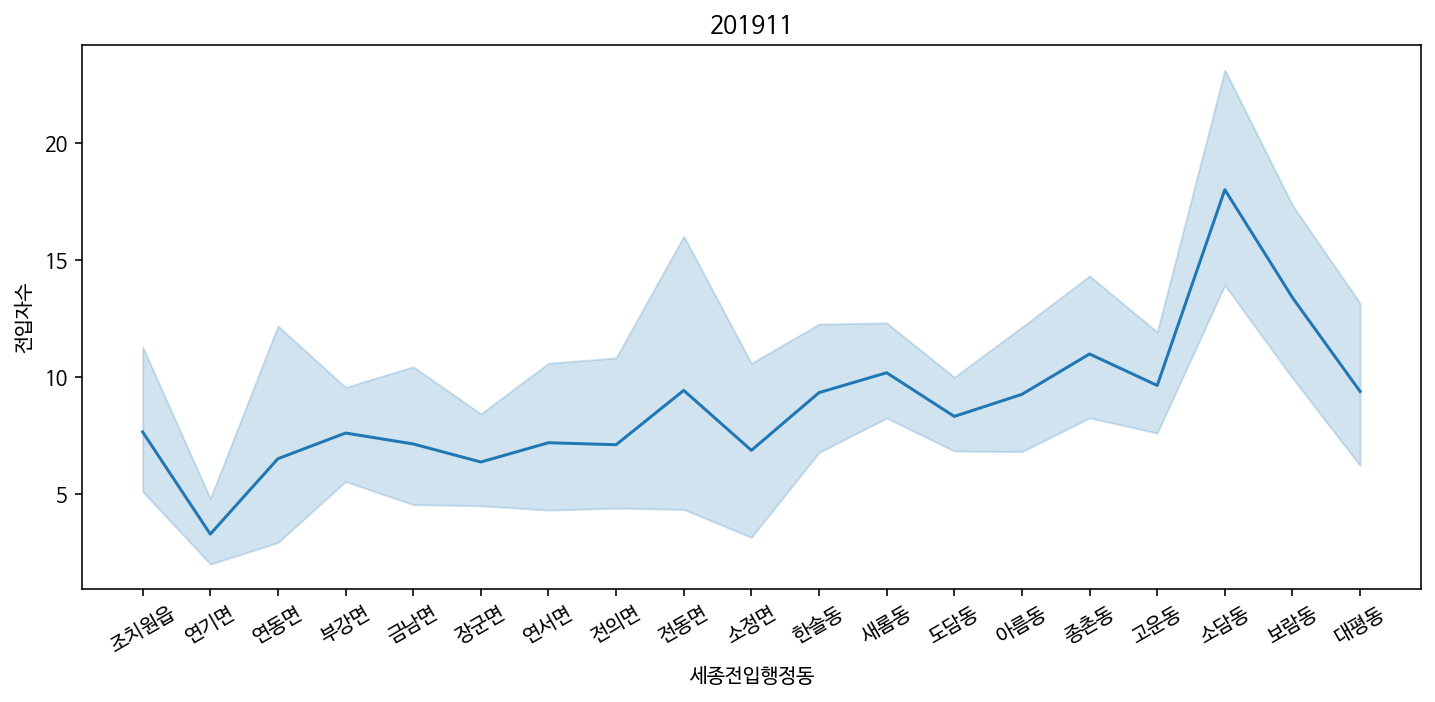

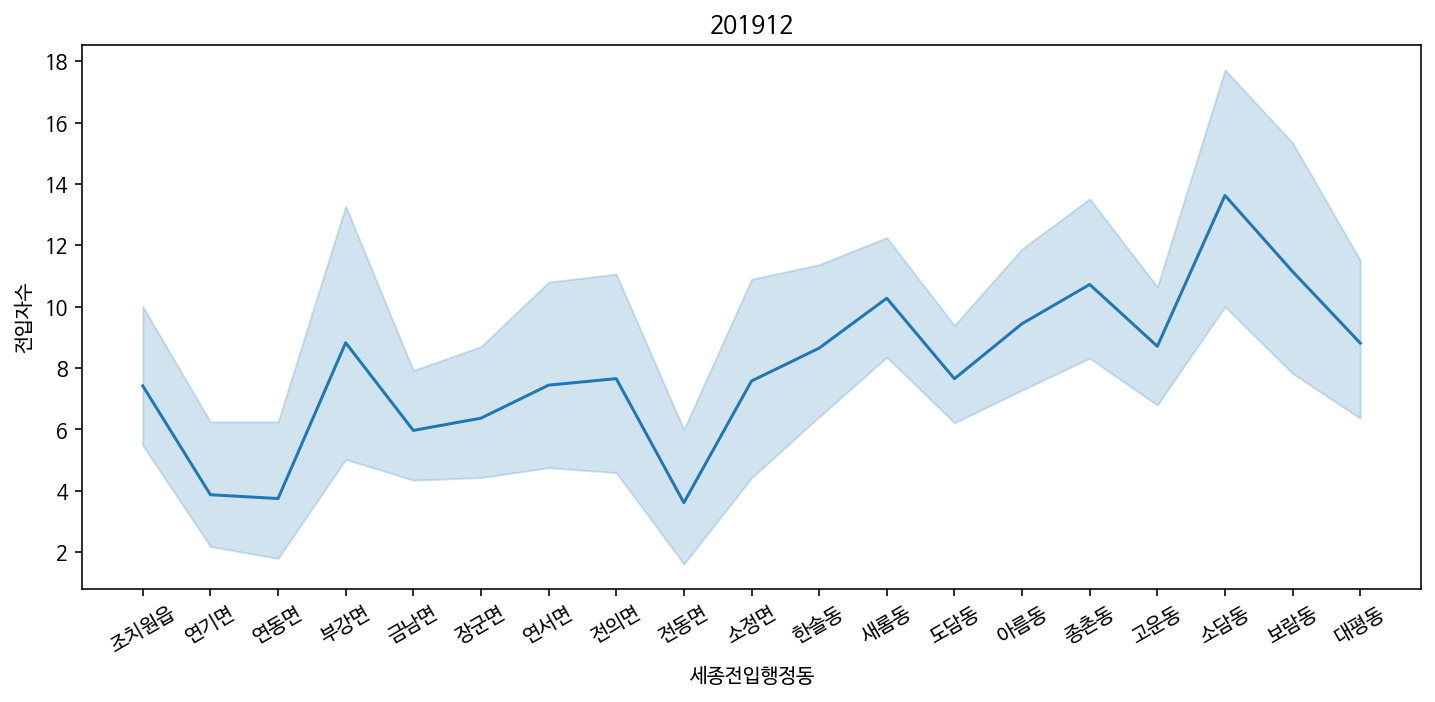

In [ ]:
a = 201901

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=in_a['세종전입행정동'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

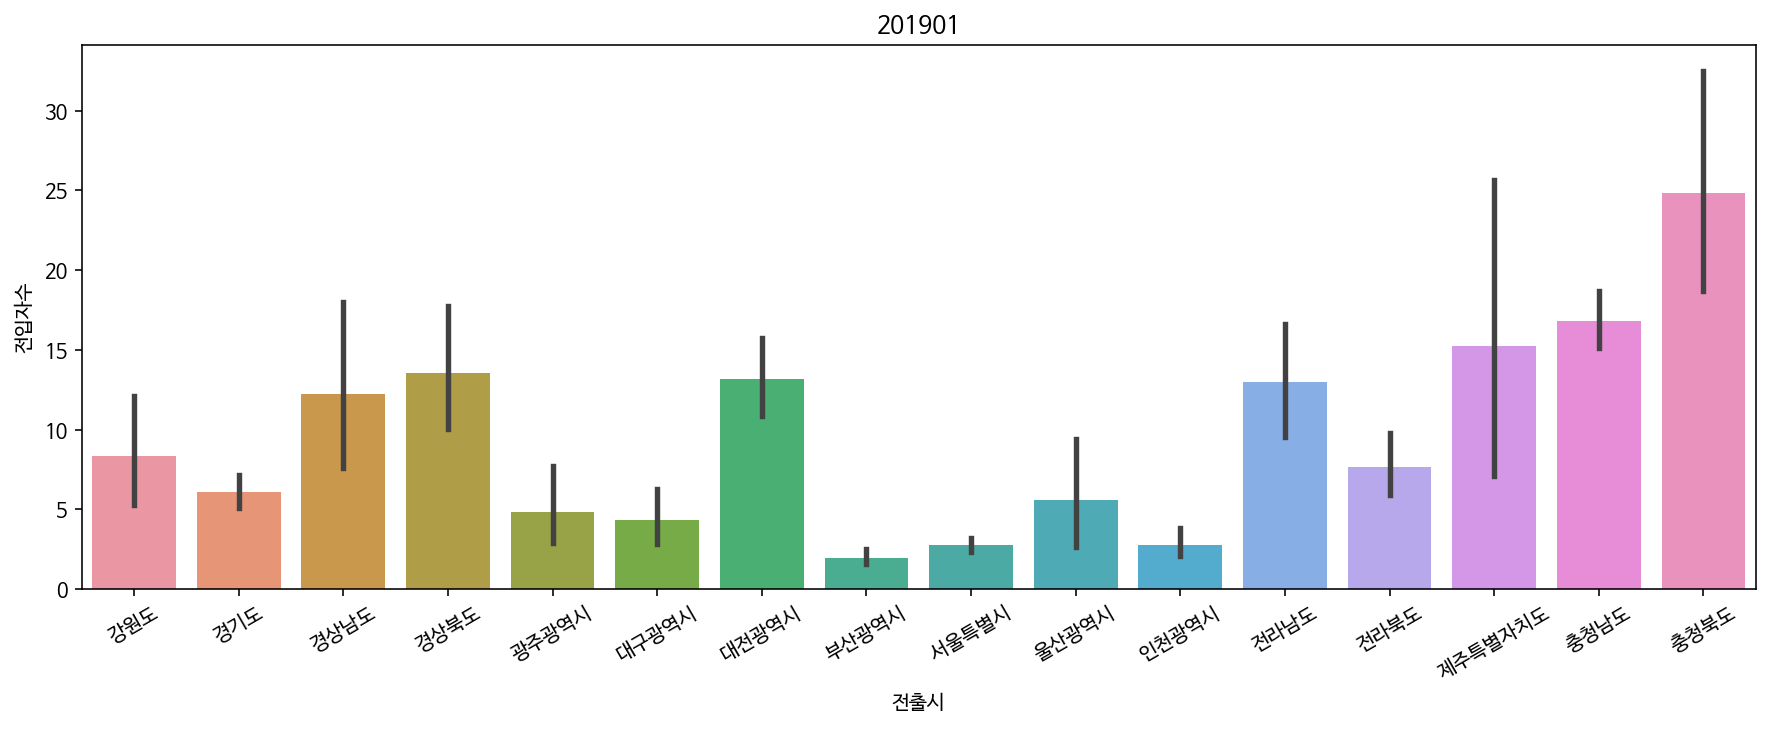

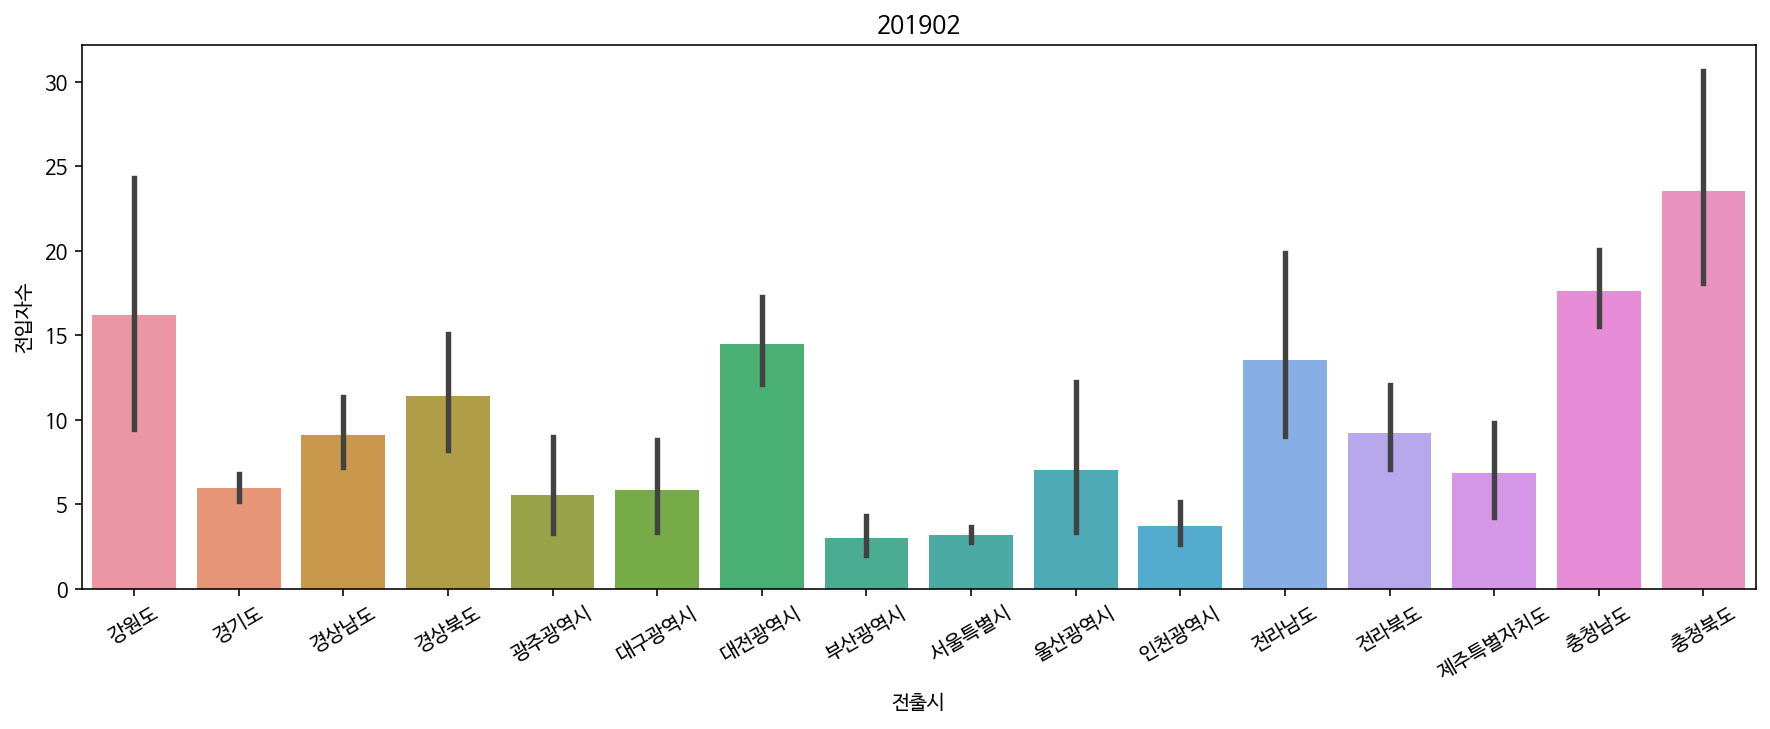

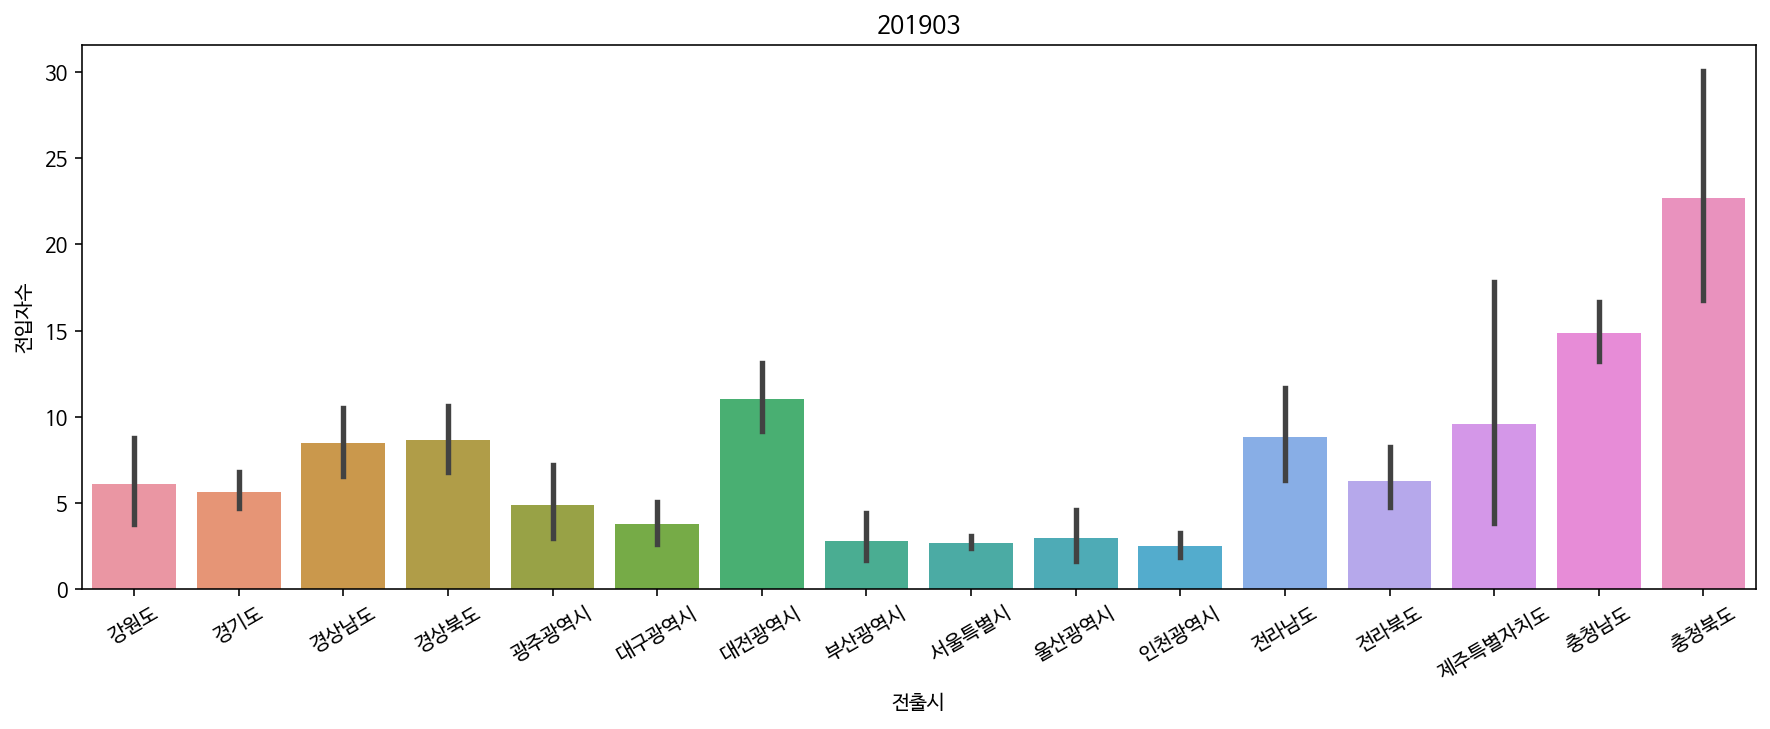

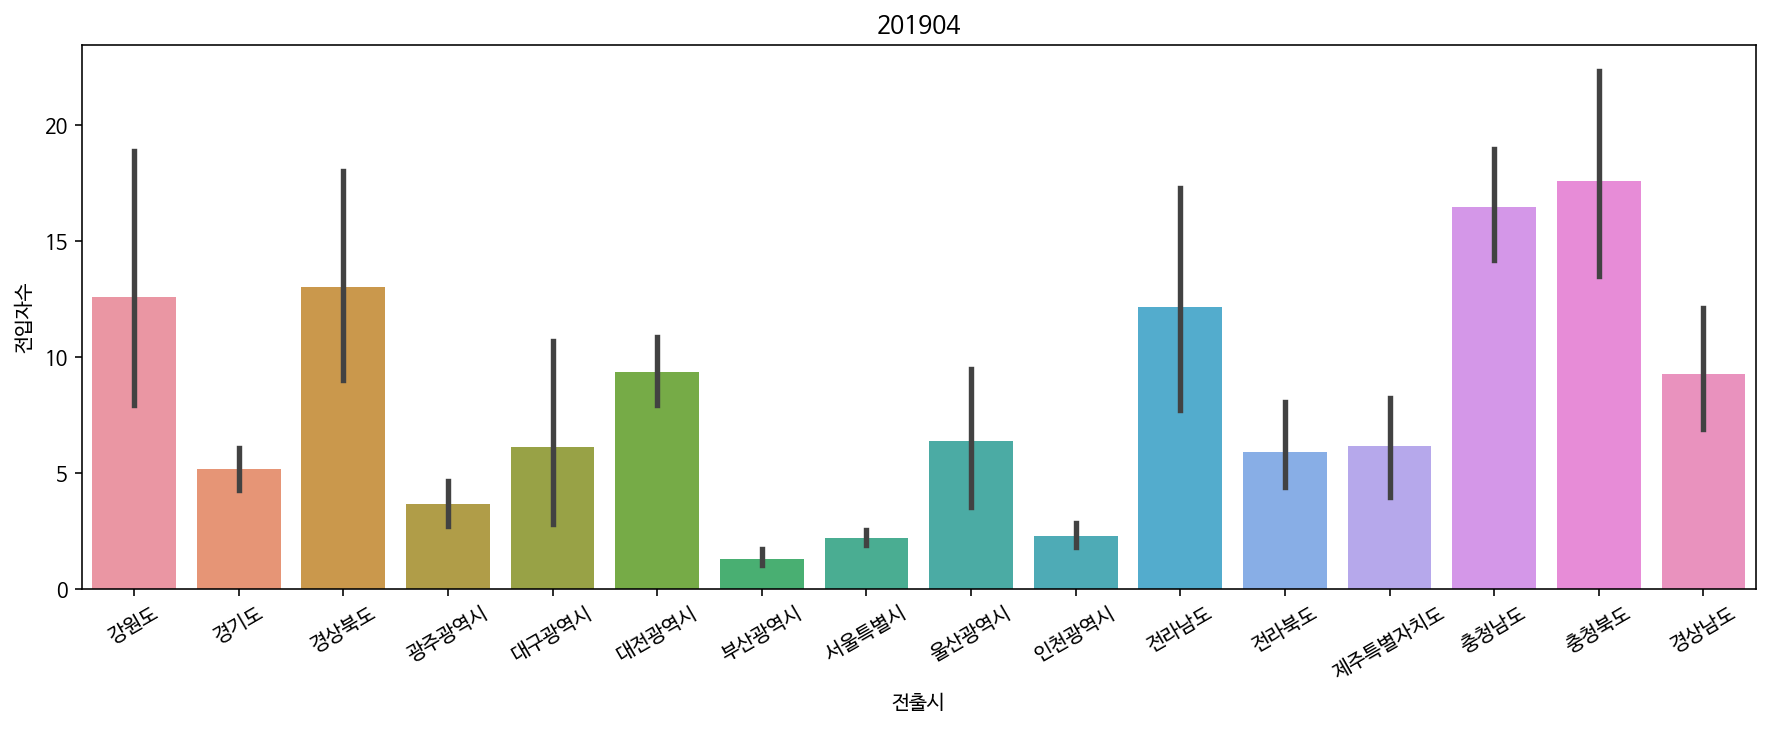

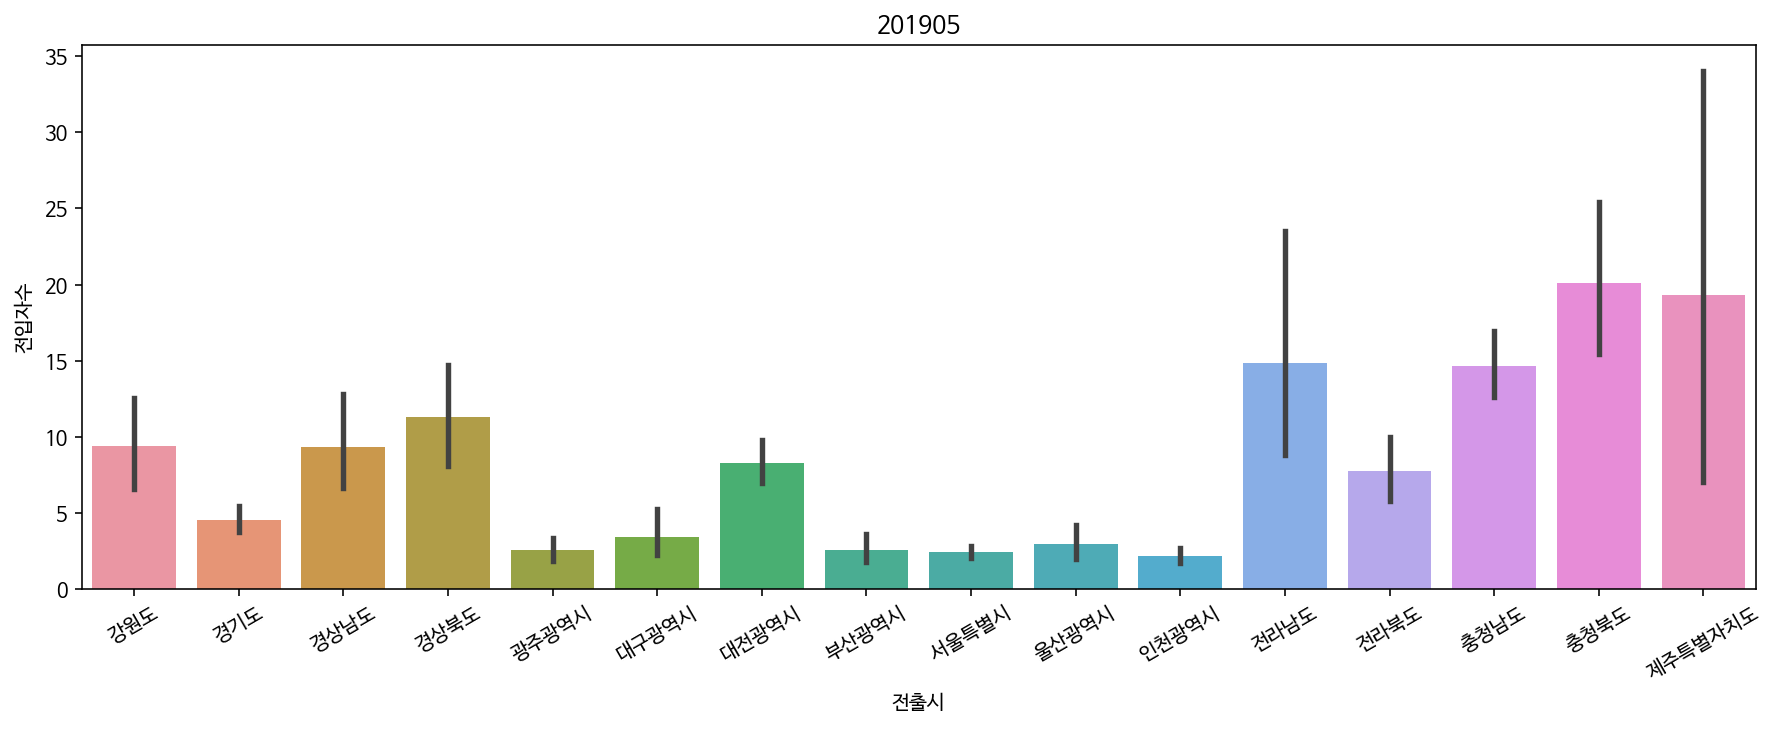

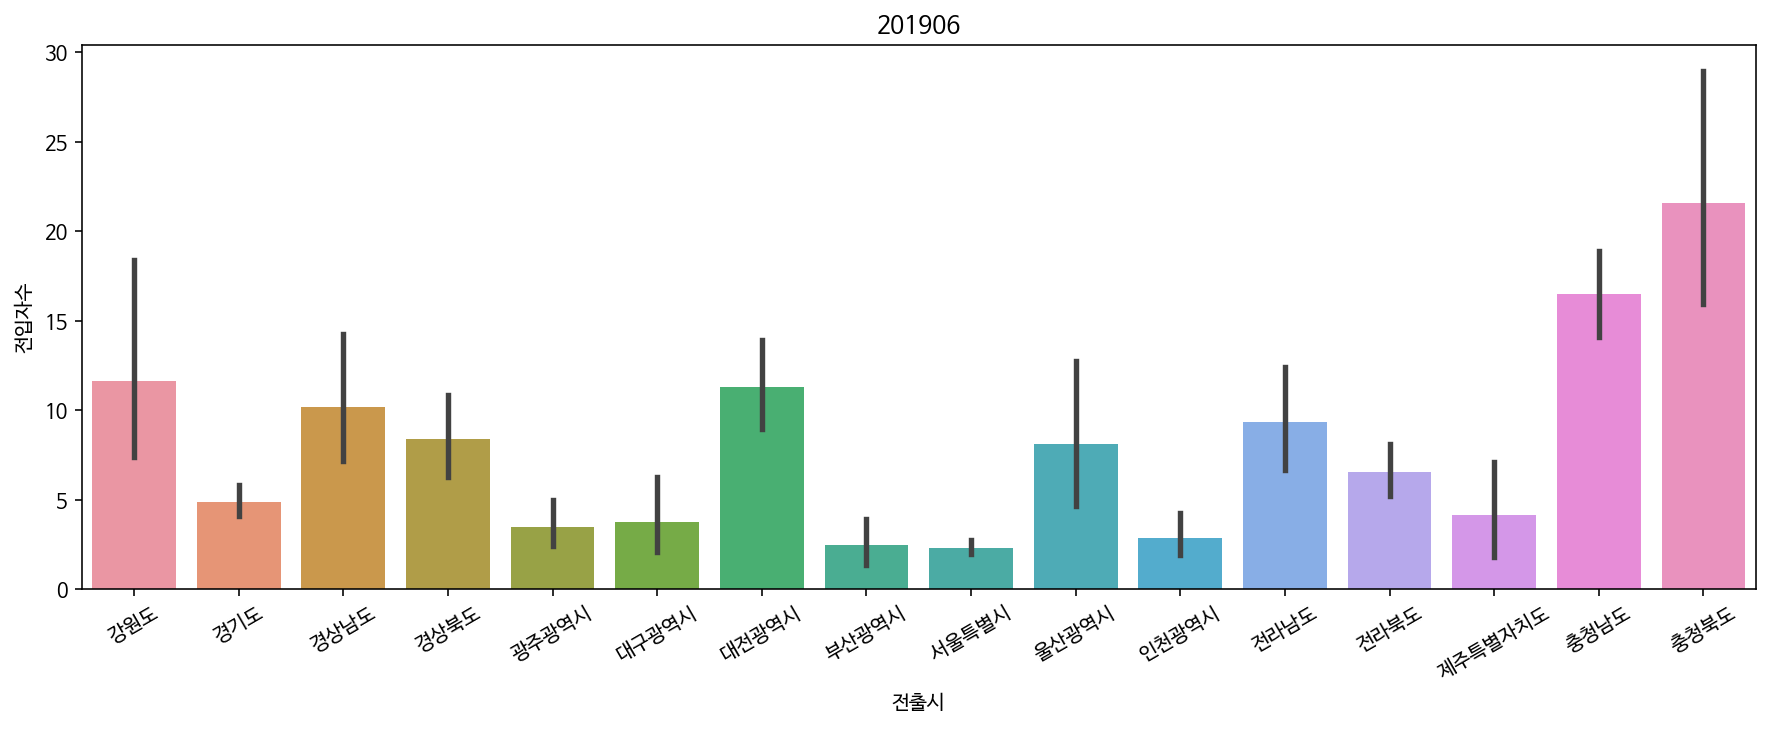

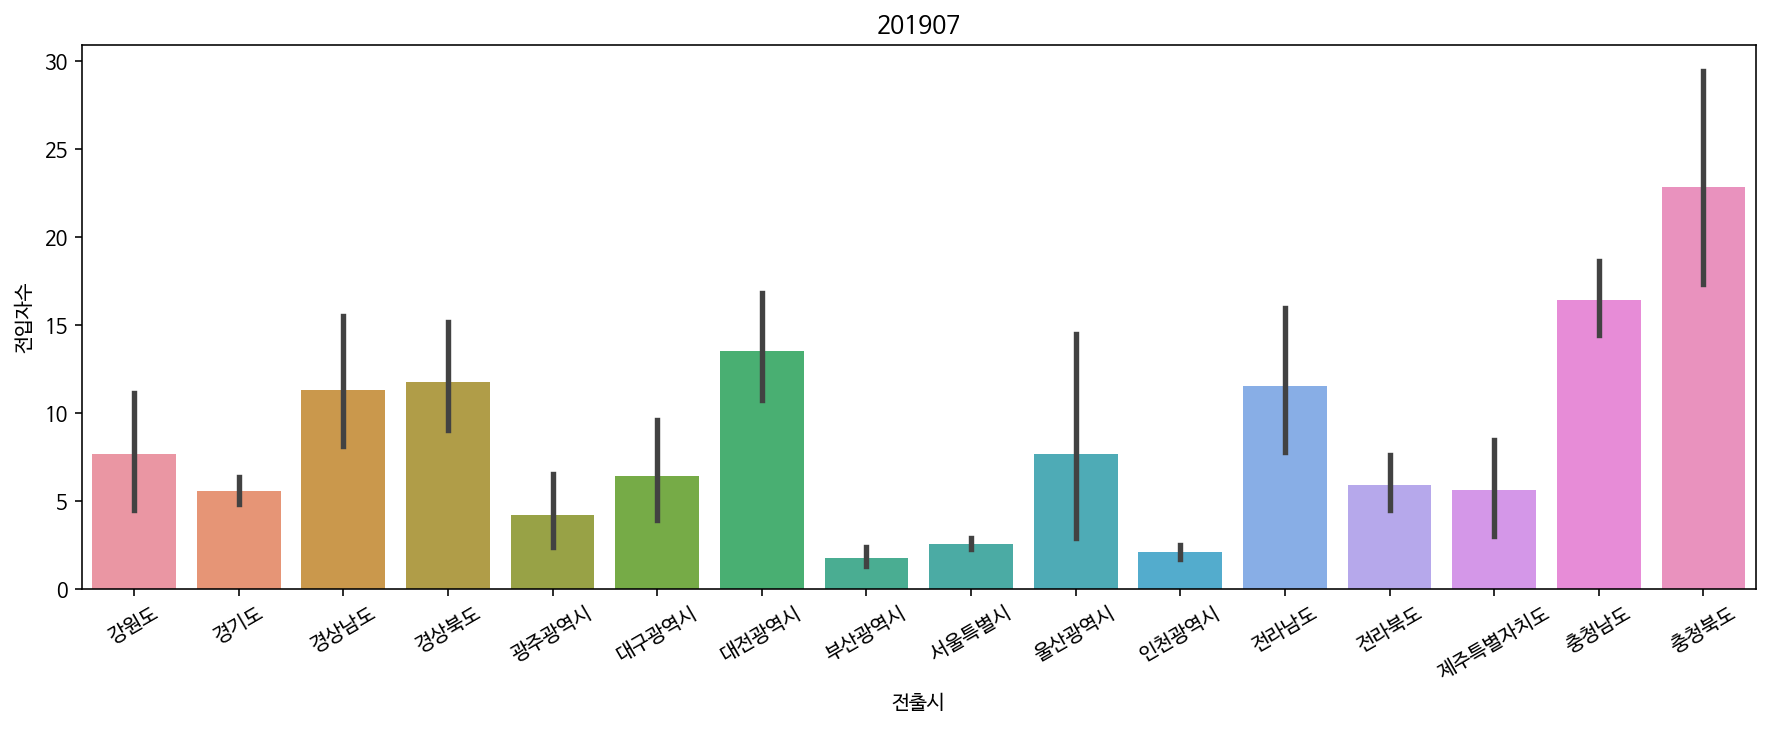

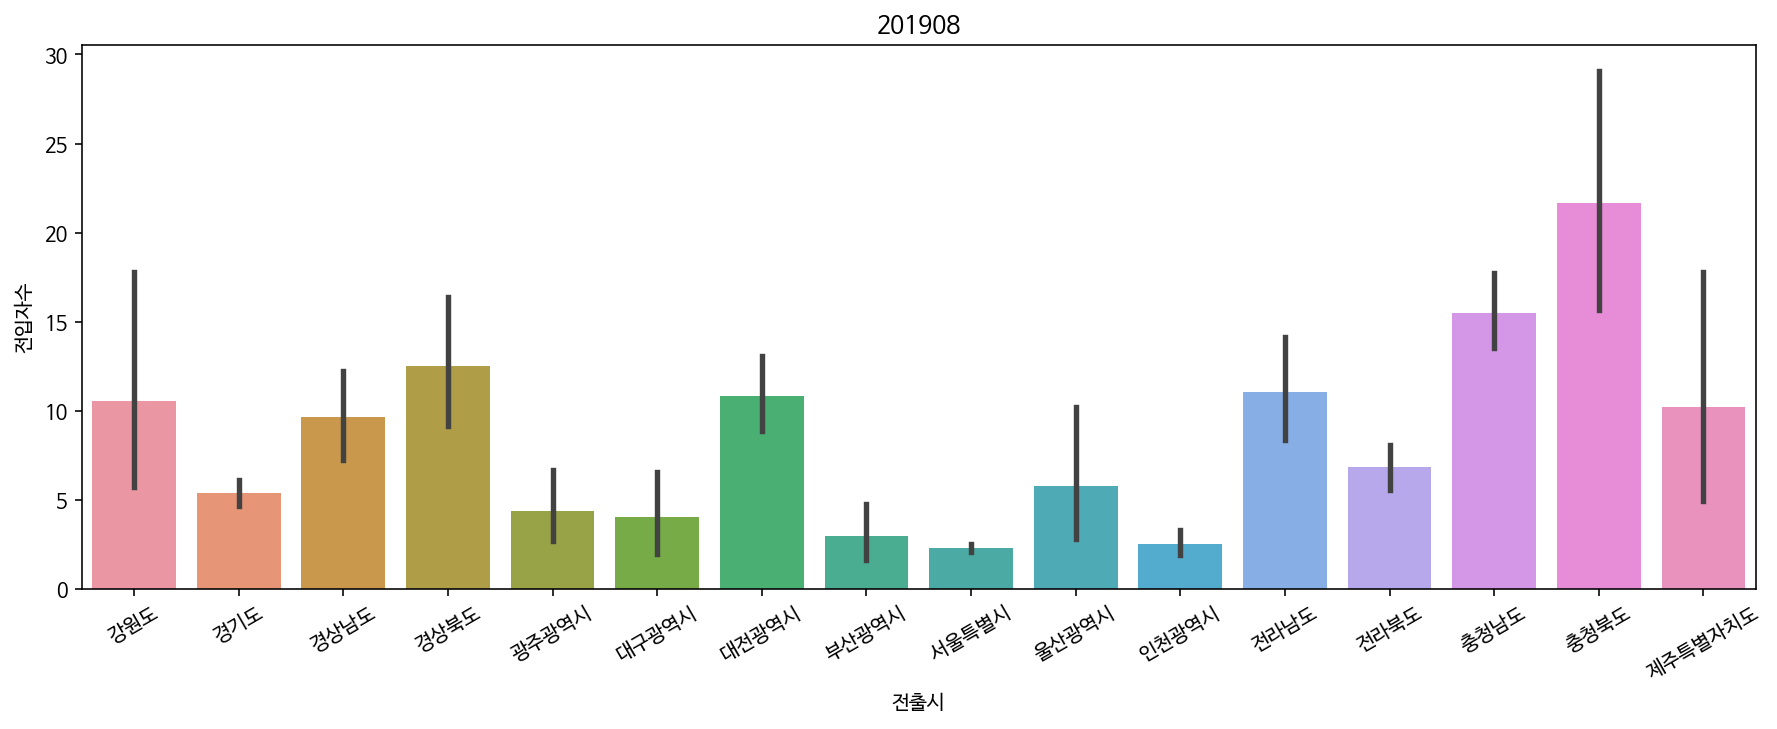

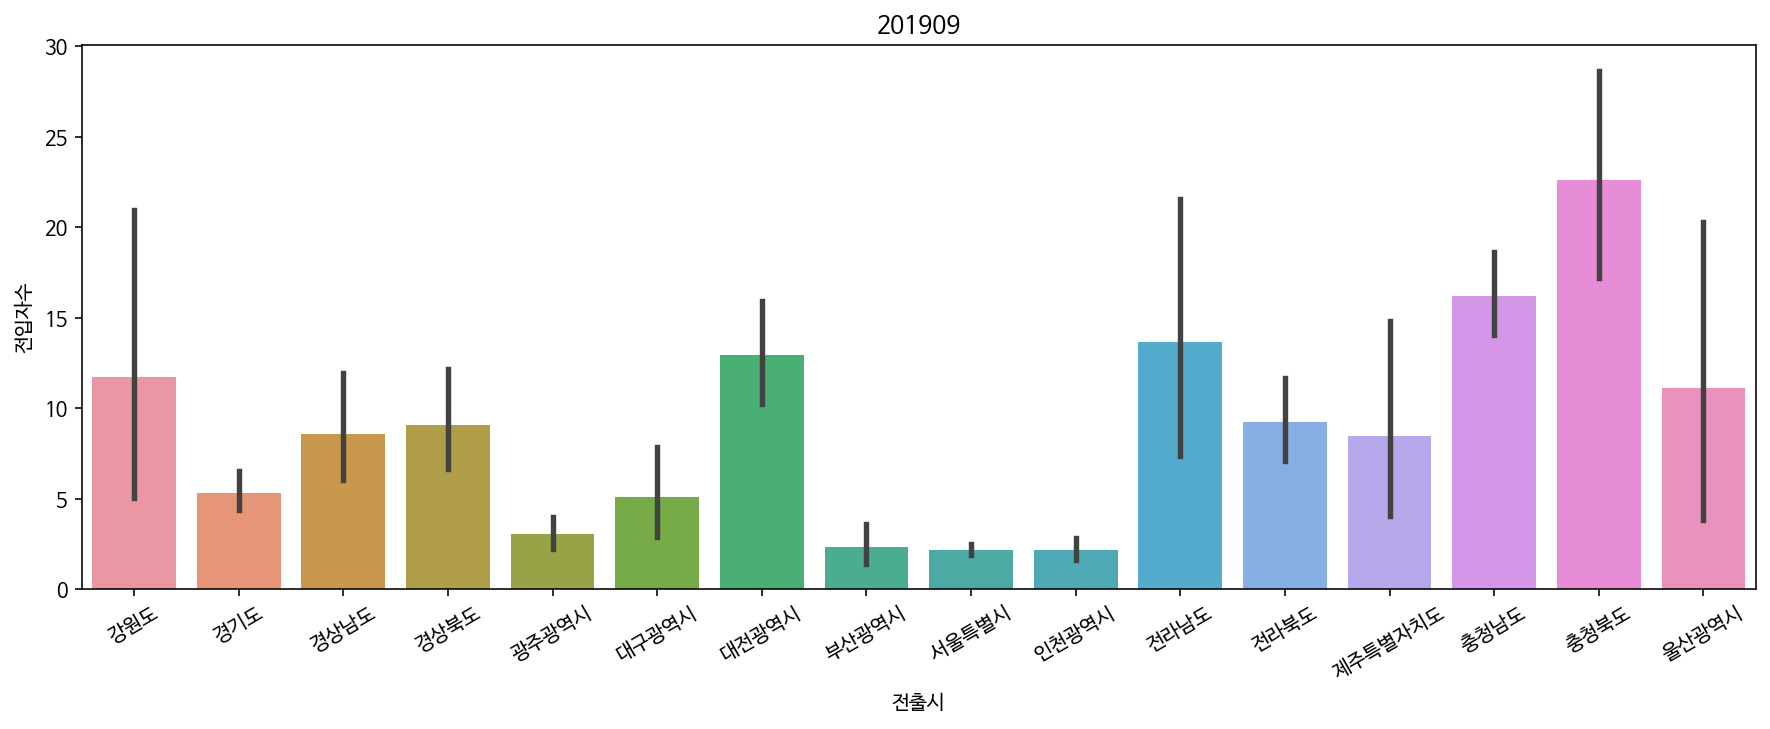

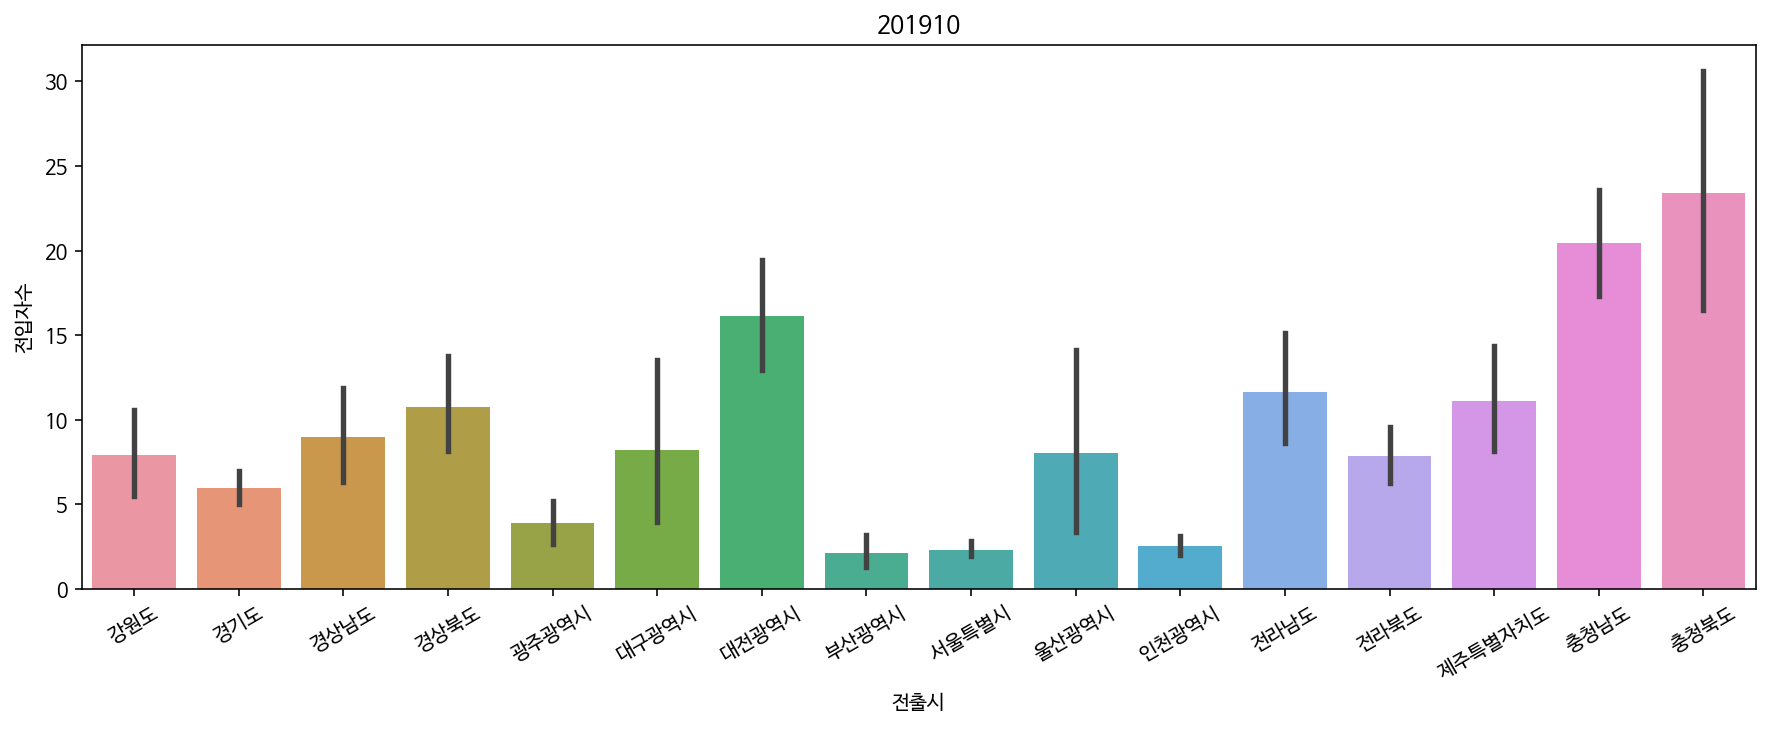

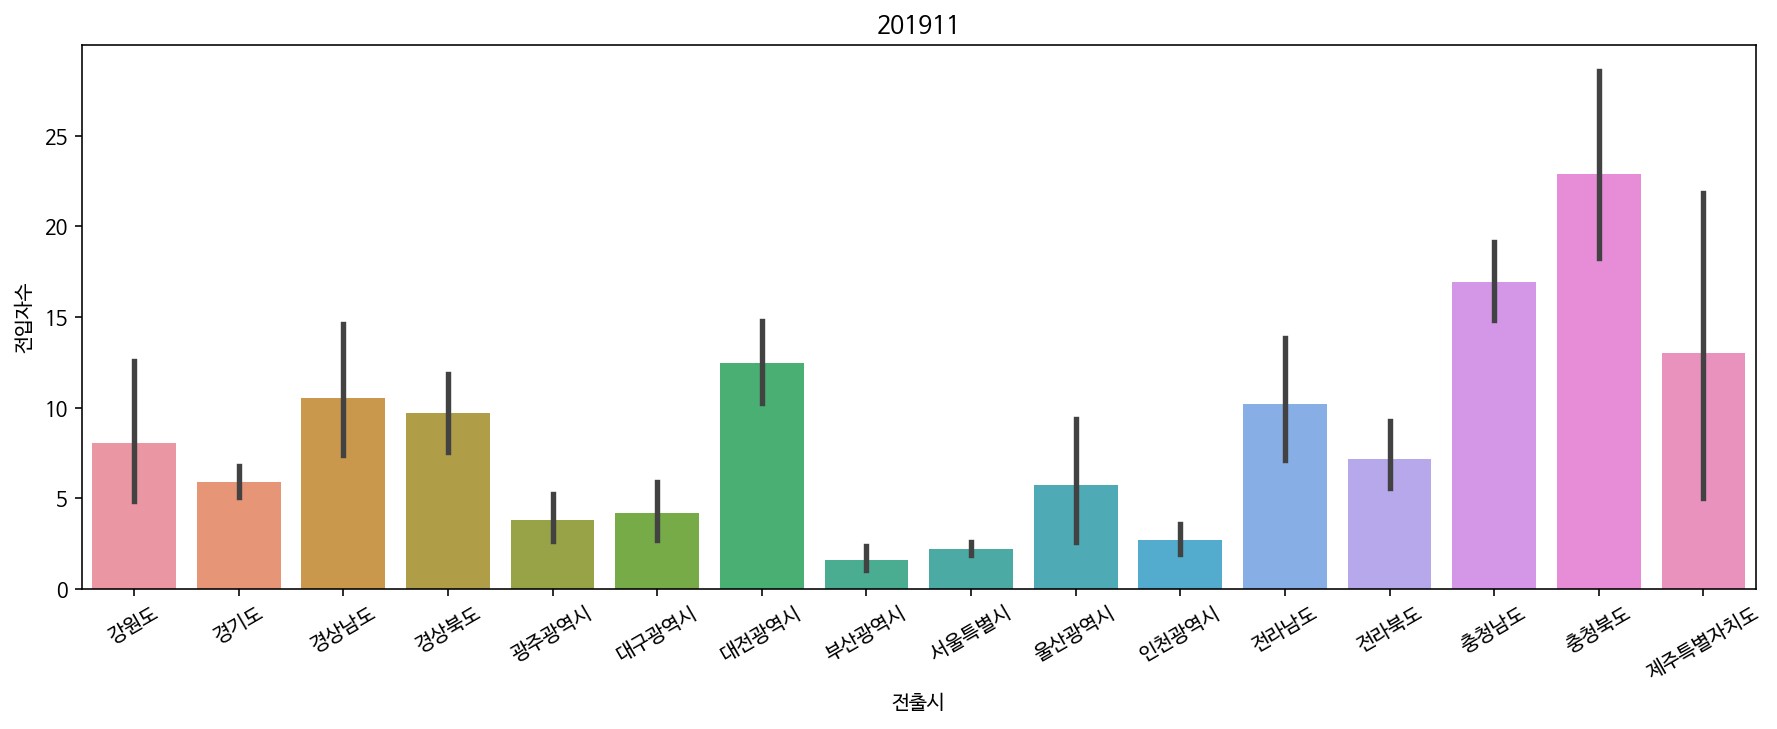

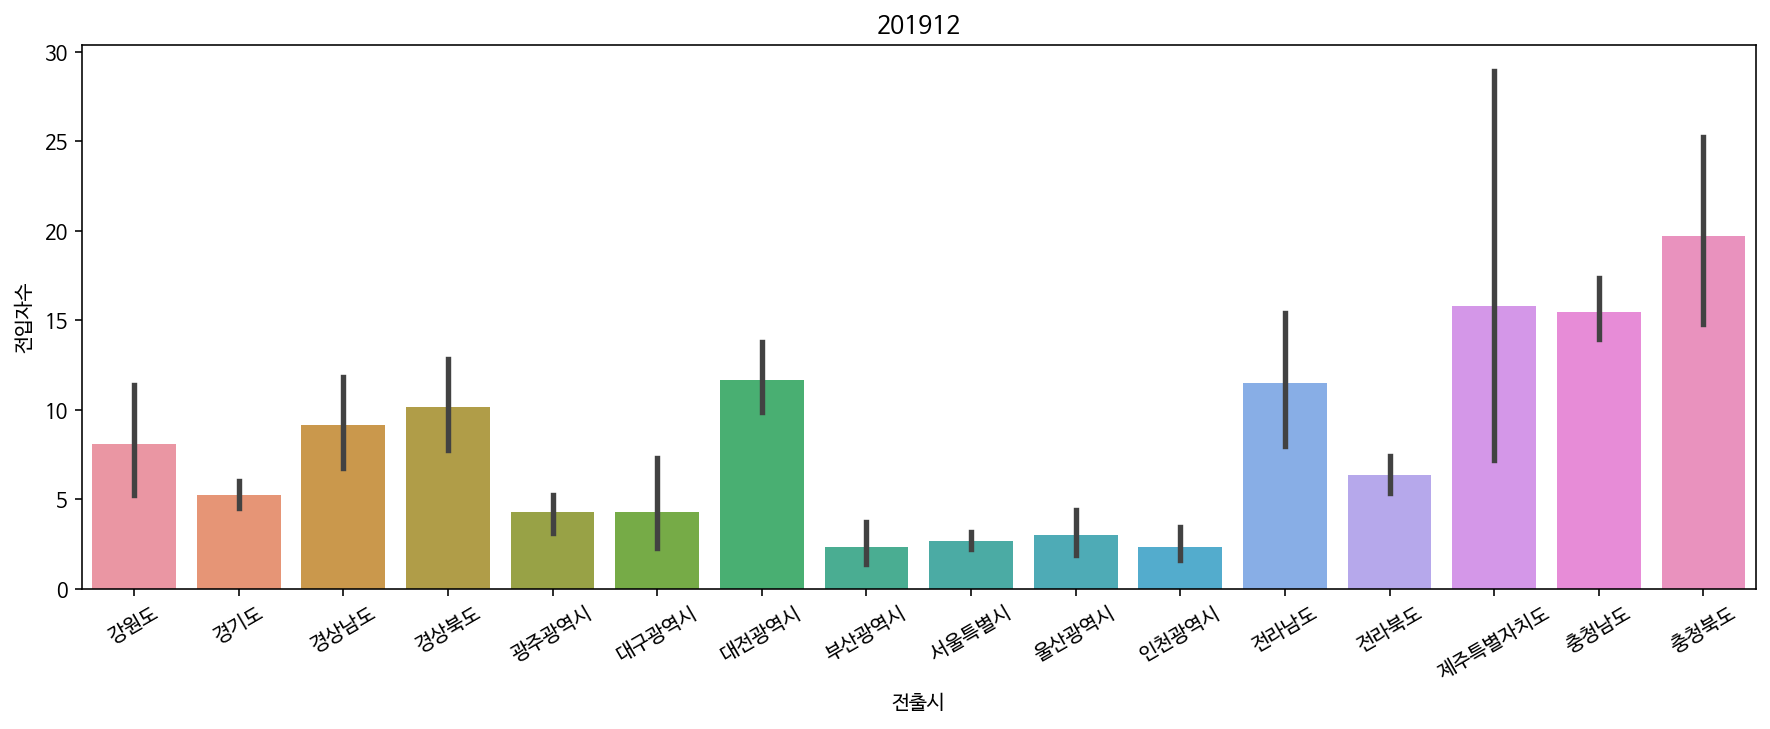

In [ ]:
a = 201901

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=in_a['전출시'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2020년도 전입자 추이

In [ ]:
df_in = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/20.세종시_전입자수.csv', encoding='utf-8')
# 전출지역 세종시 삭제 
mask = df_in['전출시'].isin(['세종특별자치시'])
df_in = df_in[~mask]
df_in

년월  전입자수 세종전입행정동   전출시   전출시군구   전출읍면동
0       201701     1    조치원읍   강원도     강릉시     교1동
1       201701     6    조치원읍   강원도     동해시     천곡동
2       201701    14    조치원읍   강원도     속초시      교동
3       201701    21    조치원읍   강원도     양양군      서면
4       201701     2    조치원읍   강원도     원주시     원인동
...        ...   ...     ...   ...     ...     ...
108077  202101     3     다정동  충청북도  청주시흥덕구    복대1동
108078  202101    56     다정동  충청북도  청주시흥덕구     오송읍
108079  202101    32     다정동  충청북도  청주시흥덕구     옥산면
108080  202101     8     다정동  충청북도     충주시  교현·안림동
108081  202101     9     다정동  충청북도     충주시    중앙탑면

[98249 rows x 6 columns]

In [ ]:
a = 202001

for i in range(1, 13):
    df_in_a = df_in['년월']==a
    df_in[a] = df_in_a
    a += 1
print(df_in)

            년월  전입자수 세종전입행정동   전출시  ... 202009 202010  202011  202012
0       201701     1    조치원읍   강원도  ...  False  False   False   False
1       201701     6    조치원읍   강원도  ...  False  False   False   False
2       201701    14    조치원읍   강원도  ...  False  False   False   False
3       201701    21    조치원읍   강원도  ...  False  False   False   False
4       201701     2    조치원읍   강원도  ...  False  False   False   False
...        ...   ...     ...   ...  ...    ...    ...     ...     ...
108077  202101     3     다정동  충청북도  ...  False  False   False   False
108078  202101    56     다정동  충청북도  ...  False  False   False   False
108079  202101    32     다정동  충청북도  ...  False  False   False   False
108080  202101     8     다정동  충청북도  ...  False  False   False   False
108081  202101     9     다정동  충청북도  ...  False  False   False   False

[98249 rows x 18 columns]


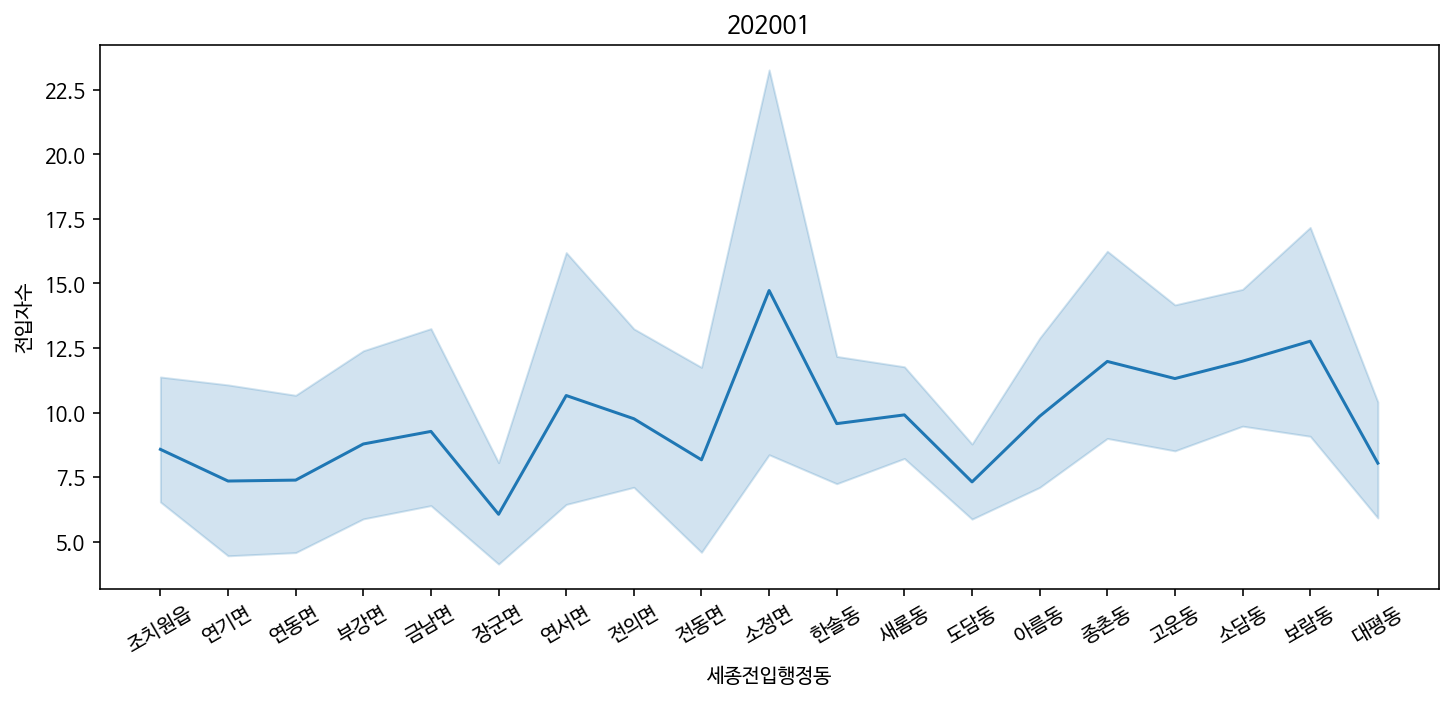

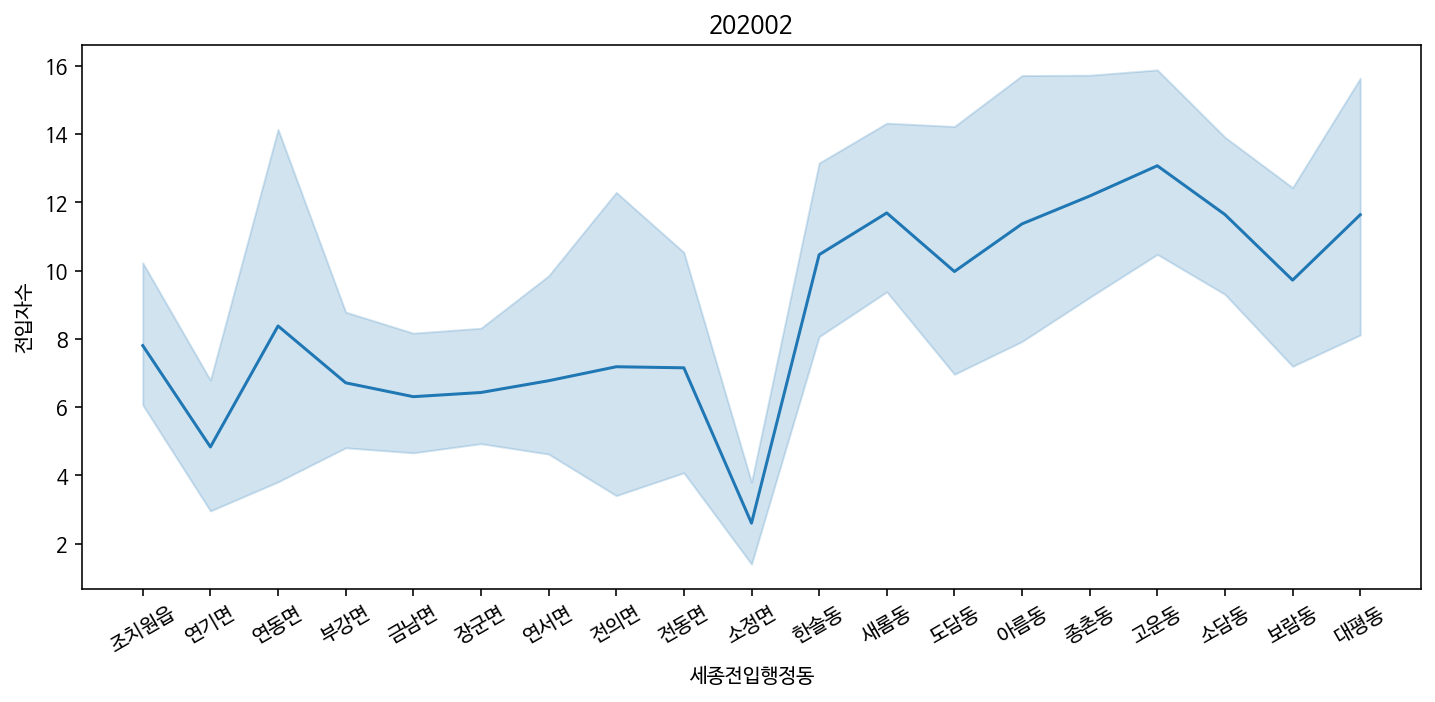

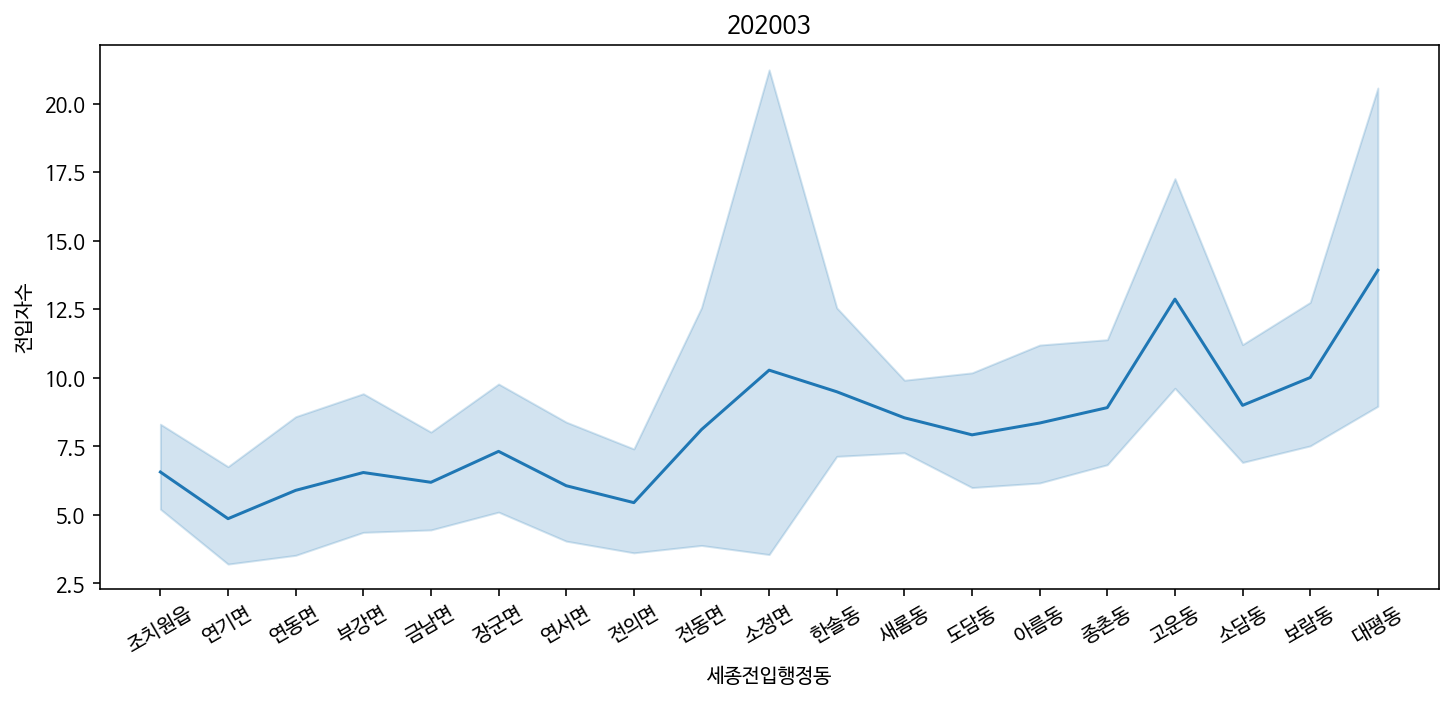

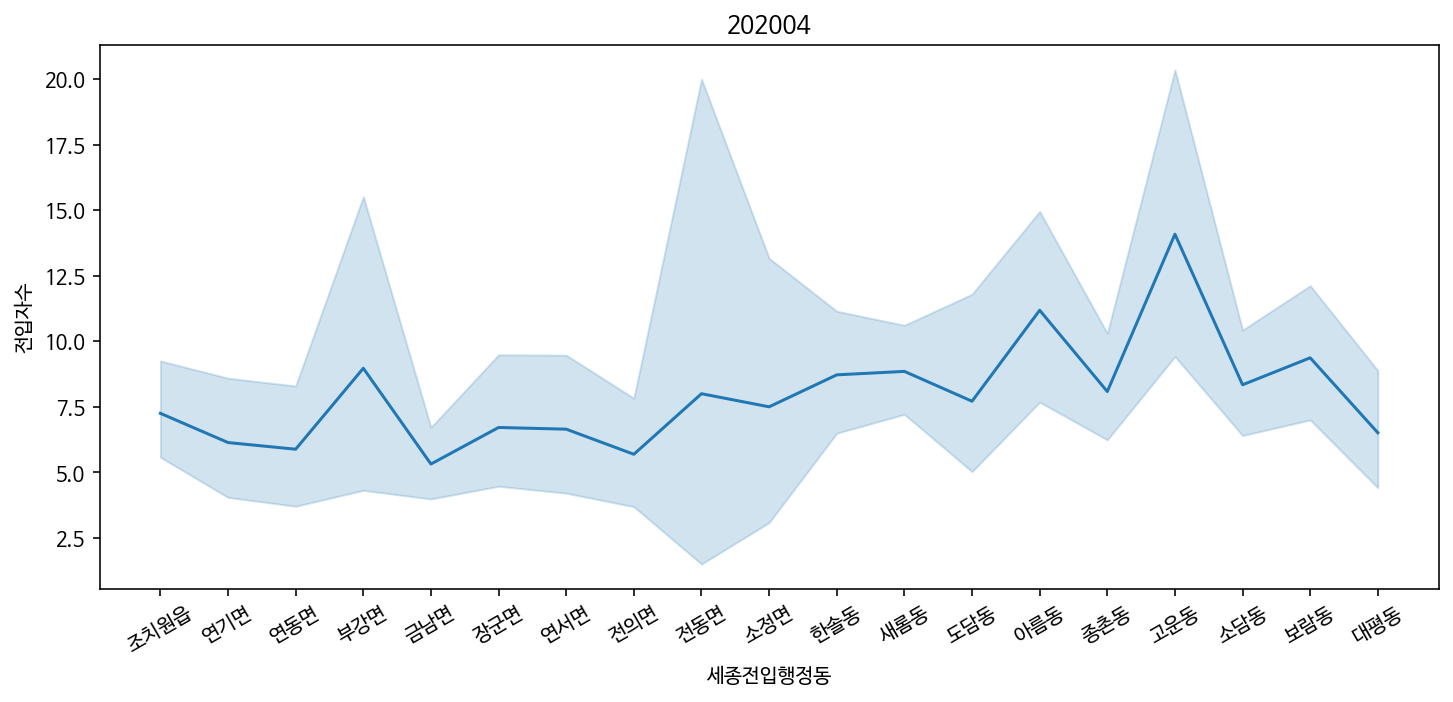

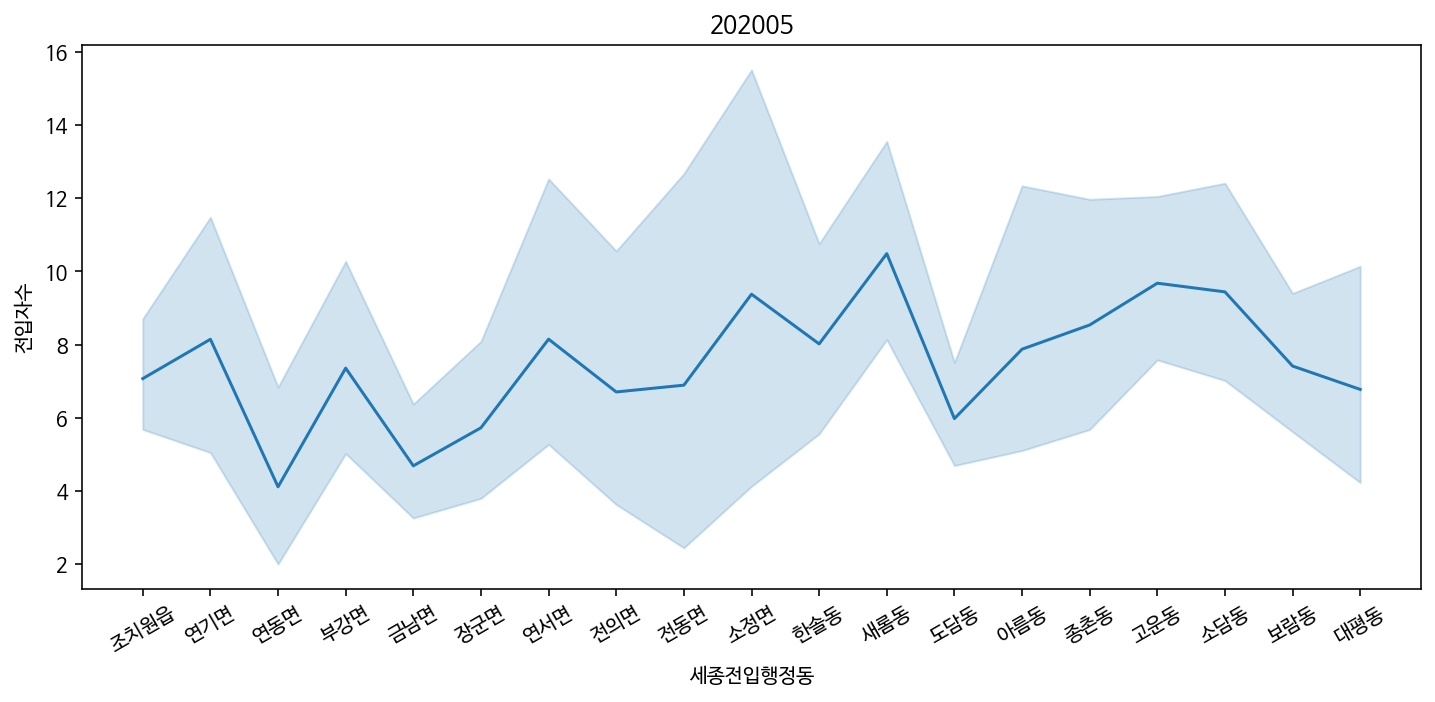

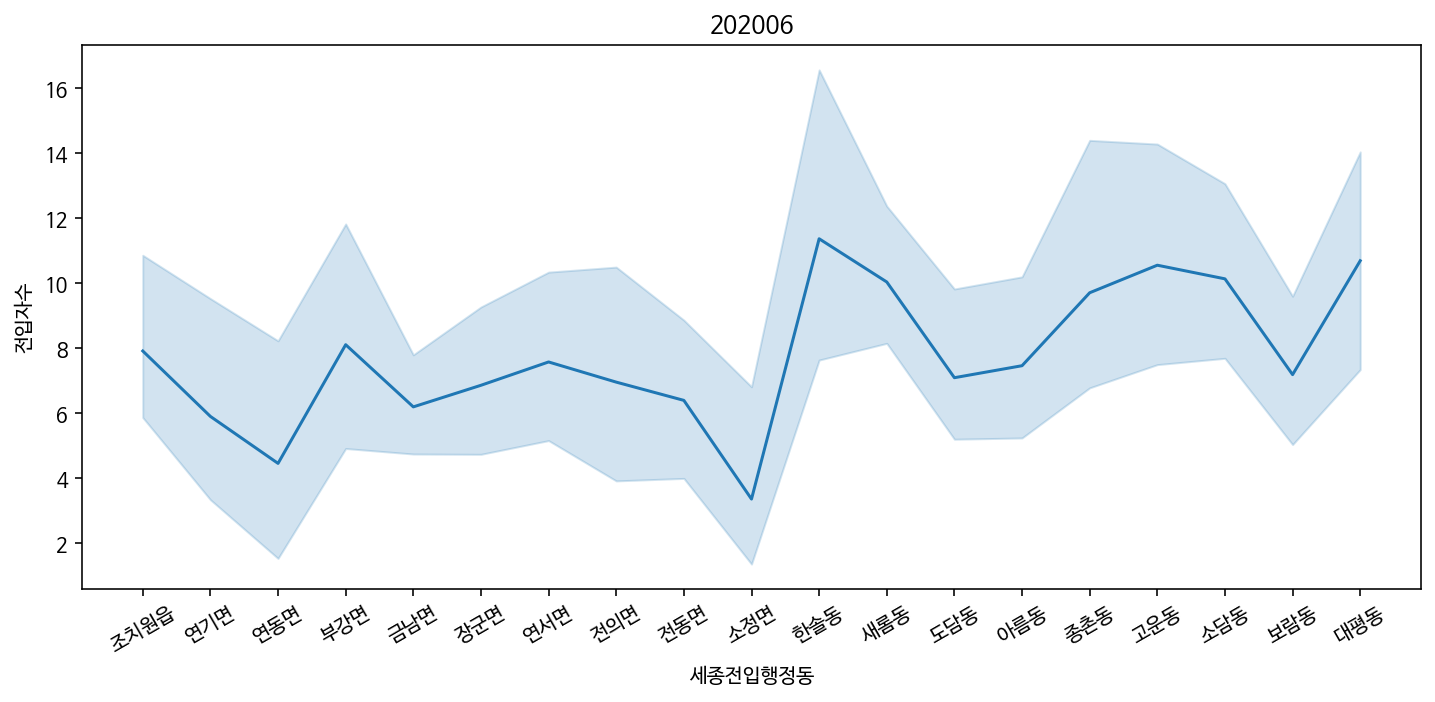

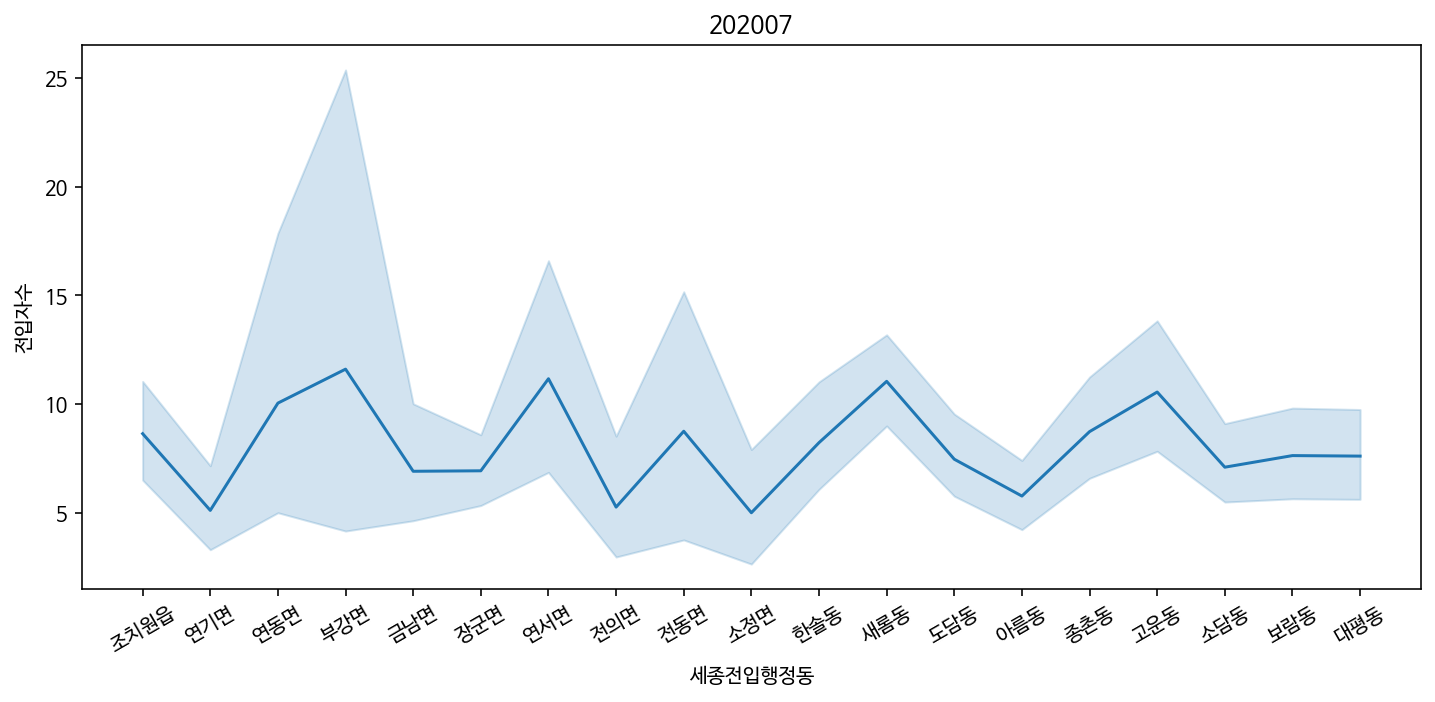

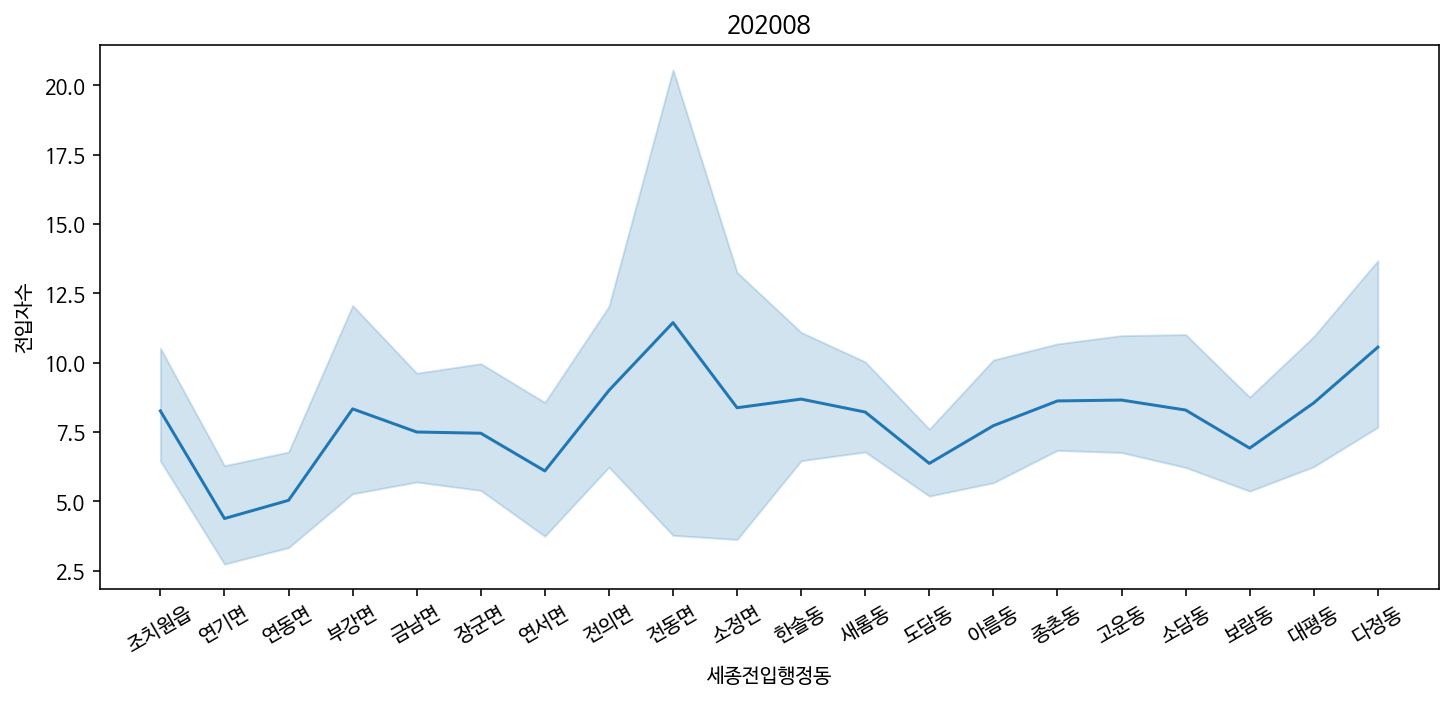

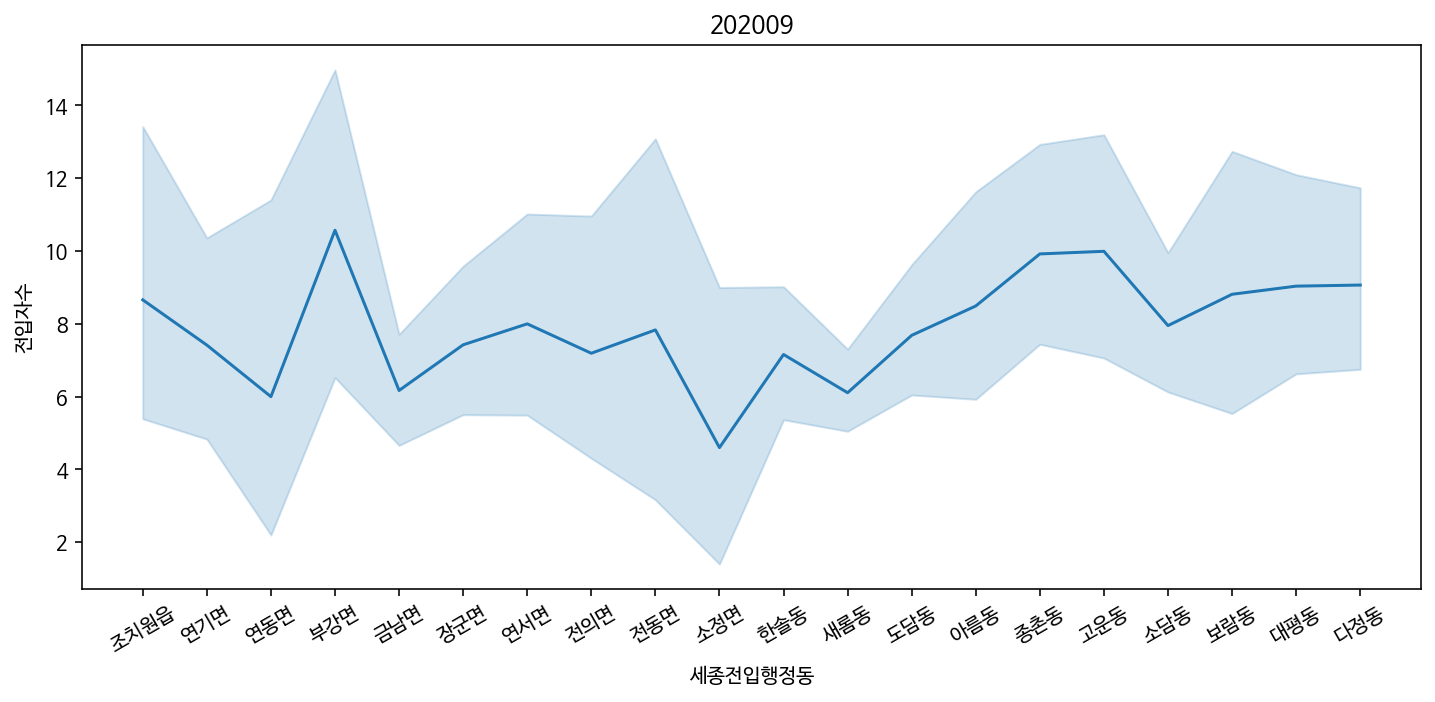

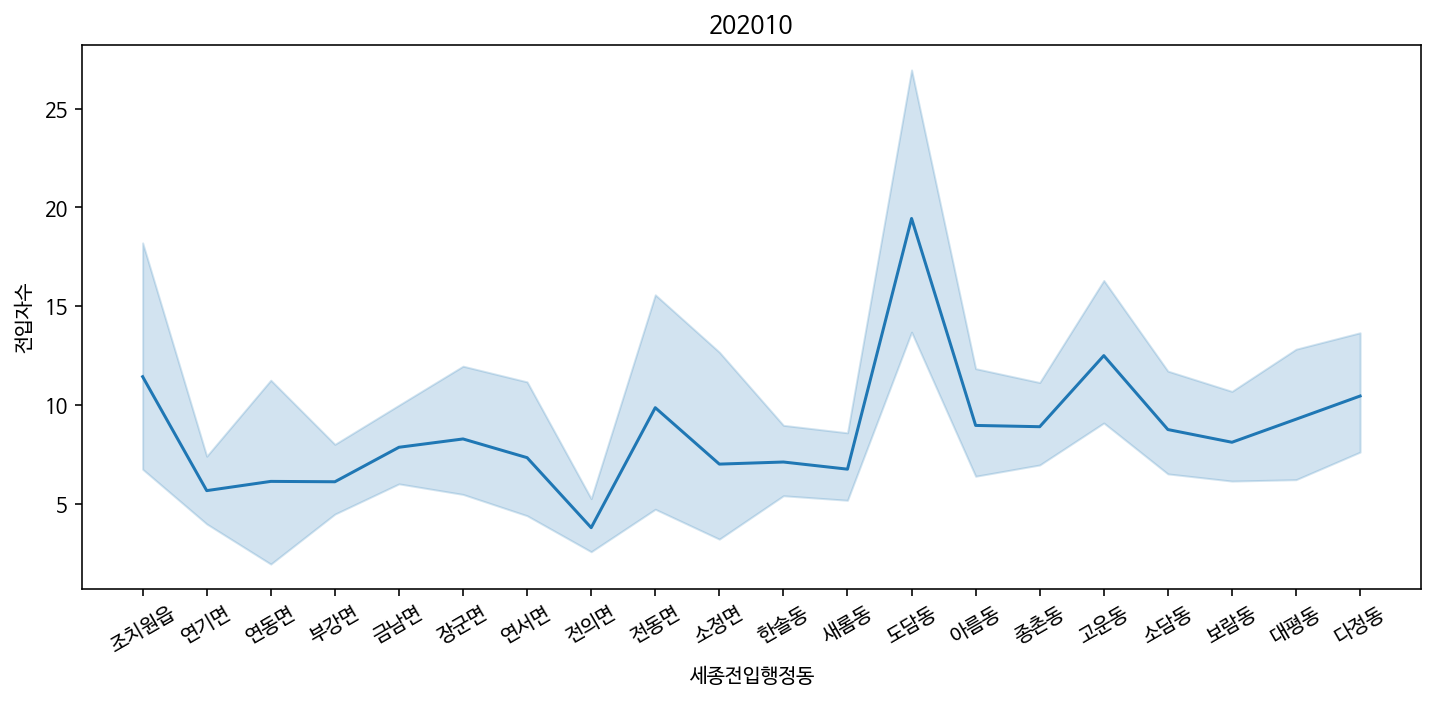

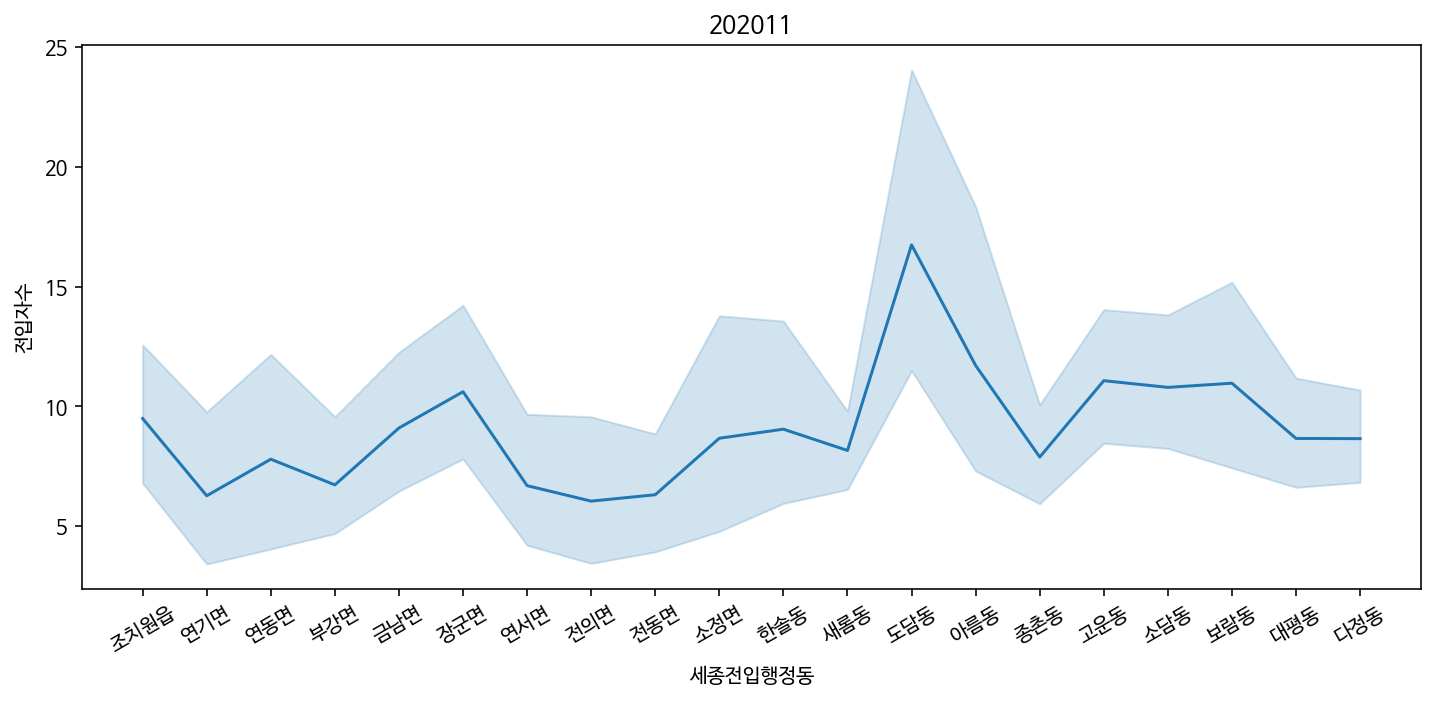

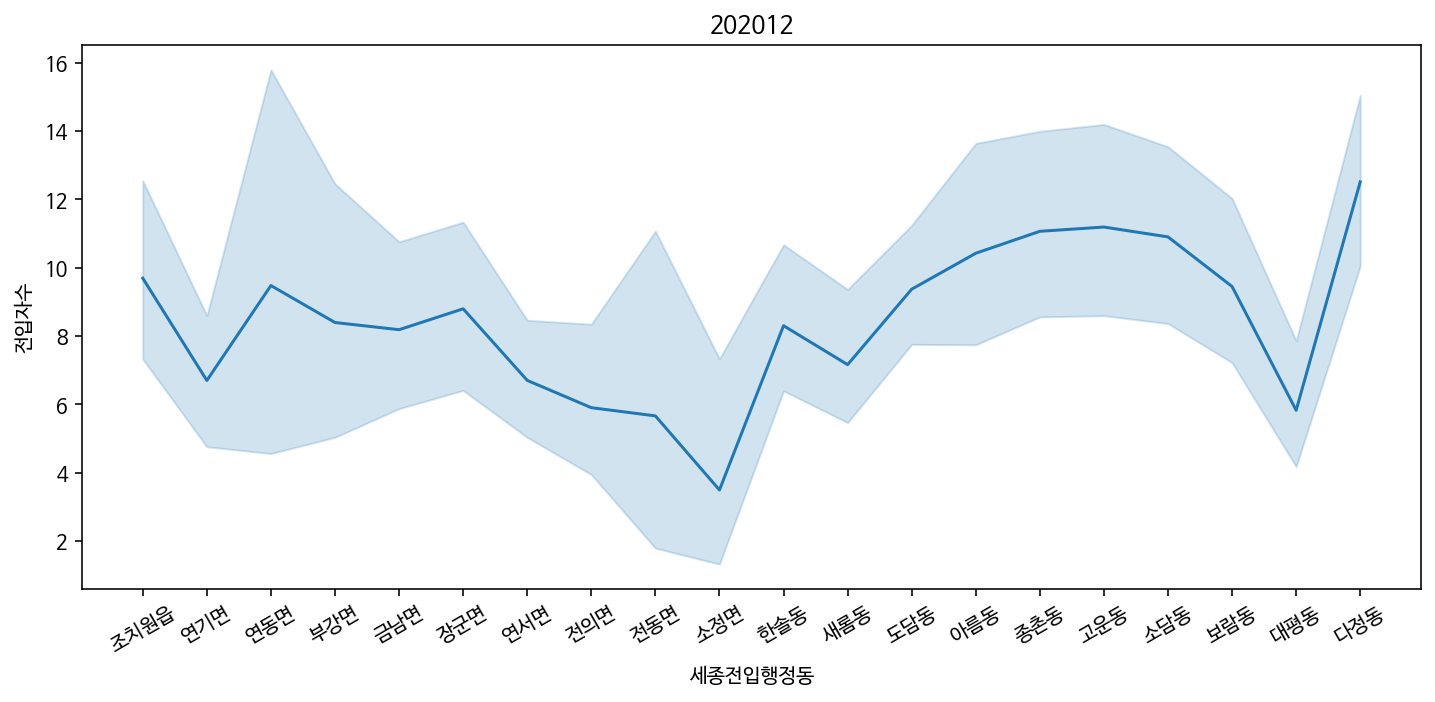

In [ ]:
a = 202001

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=in_a['세종전입행정동'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

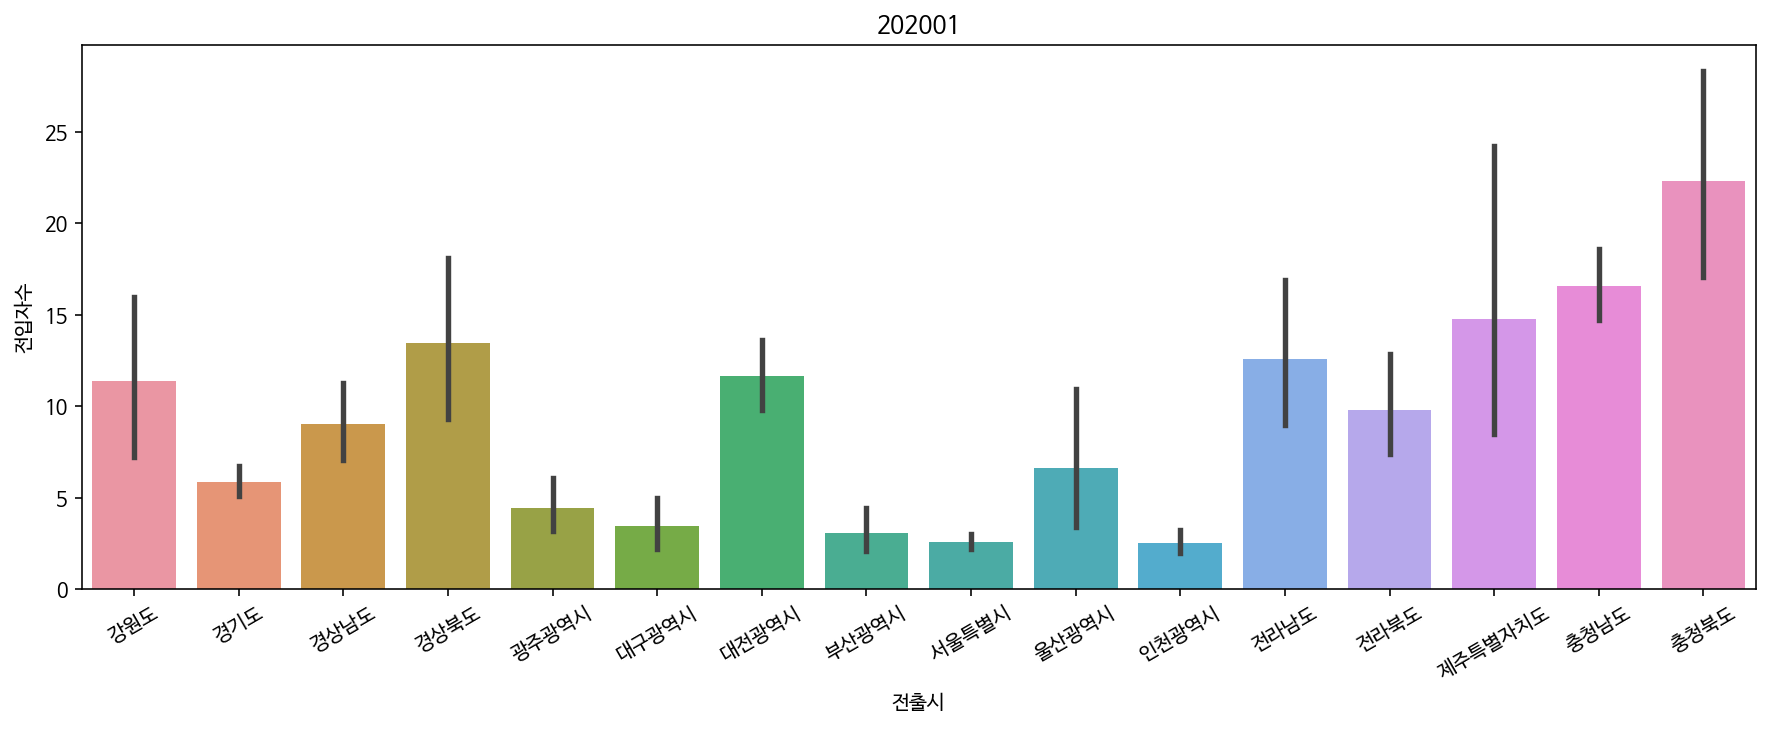

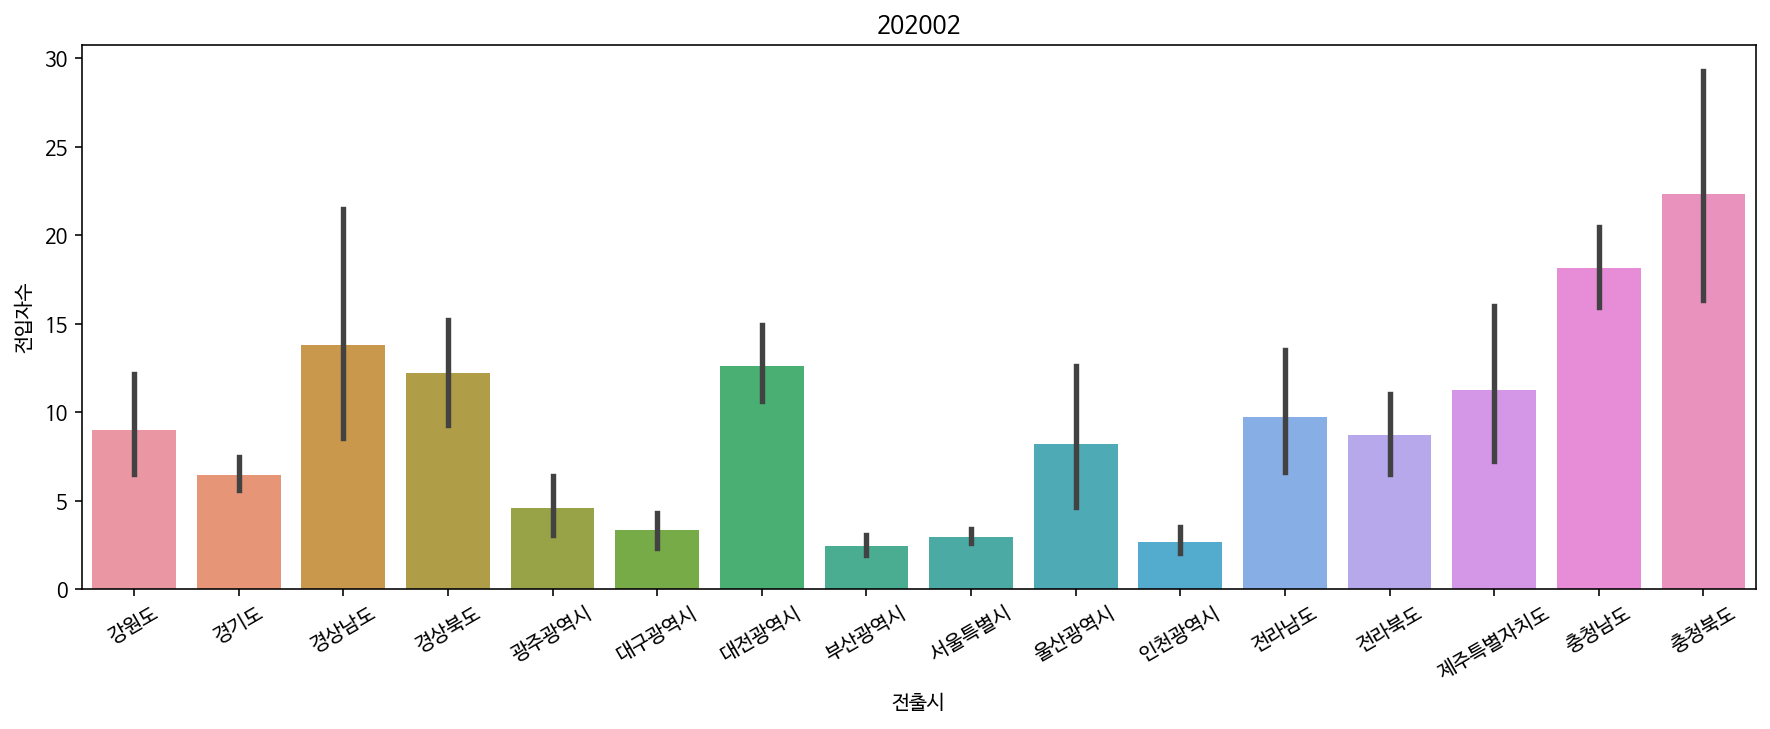

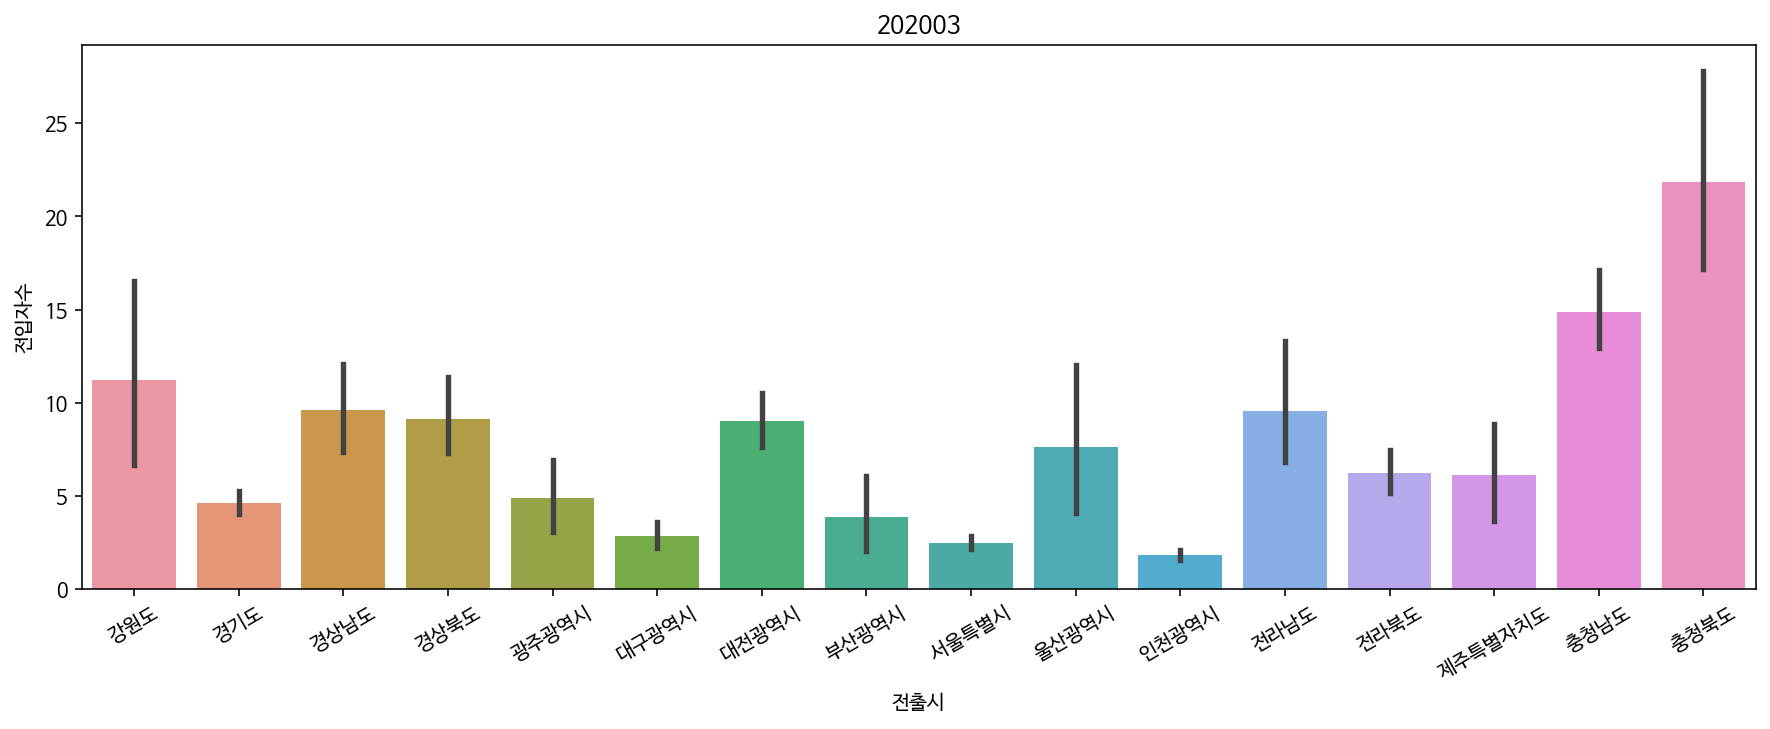

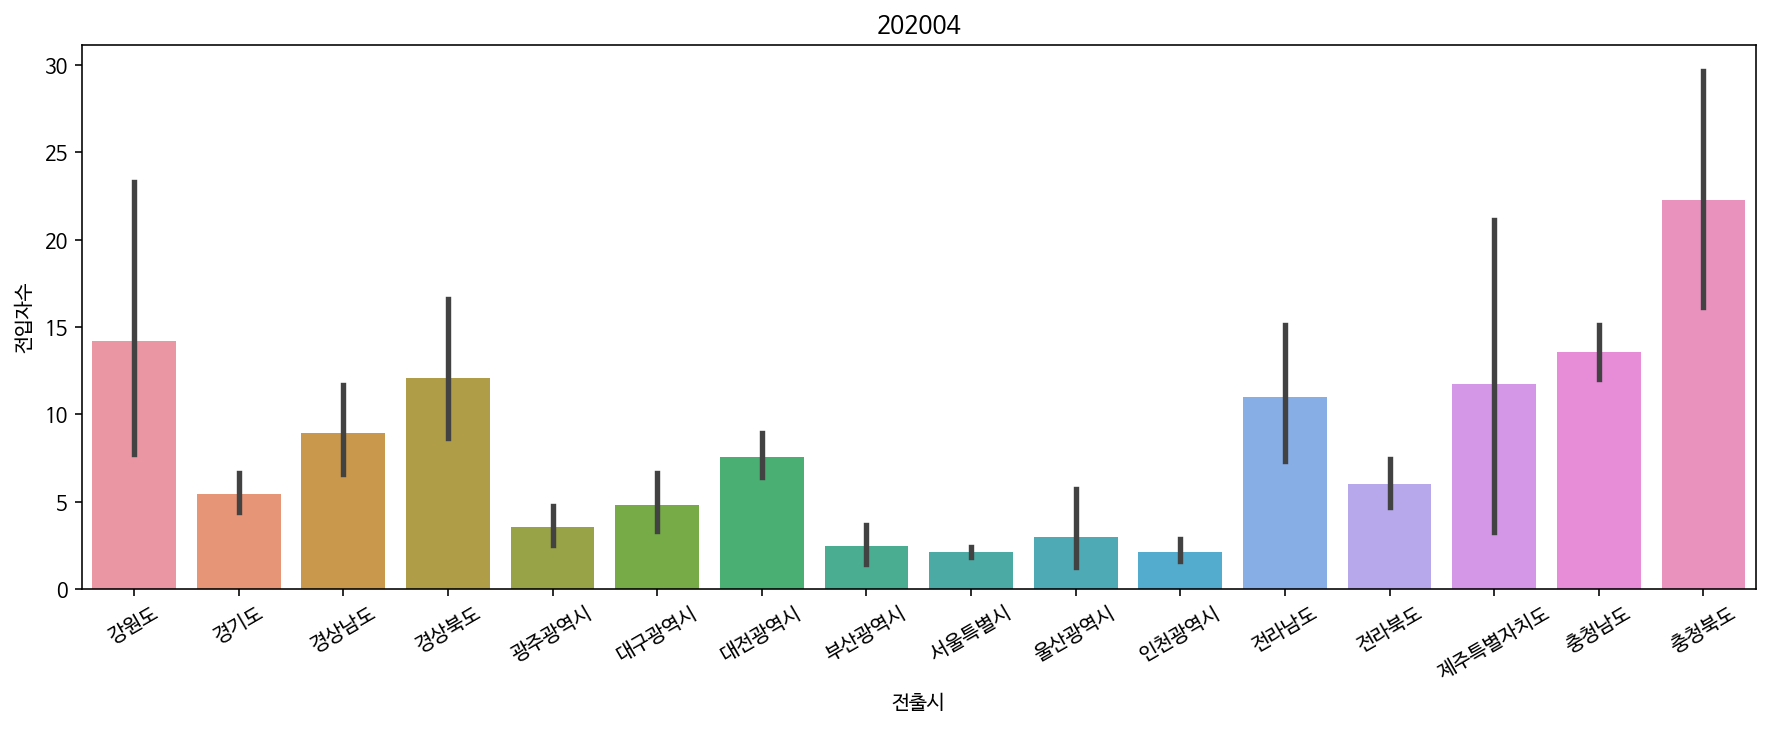

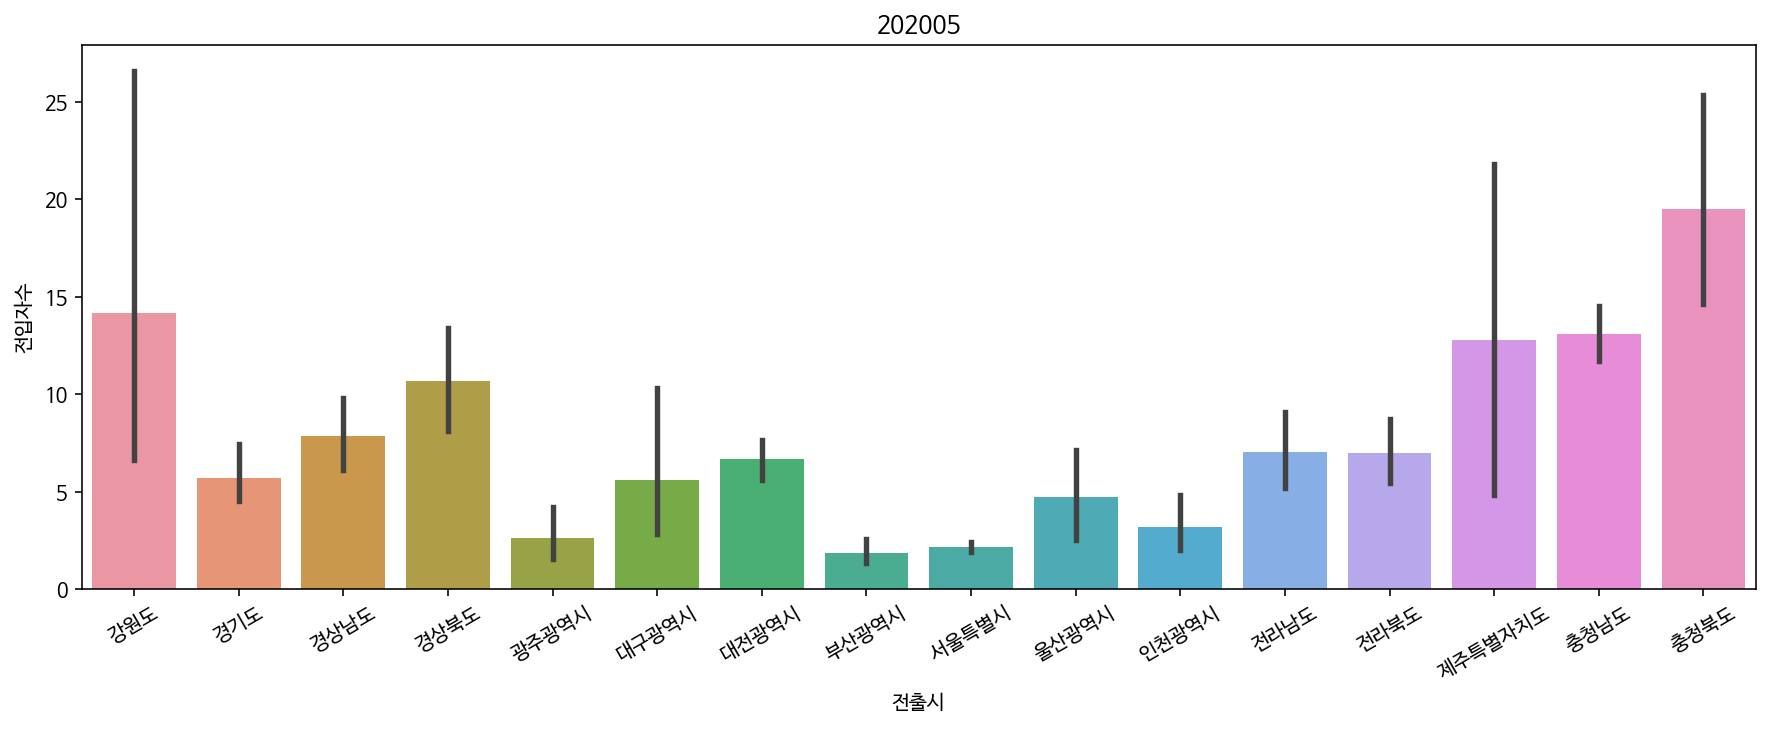

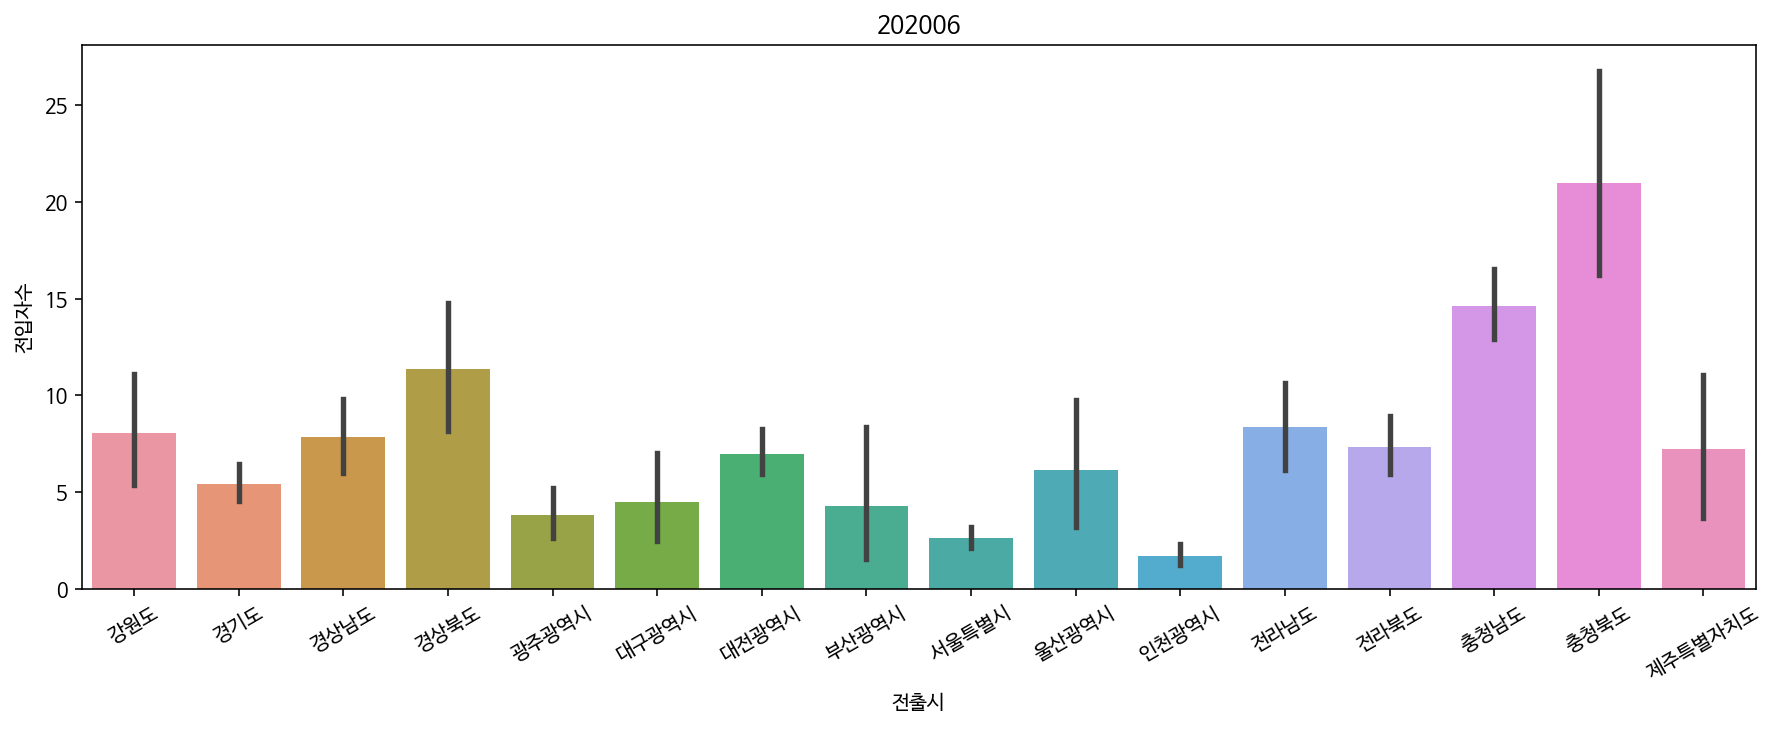

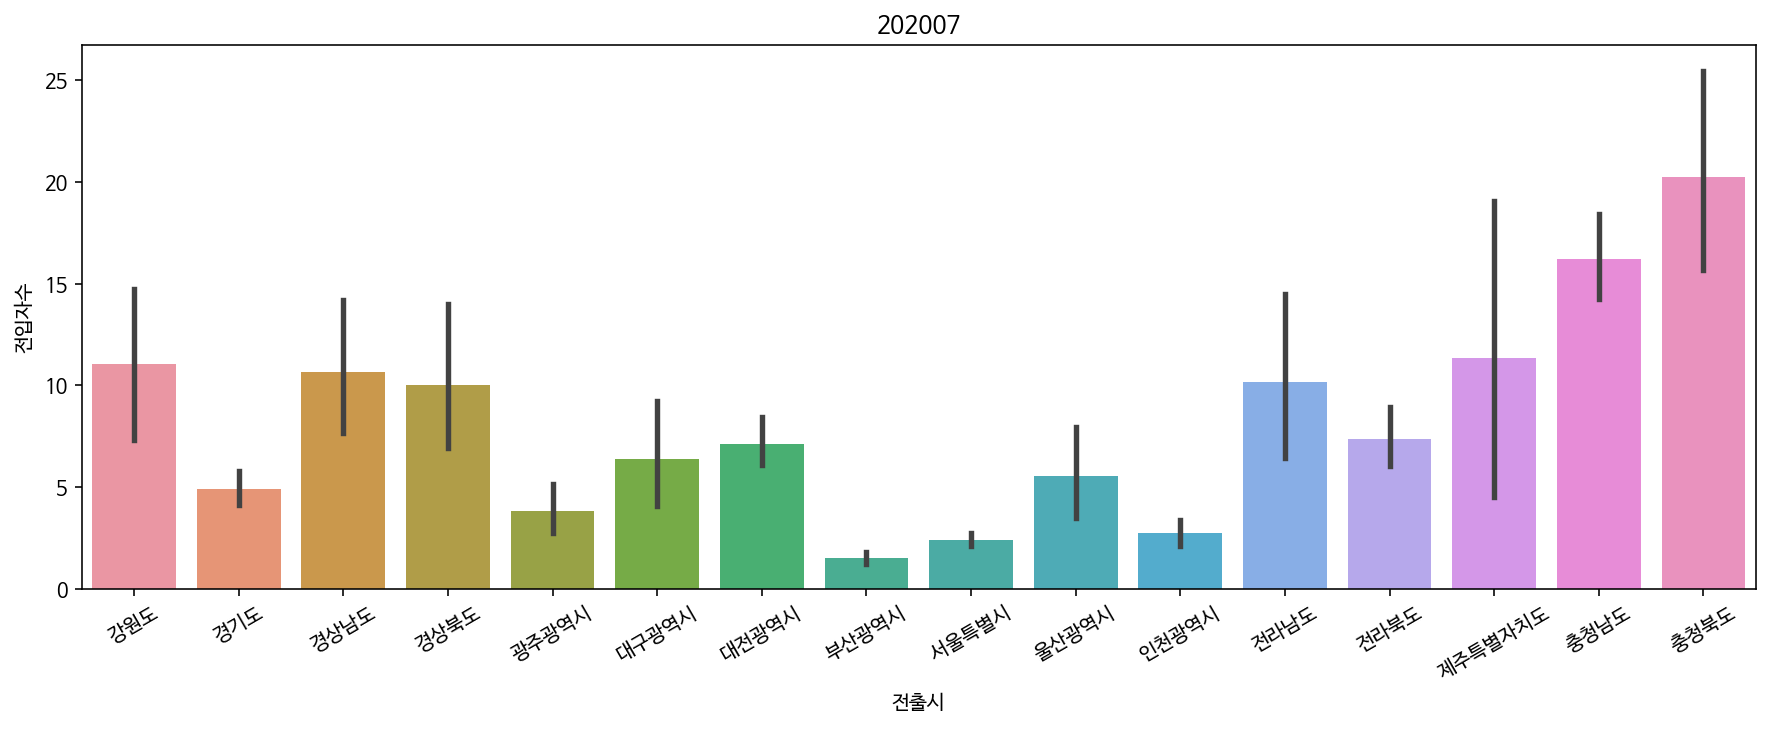

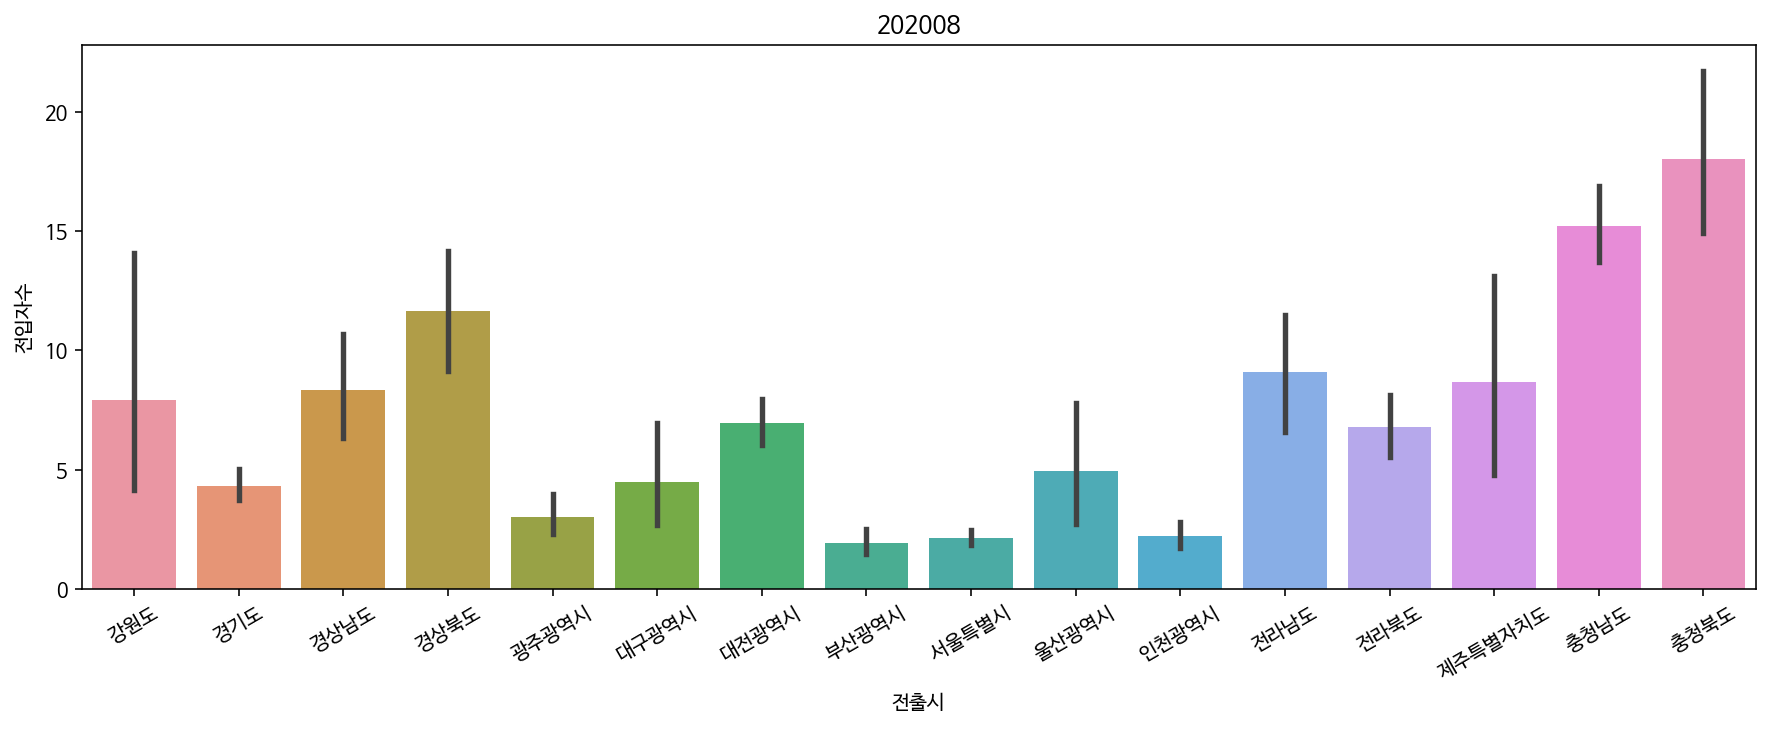

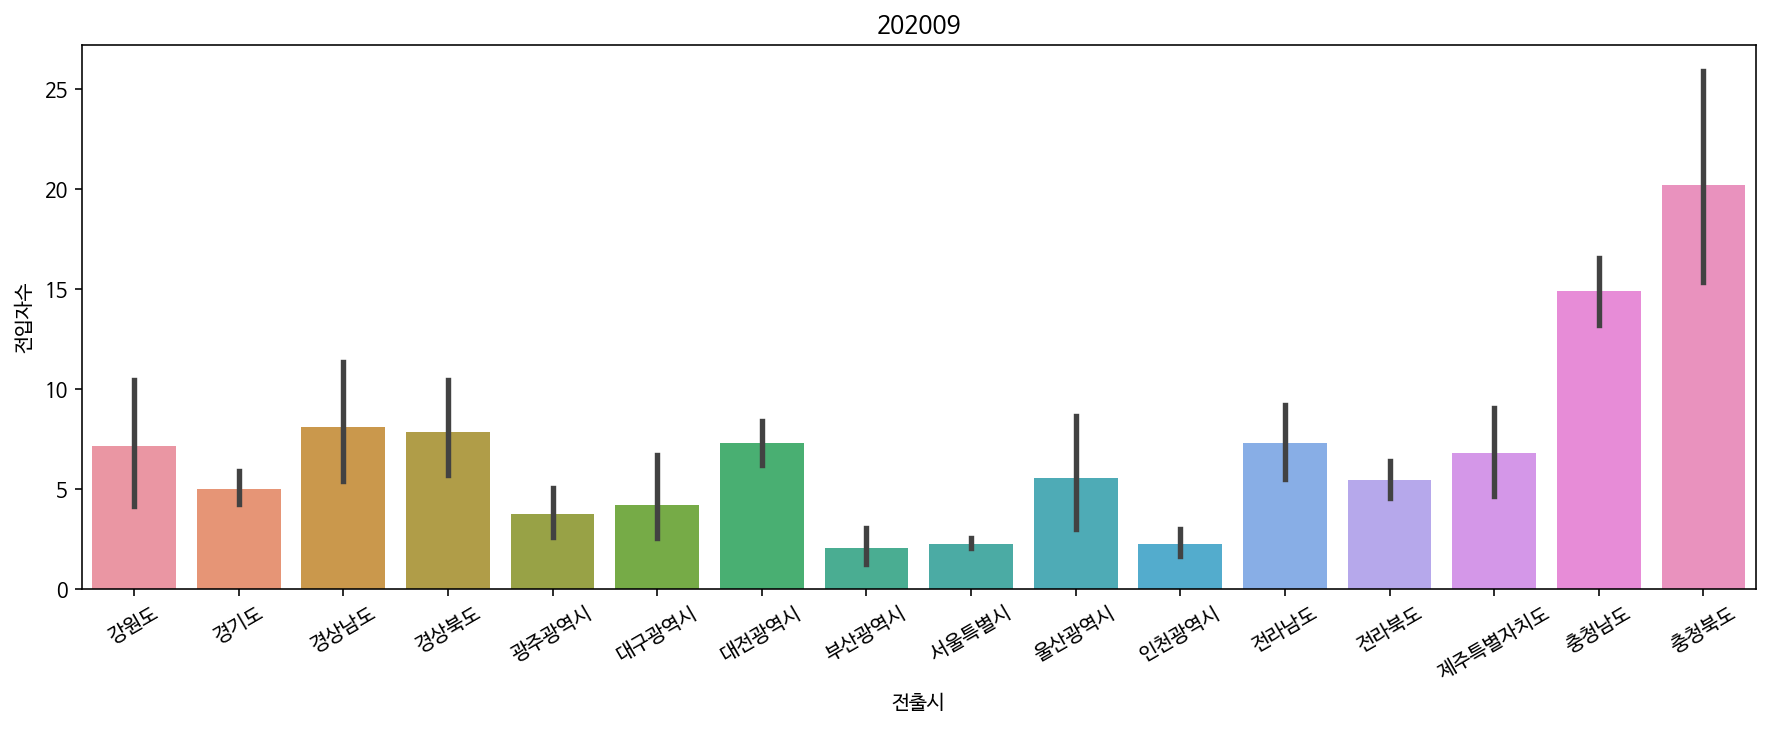

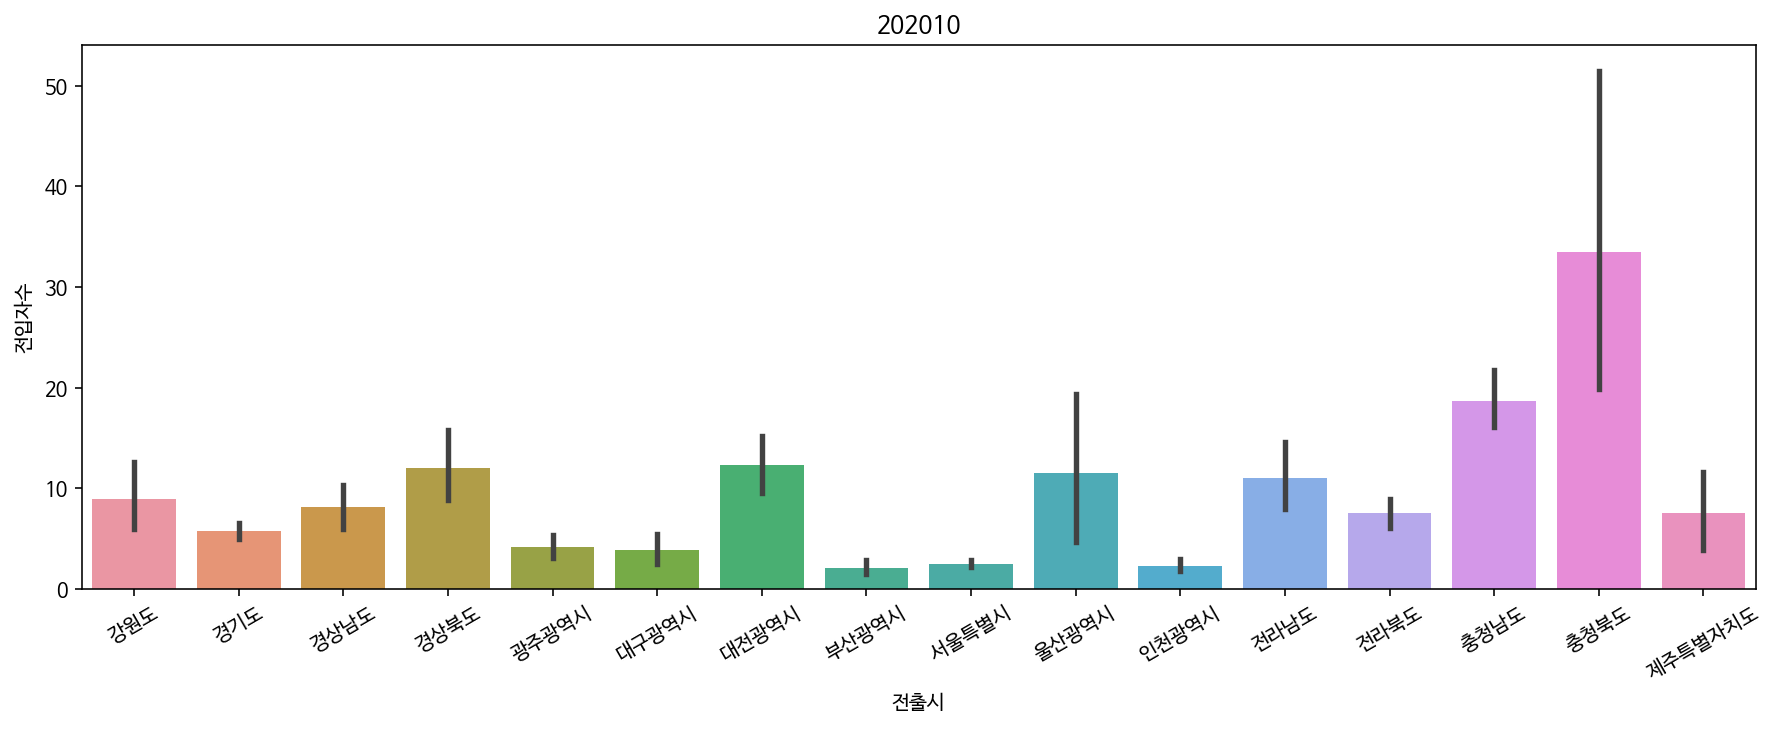

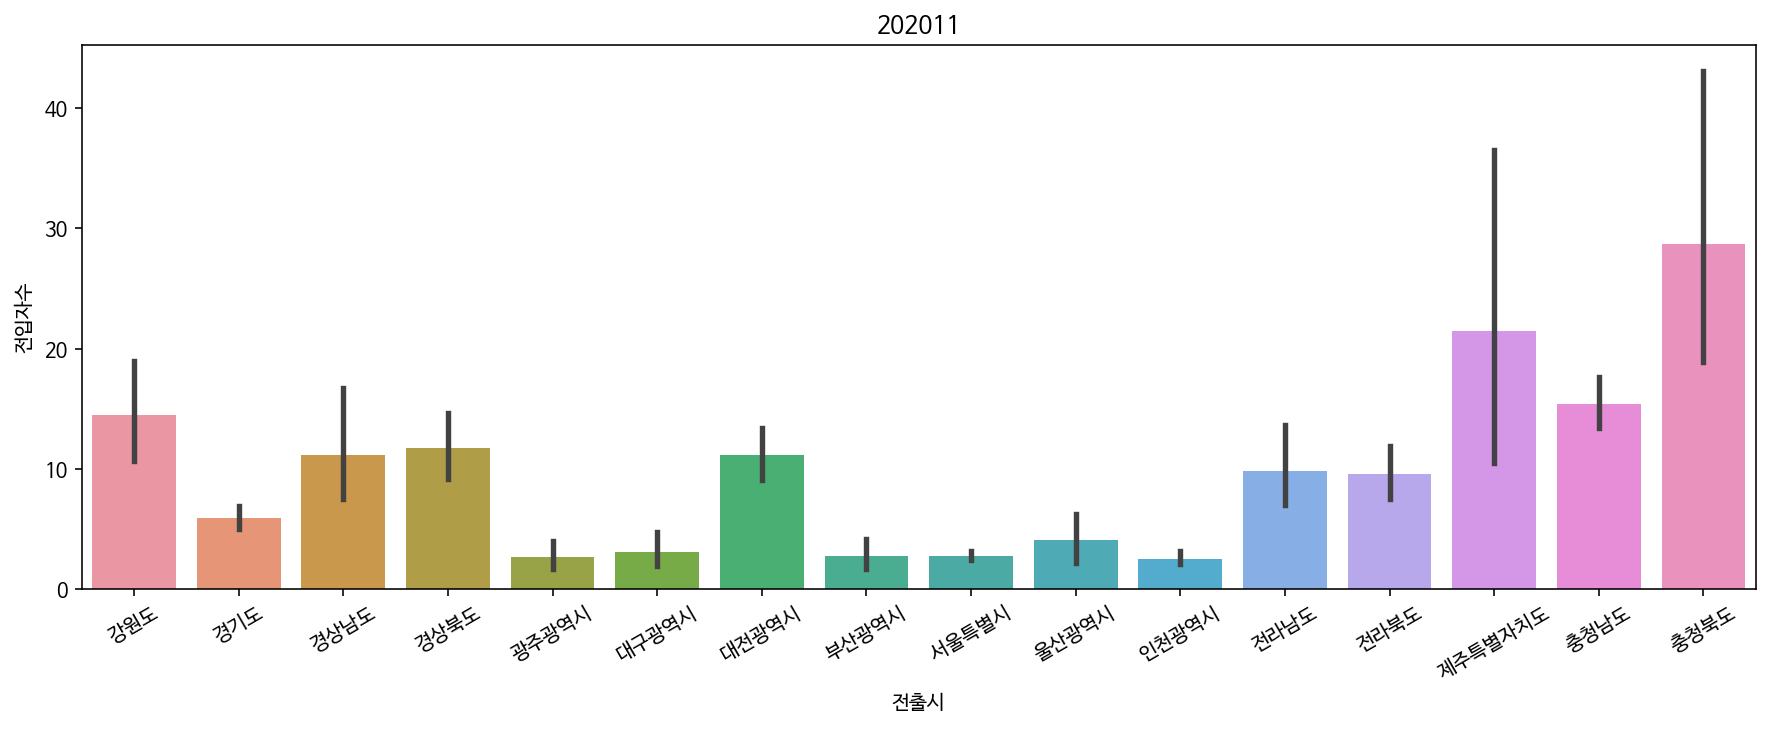

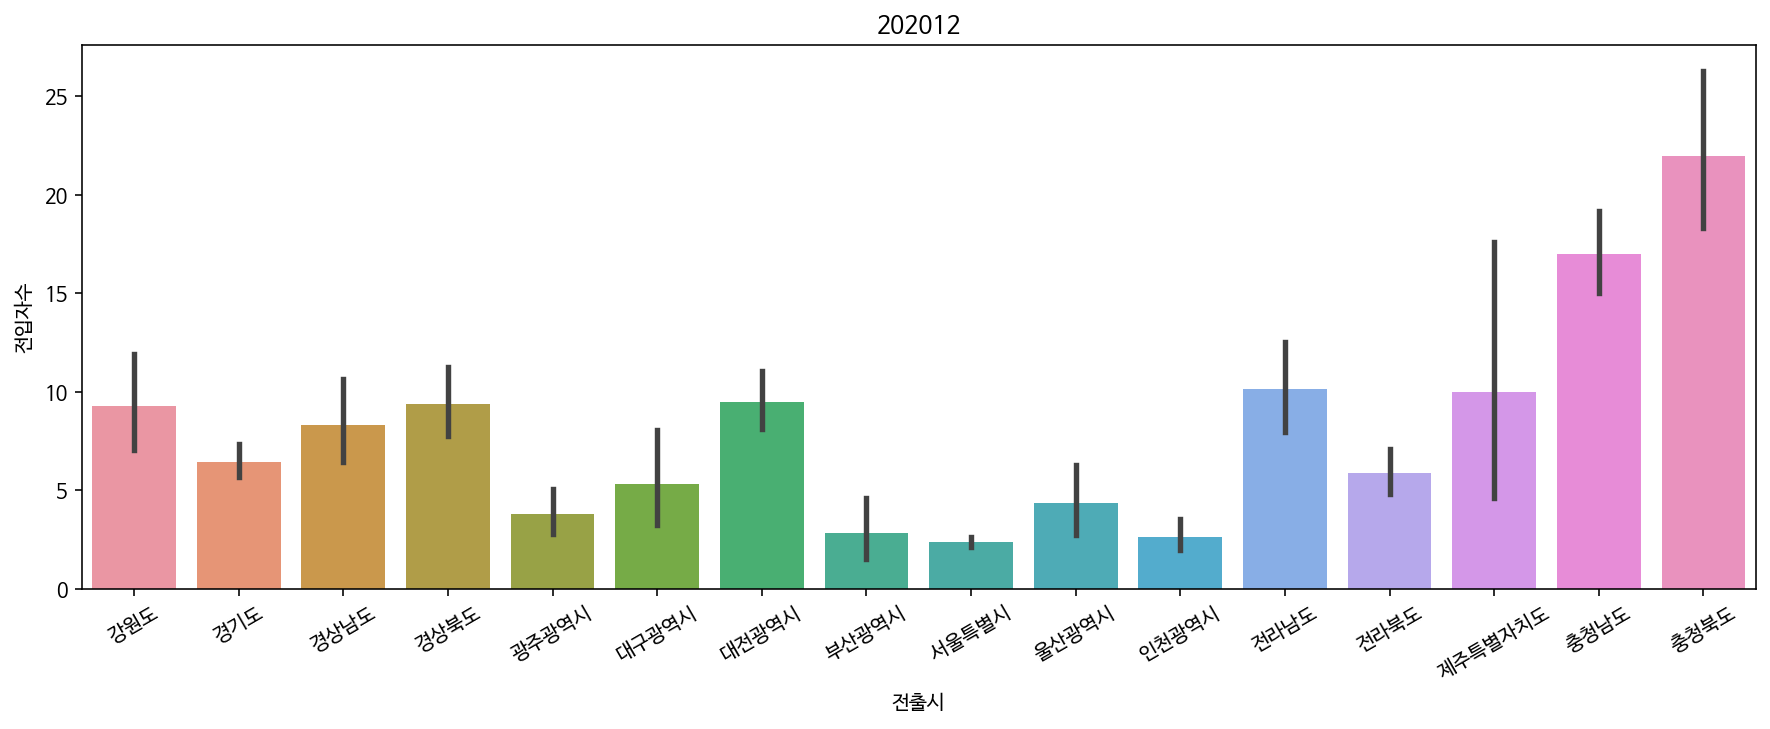

In [ ]:
a = 202001

for i in range(1,13):
    aa = df_in[a] == True
    in_a = df_in[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=in_a['전출시'], y=in_a['전입자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1